# Importing the important Libraries

In [1]:
import tensorflow as tf
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

# Extract data from the dataset

In [2]:
fldr = "./UTKFace/"

In [3]:
import os 
files = os.listdir(fldr)

In [4]:
files

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_0_20170112213001988.jpg.chip.jpg',
 '100_1_0_20170112213303693.jpg.chip.jpg',
 '100_1_0_20170112215032192.jpg.chip.jpg',
 '100_1_0_20170117195420803.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '100_1_2_20170112222336458.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '103_0_2_20170112213001988.jpg.chip.jpg',
 '105_0_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '105_1_1_20170112213303693.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_201701

In [5]:
## Create list of images from dataset

In [6]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace//100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace//100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace//100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace//100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace//100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace//100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace//100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace//100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace//100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace//100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace//100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace//101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace//101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace//103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace//105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace//105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace//105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace//105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace//105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace//10_0_0_20161220222308131.jpg.chip.jpg
.

./UTKFace//110_0_2_20170112223734562.jpg.chip.jpg
./UTKFace//110_1_0_20170120134701015.jpg.chip.jpg
./UTKFace//110_1_1_20170110155201038.jpg.chip.jpg
./UTKFace//110_1_3_20170110155139762.jpg.chip.jpg
./UTKFace//111_1_0_20170120134646399.jpg.chip.jpg
./UTKFace//115_1_0_20170120134725990.jpg.chip.jpg
./UTKFace//115_1_0_20170120134725991.jpg.chip.jpg
./UTKFace//115_1_1_20170112213257263.jpg.chip.jpg
./UTKFace//116_1_0_20170112213001988.jpg.chip.jpg
./UTKFace//116_1_0_20170120134921760.jpg.chip.jpg
./UTKFace//116_1_2_20170112220255503.jpg.chip.jpg
./UTKFace//116_1_3_20170120134744096.jpg.chip.jpg
./UTKFace//11_0_0_20170103200509559.jpg.chip.jpg
./UTKFace//11_0_0_20170103200824775.jpg.chip.jpg
./UTKFace//11_0_0_20170104012556563.jpg.chip.jpg
./UTKFace//11_0_0_20170110220408722.jpg.chip.jpg
./UTKFace//11_0_0_20170110220453002.jpg.chip.jpg
./UTKFace//11_0_0_20170110220500946.jpg.chip.jpg
./UTKFace//11_0_0_20170110220518578.jpg.chip.jpg
./UTKFace//11_0_0_20170110220657089.jpg.chip.jpg
./UTKFac

./UTKFace//12_1_1_20170109204024091.jpg.chip.jpg
./UTKFace//12_1_1_20170109204809866.jpg.chip.jpg
./UTKFace//12_1_1_20170109214204794.jpg.chip.jpg
./UTKFace//12_1_1_20170109214642524.jpg.chip.jpg
./UTKFace//12_1_1_20170112213303693.jpg.chip.jpg
./UTKFace//12_1_1_20170116225216163.jpg.chip.jpg
./UTKFace//12_1_1_20170116233629728.jpg.chip.jpg
./UTKFace//12_1_2_20170103200649030.jpg.chip.jpg
./UTKFace//12_1_2_20170103200922406.jpg.chip.jpg
./UTKFace//12_1_2_20170103201240488.jpg.chip.jpg
./UTKFace//12_1_2_20170104012405785.jpg.chip.jpg
./UTKFace//12_1_2_20170109203838187.jpg.chip.jpg
./UTKFace//12_1_2_20170109214246240.jpg.chip.jpg
./UTKFace//12_1_2_20170116190115810.jpg.chip.jpg
./UTKFace//12_1_2_20170116194059753.jpg.chip.jpg
./UTKFace//12_1_2_20170117145333545.jpg.chip.jpg
./UTKFace//12_1_2_20170117165908225.jpg.chip.jpg
./UTKFace//12_1_2_20170117194013371.jpg.chip.jpg
./UTKFace//12_1_3_20161220222343139.jpg.chip.jpg
./UTKFace//12_1_3_20170104012400657.jpg.chip.jpg
./UTKFace//12_1_3_20

./UTKFace//14_0_2_20170104013318514.jpg.chip.jpg
./UTKFace//14_0_2_20170110232701995.jpg.chip.jpg
./UTKFace//14_0_3_20170104012427337.jpg.chip.jpg
./UTKFace//14_0_3_20170104013434256.jpg.chip.jpg
./UTKFace//14_0_3_20170104225245755.jpg.chip.jpg
./UTKFace//14_0_3_20170104225533201.jpg.chip.jpg
./UTKFace//14_0_3_20170104225721488.jpg.chip.jpg
./UTKFace//14_0_3_20170104225858160.jpg.chip.jpg
./UTKFace//14_0_3_20170104230143521.jpg.chip.jpg
./UTKFace//14_0_3_20170109131758363.jpg.chip.jpg
./UTKFace//14_0_3_20170117181642515.jpg.chip.jpg
./UTKFace//14_0_4_20170103200528094.jpg.chip.jpg
./UTKFace//14_0_4_20170103200608359.jpg.chip.jpg
./UTKFace//14_0_4_20170103200837103.jpg.chip.jpg
./UTKFace//14_0_4_20170103201105568.jpg.chip.jpg
./UTKFace//14_0_4_20170103201644927.jpg.chip.jpg
./UTKFace//14_0_4_20170103205138666.jpg.chip.jpg
./UTKFace//14_0_4_20170113145202254.jpg.chip.jpg
./UTKFace//14_0_4_20170117192737955.jpg.chip.jpg
./UTKFace//14_0_4_20170117193432868.jpg.chip.jpg
./UTKFace//14_0_4_20

./UTKFace//15_0_3_20170104225254497.jpg.chip.jpg
./UTKFace//15_0_3_20170104225525049.jpg.chip.jpg
./UTKFace//15_0_3_20170104225537649.jpg.chip.jpg
./UTKFace//15_0_3_20170104225906465.jpg.chip.jpg
./UTKFace//15_0_3_20170104230418059.jpg.chip.jpg
./UTKFace//15_0_3_20170105183235993.jpg.chip.jpg
./UTKFace//15_0_3_20170110225627090.jpg.chip.jpg
./UTKFace//15_0_4_20170103201002253.jpg.chip.jpg
./UTKFace//15_0_4_20170103201013615.jpg.chip.jpg
./UTKFace//15_0_4_20170103233214059.jpg.chip.jpg
./UTKFace//15_0_4_20170104011201568.jpg.chip.jpg
./UTKFace//15_0_4_20170110232416743.jpg.chip.jpg
./UTKFace//15_1_0_20170103200925950.jpg.chip.jpg
./UTKFace//15_1_0_20170103201148510.jpg.chip.jpg
./UTKFace//15_1_0_20170103201844088.jpg.chip.jpg
./UTKFace//15_1_0_20170104013418578.jpg.chip.jpg
./UTKFace//15_1_0_20170104013549874.jpg.chip.jpg
./UTKFace//15_1_0_20170105000525758.jpg.chip.jpg
./UTKFace//15_1_0_20170109203414090.jpg.chip.jpg
./UTKFace//15_1_0_20170109203912357.jpg.chip.jpg
./UTKFace//15_1_0_20

./UTKFace//16_0_0_20170110232259630.jpg.chip.jpg
./UTKFace//16_0_0_20170110232301837.jpg.chip.jpg
./UTKFace//16_0_0_20170110232302818.jpg.chip.jpg
./UTKFace//16_0_0_20170110232307970.jpg.chip.jpg
./UTKFace//16_0_0_20170110232313053.jpg.chip.jpg
./UTKFace//16_0_0_20170110232315216.jpg.chip.jpg
./UTKFace//16_0_0_20170110232316211.jpg.chip.jpg
./UTKFace//16_0_0_20170110232332618.jpg.chip.jpg
./UTKFace//16_0_0_20170110232429214.jpg.chip.jpg
./UTKFace//16_0_0_20170110232432328.jpg.chip.jpg
./UTKFace//16_0_0_20170110232434079.jpg.chip.jpg
./UTKFace//16_0_0_20170110232444834.jpg.chip.jpg
./UTKFace//16_0_0_20170110232450588.jpg.chip.jpg
./UTKFace//16_0_0_20170110232451479.jpg.chip.jpg
./UTKFace//16_0_0_20170110232528586.jpg.chip.jpg
./UTKFace//16_0_0_20170110232605131.jpg.chip.jpg
./UTKFace//16_0_0_20170110232611516.jpg.chip.jpg
./UTKFace//16_0_0_20170110232613101.jpg.chip.jpg
./UTKFace//16_0_0_20170110232647979.jpg.chip.jpg
./UTKFace//16_0_0_20170110232714508.jpg.chip.jpg
./UTKFace//16_0_0_20

./UTKFace//17_0_0_20170104011408904.jpg.chip.jpg
./UTKFace//17_0_0_20170104011953696.jpg.chip.jpg
./UTKFace//17_0_0_20170104230556561.jpg.chip.jpg
./UTKFace//17_0_0_20170105183357879.jpg.chip.jpg
./UTKFace//17_0_0_20170105183607439.jpg.chip.jpg
./UTKFace//17_0_0_20170105183615673.jpg.chip.jpg
./UTKFace//17_0_0_20170110231210547.jpg.chip.jpg
./UTKFace//17_0_0_20170110231233724.jpg.chip.jpg
./UTKFace//17_0_0_20170110231535087.jpg.chip.jpg
./UTKFace//17_0_0_20170110231605793.jpg.chip.jpg
./UTKFace//17_0_0_20170110231615651.jpg.chip.jpg
./UTKFace//17_0_0_20170110231640217.jpg.chip.jpg
./UTKFace//17_0_0_20170110231711354.jpg.chip.jpg
./UTKFace//17_0_0_20170110231719325.jpg.chip.jpg
./UTKFace//17_0_0_20170110231748137.jpg.chip.jpg
./UTKFace//17_0_0_20170110231752726.jpg.chip.jpg
./UTKFace//17_0_0_20170110231820806.jpg.chip.jpg
./UTKFace//17_0_0_20170110231830374.jpg.chip.jpg
./UTKFace//17_0_0_20170110232017297.jpg.chip.jpg
./UTKFace//17_0_0_20170110232022621.jpg.chip.jpg
./UTKFace//17_0_0_20

./UTKFace//18_0_0_20170117140126568.jpg.chip.jpg
./UTKFace//18_0_0_20170117140129888.jpg.chip.jpg
./UTKFace//18_0_0_20170117140132816.jpg.chip.jpg
./UTKFace//18_0_0_20170117140723690.jpg.chip.jpg
./UTKFace//18_0_0_20170117140759528.jpg.chip.jpg
./UTKFace//18_0_0_20170117175618980.jpg.chip.jpg
./UTKFace//18_0_0_20170117175643037.jpg.chip.jpg
./UTKFace//18_0_0_20170117193153029.jpg.chip.jpg
./UTKFace//18_0_1_20170109214734802.jpg.chip.jpg
./UTKFace//18_0_1_20170113132623905.jpg.chip.jpg
./UTKFace//18_0_1_20170113132626633.jpg.chip.jpg
./UTKFace//18_0_1_20170113132627873.jpg.chip.jpg
./UTKFace//18_0_1_20170113132629362.jpg.chip.jpg
./UTKFace//18_0_1_20170113135429329.jpg.chip.jpg
./UTKFace//18_0_1_20170113151656761.jpg.chip.jpg
./UTKFace//18_0_1_20170113175555906.jpg.chip.jpg
./UTKFace//18_0_1_20170113175821404.jpg.chip.jpg
./UTKFace//18_0_1_20170113184819320.jpg.chip.jpg
./UTKFace//18_0_1_20170114025501676.jpg.chip.jpg
./UTKFace//18_0_1_20170114030410225.jpg.chip.jpg
./UTKFace//18_0_1_20

./UTKFace//18_1_1_20170109212540841.jpg.chip.jpg
./UTKFace//18_1_1_20170109212551451.jpg.chip.jpg
./UTKFace//18_1_1_20170109214221868.jpg.chip.jpg
./UTKFace//18_1_1_20170109214355606.jpg.chip.jpg
./UTKFace//18_1_1_20170112231616704.jpg.chip.jpg
./UTKFace//18_1_1_20170113002913732.jpg.chip.jpg
./UTKFace//18_1_1_20170113005132350.jpg.chip.jpg
./UTKFace//18_1_1_20170113005321501.jpg.chip.jpg
./UTKFace//18_1_1_20170114030232014.jpg.chip.jpg
./UTKFace//18_1_1_20170114030253404.jpg.chip.jpg
./UTKFace//18_1_1_20170114030258171.jpg.chip.jpg
./UTKFace//18_1_1_20170114030334837.jpg.chip.jpg
./UTKFace//18_1_1_20170114030339628.jpg.chip.jpg
./UTKFace//18_1_1_20170114030424059.jpg.chip.jpg
./UTKFace//18_1_1_20170116000609057.jpg.chip.jpg
./UTKFace//18_1_1_20170116164854853.jpg.chip.jpg
./UTKFace//18_1_1_20170116211857195.jpg.chip.jpg
./UTKFace//18_1_1_20170117140105352.jpg.chip.jpg
./UTKFace//18_1_1_20170117140201823.jpg.chip.jpg
./UTKFace//18_1_1_20170117140433352.jpg.chip.jpg
./UTKFace//18_1_2_20

./UTKFace//1_0_0_20161219160713534.jpg.chip.jpg
./UTKFace//1_0_0_20161219161028662.jpg.chip.jpg
./UTKFace//1_0_0_20161219162630727.jpg.chip.jpg
./UTKFace//1_0_0_20161219163425847.jpg.chip.jpg
./UTKFace//1_0_0_20161219190045155.jpg.chip.jpg
./UTKFace//1_0_0_20161219190621290.jpg.chip.jpg
./UTKFace//1_0_0_20161219190824794.jpg.chip.jpg
./UTKFace//1_0_0_20161219191012803.jpg.chip.jpg
./UTKFace//1_0_0_20161219191041403.jpg.chip.jpg
./UTKFace//1_0_0_20161219192208688.jpg.chip.jpg
./UTKFace//1_0_0_20161219192524675.jpg.chip.jpg
./UTKFace//1_0_0_20161219192713491.jpg.chip.jpg
./UTKFace//1_0_0_20161219193326339.jpg.chip.jpg
./UTKFace//1_0_0_20161219194004596.jpg.chip.jpg
./UTKFace//1_0_0_20161219194756275.jpg.chip.jpg
./UTKFace//1_0_0_20161219195753899.jpg.chip.jpg
./UTKFace//1_0_0_20161219200139603.jpg.chip.jpg
./UTKFace//1_0_0_20161219200250923.jpg.chip.jpg
./UTKFace//1_0_0_20161219200338012.jpg.chip.jpg
./UTKFace//1_0_0_20161219202455708.jpg.chip.jpg
./UTKFace//1_0_0_20161219203009924.jpg.c

./UTKFace//1_0_2_20161219142006881.jpg.chip.jpg
./UTKFace//1_0_2_20161219142032650.jpg.chip.jpg
./UTKFace//1_0_2_20161219142039985.jpg.chip.jpg
./UTKFace//1_0_2_20161219142124569.jpg.chip.jpg
./UTKFace//1_0_2_20161219142135209.jpg.chip.jpg
./UTKFace//1_0_2_20161219142306002.jpg.chip.jpg
./UTKFace//1_0_2_20161219142409225.jpg.chip.jpg
./UTKFace//1_0_2_20161219142452152.jpg.chip.jpg
./UTKFace//1_0_2_20161219151026723.jpg.chip.jpg
./UTKFace//1_0_2_20161219151035204.jpg.chip.jpg
./UTKFace//1_0_2_20161219151117789.jpg.chip.jpg
./UTKFace//1_0_2_20161219151123435.jpg.chip.jpg
./UTKFace//1_0_2_20161219151505283.jpg.chip.jpg
./UTKFace//1_0_2_20161219152901372.jpg.chip.jpg
./UTKFace//1_0_2_20161219153055452.jpg.chip.jpg
./UTKFace//1_0_2_20161219153127196.jpg.chip.jpg
./UTKFace//1_0_2_20161219153151084.jpg.chip.jpg
./UTKFace//1_0_2_20161219153209772.jpg.chip.jpg
./UTKFace//1_0_2_20161219153300420.jpg.chip.jpg
./UTKFace//1_0_2_20161219153318900.jpg.chip.jpg
./UTKFace//1_0_2_20161219153457308.jpg.c

./UTKFace//1_0_2_20161219204845029.jpg.chip.jpg
./UTKFace//1_0_2_20161219204848341.jpg.chip.jpg
./UTKFace//1_0_2_20161219204858548.jpg.chip.jpg
./UTKFace//1_0_2_20161219204951309.jpg.chip.jpg
./UTKFace//1_0_2_20161219204958037.jpg.chip.jpg
./UTKFace//1_0_2_20161219205016902.jpg.chip.jpg
./UTKFace//1_0_2_20161219205107772.jpg.chip.jpg
./UTKFace//1_0_2_20161219205111061.jpg.chip.jpg
./UTKFace//1_0_2_20161219205225773.jpg.chip.jpg
./UTKFace//1_0_2_20161219205313061.jpg.chip.jpg
./UTKFace//1_0_2_20161219205318388.jpg.chip.jpg
./UTKFace//1_0_2_20161219205548949.jpg.chip.jpg
./UTKFace//1_0_2_20161219205702141.jpg.chip.jpg
./UTKFace//1_0_2_20161219205717701.jpg.chip.jpg
./UTKFace//1_0_2_20161219205758717.jpg.chip.jpg
./UTKFace//1_0_2_20161219205827749.jpg.chip.jpg
./UTKFace//1_0_2_20161219205836181.jpg.chip.jpg
./UTKFace//1_0_2_20161219210310309.jpg.chip.jpg
./UTKFace//1_0_2_20161219210754437.jpg.chip.jpg
./UTKFace//1_0_2_20161219211107805.jpg.chip.jpg
./UTKFace//1_0_2_20161219211231133.jpg.c

./UTKFace//1_0_3_20161220215943341.jpg.chip.jpg
./UTKFace//1_0_3_20161220215945524.jpg.chip.jpg
./UTKFace//1_0_3_20161220220036937.jpg.chip.jpg
./UTKFace//1_0_3_20161220220038618.jpg.chip.jpg
./UTKFace//1_0_3_20161220220040611.jpg.chip.jpg
./UTKFace//1_0_3_20161220220110553.jpg.chip.jpg
./UTKFace//1_0_3_20161220220116873.jpg.chip.jpg
./UTKFace//1_0_3_20161220220154425.jpg.chip.jpg
./UTKFace//1_0_3_20161220220317465.jpg.chip.jpg
./UTKFace//1_0_3_20161220220355890.jpg.chip.jpg
./UTKFace//1_0_3_20161220220358441.jpg.chip.jpg
./UTKFace//1_0_3_20161220220411577.jpg.chip.jpg
./UTKFace//1_0_3_20161220220418690.jpg.chip.jpg
./UTKFace//1_0_3_20161220220508802.jpg.chip.jpg
./UTKFace//1_0_3_20161220220529033.jpg.chip.jpg
./UTKFace//1_0_3_20161220220544050.jpg.chip.jpg
./UTKFace//1_0_3_20161220220606705.jpg.chip.jpg
./UTKFace//1_0_3_20161220220910514.jpg.chip.jpg
./UTKFace//1_0_3_20161220221612859.jpg.chip.jpg
./UTKFace//1_0_3_20161220221616882.jpg.chip.jpg
./UTKFace//1_0_3_20161220221723490.jpg.c

./UTKFace//1_1_0_20170109191817067.jpg.chip.jpg
./UTKFace//1_1_0_20170109191822349.jpg.chip.jpg
./UTKFace//1_1_0_20170109191835969.jpg.chip.jpg
./UTKFace//1_1_0_20170109192015845.jpg.chip.jpg
./UTKFace//1_1_0_20170109192051442.jpg.chip.jpg
./UTKFace//1_1_0_20170109192159501.jpg.chip.jpg
./UTKFace//1_1_0_20170109192244272.jpg.chip.jpg
./UTKFace//1_1_0_20170109192245647.jpg.chip.jpg
./UTKFace//1_1_0_20170109192402736.jpg.chip.jpg
./UTKFace//1_1_0_20170109192442932.jpg.chip.jpg
./UTKFace//1_1_0_20170109192451846.jpg.chip.jpg
./UTKFace//1_1_0_20170109192728714.jpg.chip.jpg
./UTKFace//1_1_0_20170109192729677.jpg.chip.jpg
./UTKFace//1_1_0_20170109192737181.jpg.chip.jpg
./UTKFace//1_1_0_20170109192752097.jpg.chip.jpg
./UTKFace//1_1_0_20170109192755957.jpg.chip.jpg
./UTKFace//1_1_0_20170109193014933.jpg.chip.jpg
./UTKFace//1_1_0_20170109193015973.jpg.chip.jpg
./UTKFace//1_1_0_20170109193017247.jpg.chip.jpg
./UTKFace//1_1_0_20170109193018259.jpg.chip.jpg
./UTKFace//1_1_0_20170109193022683.jpg.c

./UTKFace//1_1_2_20161219211512447.jpg.chip.jpg
./UTKFace//1_1_2_20161219211701334.jpg.chip.jpg
./UTKFace//1_1_2_20161219211944925.jpg.chip.jpg
./UTKFace//1_1_2_20161219211948405.jpg.chip.jpg
./UTKFace//1_1_2_20161219212221341.jpg.chip.jpg
./UTKFace//1_1_2_20161219212313989.jpg.chip.jpg
./UTKFace//1_1_2_20161219212416550.jpg.chip.jpg
./UTKFace//1_1_2_20161219212514021.jpg.chip.jpg
./UTKFace//1_1_2_20161219212611880.jpg.chip.jpg
./UTKFace//1_1_2_20161219212720270.jpg.chip.jpg
./UTKFace//1_1_2_20161219220348151.jpg.chip.jpg
./UTKFace//1_1_2_20161219220411361.jpg.chip.jpg
./UTKFace//1_1_2_20161219220519457.jpg.chip.jpg
./UTKFace//1_1_2_20161219220611473.jpg.chip.jpg
./UTKFace//1_1_2_20161219220631367.jpg.chip.jpg
./UTKFace//1_1_2_20161219221154447.jpg.chip.jpg
./UTKFace//1_1_2_20161219221229279.jpg.chip.jpg
./UTKFace//1_1_2_20161219221237927.jpg.chip.jpg
./UTKFace//1_1_2_20161219221241583.jpg.chip.jpg
./UTKFace//1_1_2_20161219221243095.jpg.chip.jpg
./UTKFace//1_1_2_20161219221253335.jpg.c

./UTKFace//1_1_4_20161221202012433.jpg.chip.jpg
./UTKFace//1_1_4_20161221202018329.jpg.chip.jpg
./UTKFace//1_1_4_20161221202026104.jpg.chip.jpg
./UTKFace//1_1_4_20161221202046857.jpg.chip.jpg
./UTKFace//1_1_4_20161221202050009.jpg.chip.jpg
./UTKFace//1_1_4_20161221202053505.jpg.chip.jpg
./UTKFace//1_1_4_20161221202124857.jpg.chip.jpg
./UTKFace//1_1_4_20161221202135073.jpg.chip.jpg
./UTKFace//1_1_4_20161221202153553.jpg.chip.jpg
./UTKFace//1_1_4_20161221202159241.jpg.chip.jpg
./UTKFace//1_1_4_20161221202254377.jpg.chip.jpg
./UTKFace//1_1_4_20161221202528425.jpg.chip.jpg
./UTKFace//1_1_4_20161221202912889.jpg.chip.jpg
./UTKFace//1_1_4_20161223225921227.jpg.chip.jpg
./UTKFace//1_1_4_20161223231311515.jpg.chip.jpg
./UTKFace//1_1_4_20170103202738552.jpg.chip.jpg
./UTKFace//1_1_4_20170103204825447.jpg.chip.jpg
./UTKFace//1_1_4_20170103204831032.jpg.chip.jpg
./UTKFace//1_1_4_20170103205129266.jpg.chip.jpg
./UTKFace//1_1_4_20170103205134402.jpg.chip.jpg
./UTKFace//1_1_4_20170103210113314.jpg.c

./UTKFace//20_1_0_20170117141338600.jpg.chip.jpg
./UTKFace//20_1_0_20170117141358391.jpg.chip.jpg
./UTKFace//20_1_0_20170117141400913.jpg.chip.jpg
./UTKFace//20_1_0_20170117150259426.jpg.chip.jpg
./UTKFace//20_1_0_20170117171624989.jpg.chip.jpg
./UTKFace//20_1_0_20170117183640921.jpg.chip.jpg
./UTKFace//20_1_0_20170117192327053.jpg.chip.jpg
./UTKFace//20_1_0_20170117192922563.jpg.chip.jpg
./UTKFace//20_1_0_20170117192932485.jpg.chip.jpg
./UTKFace//20_1_0_20170117193547491.jpg.chip.jpg
./UTKFace//20_1_0_20170117193612788.jpg.chip.jpg
./UTKFace//20_1_0_20170117193616027.jpg.chip.jpg
./UTKFace//20_1_0_20170119153358328.jpg.chip.jpg
./UTKFace//20_1_0_20170119153405080.jpg.chip.jpg
./UTKFace//20_1_0_20170119153410801.jpg.chip.jpg
./UTKFace//20_1_0_20170119153717575.jpg.chip.jpg
./UTKFace//20_1_0_20170119153738075.jpg.chip.jpg
./UTKFace//20_1_0_20170120140127200.jpg.chip.jpg
./UTKFace//20_1_1_20170105002448621.jpg.chip.jpg
./UTKFace//20_1_1_20170112191224819.jpg.chip.jpg
./UTKFace//20_1_1_20

./UTKFace//21_0_1_20170113145729669.jpg.chip.jpg
./UTKFace//21_0_1_20170113180920187.jpg.chip.jpg
./UTKFace//21_0_1_20170113195431788.jpg.chip.jpg
./UTKFace//21_0_1_20170114030009371.jpg.chip.jpg
./UTKFace//21_0_1_20170114031536421.jpg.chip.jpg
./UTKFace//21_0_1_20170114032016183.jpg.chip.jpg
./UTKFace//21_0_1_20170114032018810.jpg.chip.jpg
./UTKFace//21_0_1_20170114032058290.jpg.chip.jpg
./UTKFace//21_0_1_20170114032109958.jpg.chip.jpg
./UTKFace//21_0_1_20170115231442487.jpg.chip.jpg
./UTKFace//21_0_1_20170116010312874.jpg.chip.jpg
./UTKFace//21_0_1_20170116030053264.jpg.chip.jpg
./UTKFace//21_0_1_20170116204921756.jpg.chip.jpg
./UTKFace//21_0_1_20170116214205175.jpg.chip.jpg
./UTKFace//21_0_1_20170116214828919.jpg.chip.jpg
./UTKFace//21_0_1_20170116215535068.jpg.chip.jpg
./UTKFace//21_0_1_20170116215541940.jpg.chip.jpg
./UTKFace//21_0_1_20170116215700416.jpg.chip.jpg
./UTKFace//21_0_1_20170117135810975.jpg.chip.jpg
./UTKFace//21_0_1_20170117142001073.jpg.chip.jpg
./UTKFace//21_0_1_20

./UTKFace//21_1_2_20170103201741359.jpg.chip.jpg
./UTKFace//21_1_2_20170103201800511.jpg.chip.jpg
./UTKFace//21_1_2_20170104015820531.jpg.chip.jpg
./UTKFace//21_1_2_20170104015832388.jpg.chip.jpg
./UTKFace//21_1_2_20170104020048292.jpg.chip.jpg
./UTKFace//21_1_2_20170104020235605.jpg.chip.jpg
./UTKFace//21_1_2_20170104021056028.jpg.chip.jpg
./UTKFace//21_1_2_20170104021952837.jpg.chip.jpg
./UTKFace//21_1_2_20170105000725292.jpg.chip.jpg
./UTKFace//21_1_2_20170105002530429.jpg.chip.jpg
./UTKFace//21_1_2_20170105183505385.jpg.chip.jpg
./UTKFace//21_1_2_20170109132112364.jpg.chip.jpg
./UTKFace//21_1_2_20170109213056053.jpg.chip.jpg
./UTKFace//21_1_2_20170116163803744.jpg.chip.jpg
./UTKFace//21_1_2_20170116163813584.jpg.chip.jpg
./UTKFace//21_1_2_20170116164805815.jpg.chip.jpg
./UTKFace//21_1_2_20170116165009080.jpg.chip.jpg
./UTKFace//21_1_2_20170116170625776.jpg.chip.jpg
./UTKFace//21_1_2_20170116170710327.jpg.chip.jpg
./UTKFace//21_1_2_20170116170727930.jpg.chip.jpg
./UTKFace//21_1_2_20

./UTKFace//22_0_1_20170113150441654.jpg.chip.jpg
./UTKFace//22_0_1_20170113150443999.jpg.chip.jpg
./UTKFace//22_0_1_20170113155002433.jpg.chip.jpg
./UTKFace//22_0_1_20170113193211629.jpg.chip.jpg
./UTKFace//22_0_1_20170113195509981.jpg.chip.jpg
./UTKFace//22_0_1_20170113195511076.jpg.chip.jpg
./UTKFace//22_0_1_20170114030000815.jpg.chip.jpg
./UTKFace//22_0_1_20170114032119562.jpg.chip.jpg
./UTKFace//22_0_1_20170114032251671.jpg.chip.jpg
./UTKFace//22_0_1_20170114033114683.jpg.chip.jpg
./UTKFace//22_0_1_20170114033132392.jpg.chip.jpg
./UTKFace//22_0_1_20170114033134437.jpg.chip.jpg
./UTKFace//22_0_1_20170114033210195.jpg.chip.jpg
./UTKFace//22_0_1_20170114033213586.jpg.chip.jpg
./UTKFace//22_0_1_20170116144518064.jpg.chip.jpg
./UTKFace//22_0_1_20170116214330918.jpg.chip.jpg
./UTKFace//22_0_1_20170117020724763.jpg.chip.jpg
./UTKFace//22_0_2_20170104015701971.jpg.chip.jpg
./UTKFace//22_0_2_20170104020041910.jpg.chip.jpg
./UTKFace//22_0_2_20170104021111388.jpg.chip.jpg
./UTKFace//22_0_2_20

./UTKFace//22_1_2_20170104021310052.jpg.chip.jpg
./UTKFace//22_1_2_20170104021344006.jpg.chip.jpg
./UTKFace//22_1_2_20170104021444541.jpg.chip.jpg
./UTKFace//22_1_2_20170104021940541.jpg.chip.jpg
./UTKFace//22_1_2_20170104022012028.jpg.chip.jpg
./UTKFace//22_1_2_20170104022959942.jpg.chip.jpg
./UTKFace//22_1_2_20170104231245440.jpg.chip.jpg
./UTKFace//22_1_2_20170105183412088.jpg.chip.jpg
./UTKFace//22_1_2_20170108224643996.jpg.chip.jpg
./UTKFace//22_1_2_20170114033415747.jpg.chip.jpg
./UTKFace//22_1_2_20170116161424702.jpg.chip.jpg
./UTKFace//22_1_2_20170116162023656.jpg.chip.jpg
./UTKFace//22_1_2_20170116162441662.jpg.chip.jpg
./UTKFace//22_1_2_20170116162522559.jpg.chip.jpg
./UTKFace//22_1_2_20170116162853367.jpg.chip.jpg
./UTKFace//22_1_2_20170116162903793.jpg.chip.jpg
./UTKFace//22_1_2_20170116162938834.jpg.chip.jpg
./UTKFace//22_1_2_20170116162944219.jpg.chip.jpg
./UTKFace//22_1_2_20170116164534125.jpg.chip.jpg
./UTKFace//22_1_2_20170116165023471.jpg.chip.jpg
./UTKFace//22_1_2_20

./UTKFace//23_0_0_20170117144622811.jpg.chip.jpg
./UTKFace//23_0_0_20170117144642723.jpg.chip.jpg
./UTKFace//23_0_0_20170117144706803.jpg.chip.jpg
./UTKFace//23_0_0_20170117194023317.jpg.chip.jpg
./UTKFace//23_0_0_20170117194039724.jpg.chip.jpg
./UTKFace//23_0_0_20170117194041797.jpg.chip.jpg
./UTKFace//23_0_0_20170117194151965.jpg.chip.jpg
./UTKFace//23_0_0_20170119145312190.jpg.chip.jpg
./UTKFace//23_0_0_20170119163828336.jpg.chip.jpg
./UTKFace//23_0_1_20170113133721489.jpg.chip.jpg
./UTKFace//23_0_1_20170113133832321.jpg.chip.jpg
./UTKFace//23_0_1_20170113133833362.jpg.chip.jpg
./UTKFace//23_0_1_20170113133840296.jpg.chip.jpg
./UTKFace//23_0_1_20170113133855489.jpg.chip.jpg
./UTKFace//23_0_1_20170113133908465.jpg.chip.jpg
./UTKFace//23_0_1_20170113150723591.jpg.chip.jpg
./UTKFace//23_0_1_20170113150854335.jpg.chip.jpg
./UTKFace//23_0_1_20170113150913751.jpg.chip.jpg
./UTKFace//23_0_1_20170113195548821.jpg.chip.jpg
./UTKFace//23_0_1_20170113195604509.jpg.chip.jpg
./UTKFace//23_0_1_20

./UTKFace//23_1_0_20170117145132068.jpg.chip.jpg
./UTKFace//23_1_0_20170117171803722.jpg.chip.jpg
./UTKFace//23_1_0_20170117175925529.jpg.chip.jpg
./UTKFace//23_1_0_20170117194120347.jpg.chip.jpg
./UTKFace//23_1_0_20170117194248629.jpg.chip.jpg
./UTKFace//23_1_1_20170102233446754.jpg.chip.jpg
./UTKFace//23_1_1_20170103212737732.jpg.chip.jpg
./UTKFace//23_1_1_20170103223013127.jpg.chip.jpg
./UTKFace//23_1_1_20170112192422750.jpg.chip.jpg
./UTKFace//23_1_1_20170112203929794.jpg.chip.jpg
./UTKFace//23_1_1_20170112203943260.jpg.chip.jpg
./UTKFace//23_1_1_20170112204431018.jpg.chip.jpg
./UTKFace//23_1_1_20170112204436531.jpg.chip.jpg
./UTKFace//23_1_1_20170112234048553.jpg.chip.jpg
./UTKFace//23_1_1_20170112234052856.jpg.chip.jpg
./UTKFace//23_1_1_20170112234139392.jpg.chip.jpg
./UTKFace//23_1_1_20170112234254088.jpg.chip.jpg
./UTKFace//23_1_1_20170113010455151.jpg.chip.jpg
./UTKFace//23_1_1_20170113010457776.jpg.chip.jpg
./UTKFace//23_1_1_20170113010507311.jpg.chip.jpg
./UTKFace//23_1_1_20

./UTKFace//23_1_3_20170119164555733.jpg.chip.jpg
./UTKFace//23_1_3_20170119164557957.jpg.chip.jpg
./UTKFace//23_1_3_20170119164559398.jpg.chip.jpg
./UTKFace//23_1_3_20170119164602781.jpg.chip.jpg
./UTKFace//23_1_3_20170119164605108.jpg.chip.jpg
./UTKFace//23_1_3_20170119164606005.jpg.chip.jpg
./UTKFace//23_1_4_20161223214744290.jpg.chip.jpg
./UTKFace//23_1_4_20161223214747066.jpg.chip.jpg
./UTKFace//23_1_4_20161223230008236.jpg.chip.jpg
./UTKFace//23_1_4_20161223230013995.jpg.chip.jpg
./UTKFace//23_1_4_20170103212744381.jpg.chip.jpg
./UTKFace//23_1_4_20170103223102032.jpg.chip.jpg
./UTKFace//23_1_4_20170103223410718.jpg.chip.jpg
./UTKFace//23_1_4_20170103223443239.jpg.chip.jpg
./UTKFace//23_1_4_20170103223551622.jpg.chip.jpg
./UTKFace//23_1_4_20170103223554895.jpg.chip.jpg
./UTKFace//23_1_4_20170103223558799.jpg.chip.jpg
./UTKFace//23_1_4_20170103223600551.jpg.chip.jpg
./UTKFace//23_1_4_20170103223615095.jpg.chip.jpg
./UTKFace//23_1_4_20170103223618431.jpg.chip.jpg
./UTKFace//23_1_4_20

./UTKFace//24_0_1_20170117204434040.jpg.chip.jpg
./UTKFace//24_0_1_20170117204443327.jpg.chip.jpg
./UTKFace//24_0_1_20170120133915911.jpg.chip.jpg
./UTKFace//24_0_2_20161219190613907.jpg.chip.jpg
./UTKFace//24_0_2_20161219192221394.jpg.chip.jpg
./UTKFace//24_0_2_20161219192432539.jpg.chip.jpg
./UTKFace//24_0_2_20170103223924087.jpg.chip.jpg
./UTKFace//24_0_2_20170104015809173.jpg.chip.jpg
./UTKFace//24_0_2_20170104020029454.jpg.chip.jpg
./UTKFace//24_0_2_20170104020102786.jpg.chip.jpg
./UTKFace//24_0_2_20170104020112732.jpg.chip.jpg
./UTKFace//24_0_2_20170104021847349.jpg.chip.jpg
./UTKFace//24_0_2_20170104234829387.jpg.chip.jpg
./UTKFace//24_0_2_20170112003933482.jpg.chip.jpg
./UTKFace//24_0_2_20170112192345078.jpg.chip.jpg
./UTKFace//24_0_2_20170116001001063.jpg.chip.jpg
./UTKFace//24_0_2_20170116161806363.jpg.chip.jpg
./UTKFace//24_0_2_20170116161813837.jpg.chip.jpg
./UTKFace//24_0_2_20170116161834099.jpg.chip.jpg
./UTKFace//24_0_2_20170116161844819.jpg.chip.jpg
./UTKFace//24_0_2_20

./UTKFace//24_1_0_20170116174738833.jpg.chip.jpg
./UTKFace//24_1_0_20170116205746244.jpg.chip.jpg
./UTKFace//24_1_0_20170116205900085.jpg.chip.jpg
./UTKFace//24_1_0_20170116205903763.jpg.chip.jpg
./UTKFace//24_1_0_20170116211847315.jpg.chip.jpg
./UTKFace//24_1_0_20170116211912644.jpg.chip.jpg
./UTKFace//24_1_0_20170116211933213.jpg.chip.jpg
./UTKFace//24_1_0_20170116214212261.jpg.chip.jpg
./UTKFace//24_1_0_20170116214224254.jpg.chip.jpg
./UTKFace//24_1_0_20170116214235749.jpg.chip.jpg
./UTKFace//24_1_0_20170116214311227.jpg.chip.jpg
./UTKFace//24_1_0_20170116214453175.jpg.chip.jpg
./UTKFace//24_1_0_20170116214532199.jpg.chip.jpg
./UTKFace//24_1_0_20170116215624769.jpg.chip.jpg
./UTKFace//24_1_0_20170116215632635.jpg.chip.jpg
./UTKFace//24_1_0_20170116215636399.jpg.chip.jpg
./UTKFace//24_1_0_20170116215712426.jpg.chip.jpg
./UTKFace//24_1_0_20170116220128735.jpg.chip.jpg
./UTKFace//24_1_0_20170116220210491.jpg.chip.jpg
./UTKFace//24_1_0_20170116220232605.jpg.chip.jpg
./UTKFace//24_1_0_20

./UTKFace//24_1_2_20170104015713028.jpg.chip.jpg
./UTKFace//24_1_2_20170104015726796.jpg.chip.jpg
./UTKFace//24_1_2_20170104020224692.jpg.chip.jpg
./UTKFace//24_1_2_20170104020244348.jpg.chip.jpg
./UTKFace//24_1_2_20170104020306436.jpg.chip.jpg
./UTKFace//24_1_2_20170104020359556.jpg.chip.jpg
./UTKFace//24_1_2_20170104020528324.jpg.chip.jpg
./UTKFace//24_1_2_20170104020818270.jpg.chip.jpg
./UTKFace//24_1_2_20170104021011429.jpg.chip.jpg
./UTKFace//24_1_2_20170104021300885.jpg.chip.jpg
./UTKFace//24_1_2_20170104021559044.jpg.chip.jpg
./UTKFace//24_1_2_20170104021837189.jpg.chip.jpg
./UTKFace//24_1_2_20170104021917324.jpg.chip.jpg
./UTKFace//24_1_2_20170104022044502.jpg.chip.jpg
./UTKFace//24_1_2_20170104234618170.jpg.chip.jpg
./UTKFace//24_1_2_20170105162251371.jpg.chip.jpg
./UTKFace//24_1_2_20170105184025097.jpg.chip.jpg
./UTKFace//24_1_2_20170109213251114.jpg.chip.jpg
./UTKFace//24_1_2_20170112204451203.jpg.chip.jpg
./UTKFace//24_1_2_20170112204459483.jpg.chip.jpg
./UTKFace//24_1_2_20

./UTKFace//24_1_2_20170116192946857.jpg.chip.jpg
./UTKFace//24_1_2_20170116193511273.jpg.chip.jpg
./UTKFace//24_1_2_20170116222614742.jpg.chip.jpg
./UTKFace//24_1_2_20170116222629764.jpg.chip.jpg
./UTKFace//24_1_2_20170117145644747.jpg.chip.jpg
./UTKFace//24_1_2_20170117194430613.jpg.chip.jpg
./UTKFace//24_1_2_20170117194935363.jpg.chip.jpg
./UTKFace//24_1_2_20170119164624877.jpg.chip.jpg
./UTKFace//24_1_3_20161220221541210.jpg.chip.jpg
./UTKFace//24_1_3_20161220221647314.jpg.chip.jpg
./UTKFace//24_1_3_20161220221743058.jpg.chip.jpg
./UTKFace//24_1_3_20161220222118601.jpg.chip.jpg
./UTKFace//24_1_3_20170104214534021.jpg.chip.jpg
./UTKFace//24_1_3_20170104215645565.jpg.chip.jpg
./UTKFace//24_1_3_20170104215731414.jpg.chip.jpg
./UTKFace//24_1_3_20170104220232144.jpg.chip.jpg
./UTKFace//24_1_3_20170104222339654.jpg.chip.jpg
./UTKFace//24_1_3_20170104222352872.jpg.chip.jpg
./UTKFace//24_1_3_20170104222359247.jpg.chip.jpg
./UTKFace//24_1_3_20170104222401271.jpg.chip.jpg
./UTKFace//24_1_3_20

./UTKFace//24_1_4_20170117150626732.jpg.chip.jpg
./UTKFace//24_1_4_20170117150628875.jpg.chip.jpg
./UTKFace//24_1_4_20170117150635877.jpg.chip.jpg
./UTKFace//24_1_4_20170117150727939.jpg.chip.jpg
./UTKFace//24_1_4_20170117150737098.jpg.chip.jpg
./UTKFace//24_1_4_20170117194337597.jpg.chip.jpg
./UTKFace//24_1_4_20170117194745325.jpg.chip.jpg
./UTKFace//24_1_4_20170117194806829.jpg.chip.jpg
./UTKFace//24_1_4_20170117194809365.jpg.chip.jpg
./UTKFace//24_1_4_20170117194821716.jpg.chip.jpg
./UTKFace//24_1_4_20170117194829684.jpg.chip.jpg
./UTKFace//24_1_4_20170117194833796.jpg.chip.jpg
./UTKFace//24_1_4_20170117194842219.jpg.chip.jpg
./UTKFace//24_1_4_20170117194845444.jpg.chip.jpg
./UTKFace//24_1_4_20170117194848067.jpg.chip.jpg
./UTKFace//24_1_4_20170117194850412.jpg.chip.jpg
./UTKFace//24_1_4_20170117194852596.jpg.chip.jpg
./UTKFace//24_1_4_20170117194854468.jpg.chip.jpg
./UTKFace//24_1_4_20170117194920763.jpg.chip.jpg
./UTKFace//24_1_4_20170120133956991.jpg.chip.jpg
./UTKFace//25_0_0_20

./UTKFace//25_0_1_20170117164554362.jpg.chip.jpg
./UTKFace//25_0_1_20170117165420219.jpg.chip.jpg
./UTKFace//25_0_1_20170117183525355.jpg.chip.jpg
./UTKFace//25_0_1_20170117190559108.jpg.chip.jpg
./UTKFace//25_0_1_20170117195010460.jpg.chip.jpg
./UTKFace//25_0_1_20170117195045410.jpg.chip.jpg
./UTKFace//25_0_1_20170117195050698.jpg.chip.jpg
./UTKFace//25_0_1_20170117195252189.jpg.chip.jpg
./UTKFace//25_0_2_20161219193843611.jpg.chip.jpg
./UTKFace//25_0_2_20170104021135333.jpg.chip.jpg
./UTKFace//25_0_2_20170104021424381.jpg.chip.jpg
./UTKFace//25_0_2_20170104192902767.jpg.chip.jpg
./UTKFace//25_0_2_20170116161438706.jpg.chip.jpg
./UTKFace//25_0_2_20170116161907519.jpg.chip.jpg
./UTKFace//25_0_2_20170116165101483.jpg.chip.jpg
./UTKFace//25_0_2_20170116165108577.jpg.chip.jpg
./UTKFace//25_0_2_20170116170511407.jpg.chip.jpg
./UTKFace//25_0_2_20170116172425264.jpg.chip.jpg
./UTKFace//25_0_2_20170116174816852.jpg.chip.jpg
./UTKFace//25_0_2_20170116174828896.jpg.chip.jpg
./UTKFace//25_0_2_20

./UTKFace//25_1_0_20170116201835487.jpg.chip.jpg
./UTKFace//25_1_0_20170116204011908.jpg.chip.jpg
./UTKFace//25_1_0_20170116205342932.jpg.chip.jpg
./UTKFace//25_1_0_20170116205838424.jpg.chip.jpg
./UTKFace//25_1_0_20170116211727465.jpg.chip.jpg
./UTKFace//25_1_0_20170116211917463.jpg.chip.jpg
./UTKFace//25_1_0_20170116212058157.jpg.chip.jpg
./UTKFace//25_1_0_20170116213524092.jpg.chip.jpg
./UTKFace//25_1_0_20170116220238281.jpg.chip.jpg
./UTKFace//25_1_0_20170116220813532.jpg.chip.jpg
./UTKFace//25_1_0_20170116220927378.jpg.chip.jpg
./UTKFace//25_1_0_20170116223120888.jpg.chip.jpg
./UTKFace//25_1_0_20170116223125337.jpg.chip.jpg
./UTKFace//25_1_0_20170116223812242.jpg.chip.jpg
./UTKFace//25_1_0_20170116223826765.jpg.chip.jpg
./UTKFace//25_1_0_20170116223827511.jpg.chip.jpg
./UTKFace//25_1_0_20170116223848612.jpg.chip.jpg
./UTKFace//25_1_0_20170116223849950.jpg.chip.jpg
./UTKFace//25_1_0_20170116223850990.jpg.chip.jpg
./UTKFace//25_1_0_20170116223859777.jpg.chip.jpg
./UTKFace//25_1_0_20

./UTKFace//25_1_1_20170117154035392.jpg.chip.jpg
./UTKFace//25_1_1_20170117164610754.jpg.chip.jpg
./UTKFace//25_1_1_20170117170628763.jpg.chip.jpg
./UTKFace//25_1_1_20170117171908418.jpg.chip.jpg
./UTKFace//25_1_1_20170117192036085.jpg.chip.jpg
./UTKFace//25_1_1_20170117195334509.jpg.chip.jpg
./UTKFace//25_1_2_20161219194224315.jpg.chip.jpg
./UTKFace//25_1_2_20161219194415803.jpg.chip.jpg
./UTKFace//25_1_2_20170103183748779.jpg.chip.jpg
./UTKFace//25_1_2_20170104015630471.jpg.chip.jpg
./UTKFace//25_1_2_20170104015640427.jpg.chip.jpg
./UTKFace//25_1_2_20170104015651372.jpg.chip.jpg
./UTKFace//25_1_2_20170104015838780.jpg.chip.jpg
./UTKFace//25_1_2_20170104015850244.jpg.chip.jpg
./UTKFace//25_1_2_20170104020239939.jpg.chip.jpg
./UTKFace//25_1_2_20170104020339110.jpg.chip.jpg
./UTKFace//25_1_2_20170104020610884.jpg.chip.jpg
./UTKFace//25_1_2_20170104020655188.jpg.chip.jpg
./UTKFace//25_1_2_20170104020903060.jpg.chip.jpg
./UTKFace//25_1_2_20170104021040316.jpg.chip.jpg
./UTKFace//25_1_2_20

./UTKFace//25_1_3_20170119172028785.jpg.chip.jpg
./UTKFace//25_1_3_20170119172045713.jpg.chip.jpg
./UTKFace//25_1_3_20170119172047553.jpg.chip.jpg
./UTKFace//25_1_3_20170119172048666.jpg.chip.jpg
./UTKFace//25_1_3_20170119172049633.jpg.chip.jpg
./UTKFace//25_1_3_20170119172050673.jpg.chip.jpg
./UTKFace//25_1_3_20170119172052720.jpg.chip.jpg
./UTKFace//25_1_3_20170119172053938.jpg.chip.jpg
./UTKFace//25_1_3_20170119172101233.jpg.chip.jpg
./UTKFace//25_1_3_20170119172102729.jpg.chip.jpg
./UTKFace//25_1_3_20170119172104288.jpg.chip.jpg
./UTKFace//25_1_3_20170119172106986.jpg.chip.jpg
./UTKFace//25_1_3_20170119172134400.jpg.chip.jpg
./UTKFace//25_1_3_20170119172135455.jpg.chip.jpg
./UTKFace//25_1_3_20170119172136505.jpg.chip.jpg
./UTKFace//25_1_3_20170119172137400.jpg.chip.jpg
./UTKFace//25_1_3_20170119172138225.jpg.chip.jpg
./UTKFace//25_1_3_20170119172140785.jpg.chip.jpg
./UTKFace//25_1_3_20170119172141792.jpg.chip.jpg
./UTKFace//25_1_3_20170119172143516.jpg.chip.jpg
./UTKFace//25_1_3_20

./UTKFace//26_0_0_20170116224849492.jpg.chip.jpg
./UTKFace//26_0_0_20170116224921695.jpg.chip.jpg
./UTKFace//26_0_0_20170116224934139.jpg.chip.jpg
./UTKFace//26_0_0_20170116225120267.jpg.chip.jpg
./UTKFace//26_0_0_20170116225130512.jpg.chip.jpg
./UTKFace//26_0_0_20170116232418087.jpg.chip.jpg
./UTKFace//26_0_0_20170116232422006.jpg.chip.jpg
./UTKFace//26_0_0_20170116232619054.jpg.chip.jpg
./UTKFace//26_0_0_20170116232725357.jpg.chip.jpg
./UTKFace//26_0_0_20170116232936514.jpg.chip.jpg
./UTKFace//26_0_0_20170116233047853.jpg.chip.jpg
./UTKFace//26_0_0_20170116233436547.jpg.chip.jpg
./UTKFace//26_0_0_20170116235217494.jpg.chip.jpg
./UTKFace//26_0_0_20170117000343982.jpg.chip.jpg
./UTKFace//26_0_0_20170117003310493.jpg.chip.jpg
./UTKFace//26_0_0_20170117003319885.jpg.chip.jpg
./UTKFace//26_0_0_20170117003324706.jpg.chip.jpg
./UTKFace//26_0_0_20170117003329930.jpg.chip.jpg
./UTKFace//26_0_0_20170117003342340.jpg.chip.jpg
./UTKFace//26_0_0_20170117090952435.jpg.chip.jpg
./UTKFace//26_0_0_20

./UTKFace//26_0_1_20170113134328745.jpg.chip.jpg
./UTKFace//26_0_1_20170113134330586.jpg.chip.jpg
./UTKFace//26_0_1_20170113134332736.jpg.chip.jpg
./UTKFace//26_0_1_20170113134349843.jpg.chip.jpg
./UTKFace//26_0_1_20170113134354008.jpg.chip.jpg
./UTKFace//26_0_1_20170113134355472.jpg.chip.jpg
./UTKFace//26_0_1_20170113134356512.jpg.chip.jpg
./UTKFace//26_0_1_20170113134358506.jpg.chip.jpg
./UTKFace//26_0_1_20170113134400497.jpg.chip.jpg
./UTKFace//26_0_1_20170113134653322.jpg.chip.jpg
./UTKFace//26_0_1_20170113134729040.jpg.chip.jpg
./UTKFace//26_0_1_20170113134737474.jpg.chip.jpg
./UTKFace//26_0_1_20170113134739602.jpg.chip.jpg
./UTKFace//26_0_1_20170113134742393.jpg.chip.jpg
./UTKFace//26_0_1_20170113134802314.jpg.chip.jpg
./UTKFace//26_0_1_20170113134808970.jpg.chip.jpg
./UTKFace//26_0_1_20170113134812602.jpg.chip.jpg
./UTKFace//26_0_1_20170113135238738.jpg.chip.jpg
./UTKFace//26_0_1_20170113135240994.jpg.chip.jpg
./UTKFace//26_0_1_20170113135255058.jpg.chip.jpg
./UTKFace//26_0_1_20

./UTKFace//26_0_1_20170116204952113.jpg.chip.jpg
./UTKFace//26_0_1_20170116204954485.jpg.chip.jpg
./UTKFace//26_0_1_20170116205006069.jpg.chip.jpg
./UTKFace//26_0_1_20170116205012718.jpg.chip.jpg
./UTKFace//26_0_1_20170116205013743.jpg.chip.jpg
./UTKFace//26_0_1_20170116205014747.jpg.chip.jpg
./UTKFace//26_0_1_20170116205224008.jpg.chip.jpg
./UTKFace//26_0_1_20170116205225231.jpg.chip.jpg
./UTKFace//26_0_1_20170116205227300.jpg.chip.jpg
./UTKFace//26_0_1_20170116205301942.jpg.chip.jpg
./UTKFace//26_0_1_20170116205326371.jpg.chip.jpg
./UTKFace//26_0_1_20170116205549440.jpg.chip.jpg
./UTKFace//26_0_1_20170116205647025.jpg.chip.jpg
./UTKFace//26_0_1_20170116210257827.jpg.chip.jpg
./UTKFace//26_0_1_20170116210358725.jpg.chip.jpg
./UTKFace//26_0_1_20170116210425844.jpg.chip.jpg
./UTKFace//26_0_1_20170116210432431.jpg.chip.jpg
./UTKFace//26_0_1_20170116210446985.jpg.chip.jpg
./UTKFace//26_0_1_20170116210505191.jpg.chip.jpg
./UTKFace//26_0_1_20170116214531552.jpg.chip.jpg
./UTKFace//26_0_1_20

./UTKFace//26_0_2_20170116182630634.jpg.chip.jpg
./UTKFace//26_0_2_20170116182654158.jpg.chip.jpg
./UTKFace//26_0_2_20170116182756349.jpg.chip.jpg
./UTKFace//26_0_2_20170116183002811.jpg.chip.jpg
./UTKFace//26_0_2_20170116183004847.jpg.chip.jpg
./UTKFace//26_0_2_20170116183020432.jpg.chip.jpg
./UTKFace//26_0_2_20170116183022038.jpg.chip.jpg
./UTKFace//26_0_2_20170116183023692.jpg.chip.jpg
./UTKFace//26_0_2_20170116183029241.jpg.chip.jpg
./UTKFace//26_0_2_20170116183647463.jpg.chip.jpg
./UTKFace//26_0_2_20170116183713007.jpg.chip.jpg
./UTKFace//26_0_2_20170116184103544.jpg.chip.jpg
./UTKFace//26_0_2_20170116184137536.jpg.chip.jpg
./UTKFace//26_0_2_20170116184500032.jpg.chip.jpg
./UTKFace//26_0_2_20170116184700065.jpg.chip.jpg
./UTKFace//26_0_2_20170116184721092.jpg.chip.jpg
./UTKFace//26_0_2_20170116210411437.jpg.chip.jpg
./UTKFace//26_0_2_20170116233100347.jpg.chip.jpg
./UTKFace//26_0_2_20170117172558276.jpg.chip.jpg
./UTKFace//26_0_2_20170117172618124.jpg.chip.jpg
./UTKFace//26_0_2_20

./UTKFace//26_0_3_20170119181411076.jpg.chip.jpg
./UTKFace//26_0_3_20170119181428332.jpg.chip.jpg
./UTKFace//26_0_3_20170119181430244.jpg.chip.jpg
./UTKFace//26_0_3_20170119181609780.jpg.chip.jpg
./UTKFace//26_0_3_20170119183051629.jpg.chip.jpg
./UTKFace//26_0_3_20170119183101318.jpg.chip.jpg
./UTKFace//26_0_3_20170119183103830.jpg.chip.jpg
./UTKFace//26_0_3_20170119183138486.jpg.chip.jpg
./UTKFace//26_0_3_20170119183150981.jpg.chip.jpg
./UTKFace//26_0_3_20170119183158500.jpg.chip.jpg
./UTKFace//26_0_3_20170119183240167.jpg.chip.jpg
./UTKFace//26_0_3_20170119183255877.jpg.chip.jpg
./UTKFace//26_0_3_20170119183323670.jpg.chip.jpg
./UTKFace//26_0_3_20170119183334094.jpg.chip.jpg
./UTKFace//26_0_3_20170119183349137.jpg.chip.jpg
./UTKFace//26_0_3_20170119183349949.jpg.chip.jpg
./UTKFace//26_0_3_20170119183421709.jpg.chip.jpg
./UTKFace//26_0_3_20170119183458846.jpg.chip.jpg
./UTKFace//26_0_3_20170119183545783.jpg.chip.jpg
./UTKFace//26_0_3_20170119183546909.jpg.chip.jpg
./UTKFace//26_0_3_20

./UTKFace//26_1_0_20170105002839534.jpg.chip.jpg
./UTKFace//26_1_0_20170105003228731.jpg.chip.jpg
./UTKFace//26_1_0_20170105163250483.jpg.chip.jpg
./UTKFace//26_1_0_20170105163517523.jpg.chip.jpg
./UTKFace//26_1_0_20170105183644799.jpg.chip.jpg
./UTKFace//26_1_0_20170105183649031.jpg.chip.jpg
./UTKFace//26_1_0_20170105183657951.jpg.chip.jpg
./UTKFace//26_1_0_20170105183935352.jpg.chip.jpg
./UTKFace//26_1_0_20170109002353702.jpg.chip.jpg
./UTKFace//26_1_0_20170109002602686.jpg.chip.jpg
./UTKFace//26_1_0_20170109132910372.jpg.chip.jpg
./UTKFace//26_1_0_20170109134235854.jpg.chip.jpg
./UTKFace//26_1_0_20170109141214949.jpg.chip.jpg
./UTKFace//26_1_0_20170110173815028.jpg.chip.jpg
./UTKFace//26_1_0_20170111182452795.jpg.chip.jpg
./UTKFace//26_1_0_20170112203844509.jpg.chip.jpg
./UTKFace//26_1_0_20170112213001988.jpg.chip.jpg
./UTKFace//26_1_0_20170112231759374.jpg.chip.jpg
./UTKFace//26_1_0_20170112234157545.jpg.chip.jpg
./UTKFace//26_1_0_20170112235918563.jpg.chip.jpg
./UTKFace//26_1_0_20

./UTKFace//26_1_0_20170117174948312.jpg.chip.jpg
./UTKFace//26_1_0_20170117175124289.jpg.chip.jpg
./UTKFace//26_1_0_20170117175227641.jpg.chip.jpg
./UTKFace//26_1_0_20170117175240971.jpg.chip.jpg
./UTKFace//26_1_0_20170117175311145.jpg.chip.jpg
./UTKFace//26_1_0_20170117175313606.jpg.chip.jpg
./UTKFace//26_1_0_20170117175315496.jpg.chip.jpg
./UTKFace//26_1_0_20170117175317465.jpg.chip.jpg
./UTKFace//26_1_0_20170117175343265.jpg.chip.jpg
./UTKFace//26_1_0_20170117175344913.jpg.chip.jpg
./UTKFace//26_1_0_20170117191528652.jpg.chip.jpg
./UTKFace//26_1_0_20170117195825620.jpg.chip.jpg
./UTKFace//26_1_0_20170117200248981.jpg.chip.jpg
./UTKFace//26_1_0_20170117200514416.jpg.chip.jpg
./UTKFace//26_1_0_20170117200517726.jpg.chip.jpg
./UTKFace//26_1_0_20170117200527405.jpg.chip.jpg
./UTKFace//26_1_0_20170117200604086.jpg.chip.jpg
./UTKFace//26_1_0_20170117200609068.jpg.chip.jpg
./UTKFace//26_1_0_20170117200657181.jpg.chip.jpg
./UTKFace//26_1_0_20170117200744612.jpg.chip.jpg
./UTKFace//26_1_0_20

./UTKFace//26_1_1_20170116011408805.jpg.chip.jpg
./UTKFace//26_1_1_20170116011413001.jpg.chip.jpg
./UTKFace//26_1_1_20170116011417813.jpg.chip.jpg
./UTKFace//26_1_1_20170116011422334.jpg.chip.jpg
./UTKFace//26_1_1_20170116011425192.jpg.chip.jpg
./UTKFace//26_1_1_20170116011427995.jpg.chip.jpg
./UTKFace//26_1_1_20170116012157847.jpg.chip.jpg
./UTKFace//26_1_1_20170116012224668.jpg.chip.jpg
./UTKFace//26_1_1_20170116013104528.jpg.chip.jpg
./UTKFace//26_1_1_20170116013947455.jpg.chip.jpg
./UTKFace//26_1_1_20170116014015136.jpg.chip.jpg
./UTKFace//26_1_1_20170116014143675.jpg.chip.jpg
./UTKFace//26_1_1_20170116021324542.jpg.chip.jpg
./UTKFace//26_1_1_20170116021804434.jpg.chip.jpg
./UTKFace//26_1_1_20170116021949852.jpg.chip.jpg
./UTKFace//26_1_1_20170116022013916.jpg.chip.jpg
./UTKFace//26_1_1_20170116022019173.jpg.chip.jpg
./UTKFace//26_1_1_20170116022038426.jpg.chip.jpg
./UTKFace//26_1_1_20170116023808283.jpg.chip.jpg
./UTKFace//26_1_1_20170116023936147.jpg.chip.jpg
./UTKFace//26_1_1_20

./UTKFace//26_1_1_20170116233519519.jpg.chip.jpg
./UTKFace//26_1_1_20170116233613793.jpg.chip.jpg
./UTKFace//26_1_1_20170116233641024.jpg.chip.jpg
./UTKFace//26_1_1_20170116234436659.jpg.chip.jpg
./UTKFace//26_1_1_20170116234630017.jpg.chip.jpg
./UTKFace//26_1_1_20170116234738082.jpg.chip.jpg
./UTKFace//26_1_1_20170116234758189.jpg.chip.jpg
./UTKFace//26_1_1_20170116234800903.jpg.chip.jpg
./UTKFace//26_1_1_20170116234802444.jpg.chip.jpg
./UTKFace//26_1_1_20170116234835737.jpg.chip.jpg
./UTKFace//26_1_1_20170116234847156.jpg.chip.jpg
./UTKFace//26_1_1_20170117003333387.jpg.chip.jpg
./UTKFace//26_1_1_20170117022253411.jpg.chip.jpg
./UTKFace//26_1_1_20170117091458401.jpg.chip.jpg
./UTKFace//26_1_1_20170117100117876.jpg.chip.jpg
./UTKFace//26_1_1_20170117134025403.jpg.chip.jpg
./UTKFace//26_1_1_20170117134032319.jpg.chip.jpg
./UTKFace//26_1_1_20170117141807232.jpg.chip.jpg
./UTKFace//26_1_1_20170117152602749.jpg.chip.jpg
./UTKFace//26_1_1_20170117153641469.jpg.chip.jpg
./UTKFace//26_1_1_20

./UTKFace//26_1_2_20170116182159301.jpg.chip.jpg
./UTKFace//26_1_2_20170116182201405.jpg.chip.jpg
./UTKFace//26_1_2_20170116182203278.jpg.chip.jpg
./UTKFace//26_1_2_20170116182218057.jpg.chip.jpg
./UTKFace//26_1_2_20170116182219997.jpg.chip.jpg
./UTKFace//26_1_2_20170116182242873.jpg.chip.jpg
./UTKFace//26_1_2_20170116182332585.jpg.chip.jpg
./UTKFace//26_1_2_20170116182351803.jpg.chip.jpg
./UTKFace//26_1_2_20170116182406083.jpg.chip.jpg
./UTKFace//26_1_2_20170116182434267.jpg.chip.jpg
./UTKFace//26_1_2_20170116182442130.jpg.chip.jpg
./UTKFace//26_1_2_20170116182615565.jpg.chip.jpg
./UTKFace//26_1_2_20170116182624014.jpg.chip.jpg
./UTKFace//26_1_2_20170116182638875.jpg.chip.jpg
./UTKFace//26_1_2_20170116182804381.jpg.chip.jpg
./UTKFace//26_1_2_20170116183011989.jpg.chip.jpg
./UTKFace//26_1_2_20170116183016628.jpg.chip.jpg
./UTKFace//26_1_2_20170116183651297.jpg.chip.jpg
./UTKFace//26_1_2_20170116183745463.jpg.chip.jpg
./UTKFace//26_1_2_20170116183752068.jpg.chip.jpg
./UTKFace//26_1_2_20

./UTKFace//26_1_3_20170104232413655.jpg.chip.jpg
./UTKFace//26_1_3_20170104232420017.jpg.chip.jpg
./UTKFace//26_1_3_20170104232435586.jpg.chip.jpg
./UTKFace//26_1_3_20170104232510106.jpg.chip.jpg
./UTKFace//26_1_3_20170104232518026.jpg.chip.jpg
./UTKFace//26_1_3_20170104232550697.jpg.chip.jpg
./UTKFace//26_1_3_20170104232952337.jpg.chip.jpg
./UTKFace//26_1_3_20170104234454339.jpg.chip.jpg
./UTKFace//26_1_3_20170104235016242.jpg.chip.jpg
./UTKFace//26_1_3_20170104235019355.jpg.chip.jpg
./UTKFace//26_1_3_20170104235102538.jpg.chip.jpg
./UTKFace//26_1_3_20170104235111171.jpg.chip.jpg
./UTKFace//26_1_3_20170104235113586.jpg.chip.jpg
./UTKFace//26_1_3_20170104235148954.jpg.chip.jpg
./UTKFace//26_1_3_20170104235151882.jpg.chip.jpg
./UTKFace//26_1_3_20170104235406507.jpg.chip.jpg
./UTKFace//26_1_3_20170104235414180.jpg.chip.jpg
./UTKFace//26_1_3_20170104235421282.jpg.chip.jpg
./UTKFace//26_1_3_20170104235435739.jpg.chip.jpg
./UTKFace//26_1_3_20170109133009799.jpg.chip.jpg
./UTKFace//26_1_3_20

./UTKFace//26_1_3_20170119193046825.jpg.chip.jpg
./UTKFace//26_1_3_20170119193058134.jpg.chip.jpg
./UTKFace//26_1_3_20170119193059058.jpg.chip.jpg
./UTKFace//26_1_3_20170119193100235.jpg.chip.jpg
./UTKFace//26_1_3_20170119193102258.jpg.chip.jpg
./UTKFace//26_1_3_20170119193104905.jpg.chip.jpg
./UTKFace//26_1_3_20170119193105762.jpg.chip.jpg
./UTKFace//26_1_3_20170119193106881.jpg.chip.jpg
./UTKFace//26_1_3_20170119193107971.jpg.chip.jpg
./UTKFace//26_1_3_20170119193110266.jpg.chip.jpg
./UTKFace//26_1_3_20170119193111002.jpg.chip.jpg
./UTKFace//26_1_3_20170119193111657.jpg.chip.jpg
./UTKFace//26_1_3_20170119193112441.jpg.chip.jpg
./UTKFace//26_1_3_20170119193113194.jpg.chip.jpg
./UTKFace//26_1_3_20170119193113828.jpg.chip.jpg
./UTKFace//26_1_3_20170119193114418.jpg.chip.jpg
./UTKFace//26_1_3_20170119193115082.jpg.chip.jpg
./UTKFace//26_1_3_20170119193115729.jpg.chip.jpg
./UTKFace//26_1_3_20170119193116354.jpg.chip.jpg
./UTKFace//26_1_3_20170119193116961.jpg.chip.jpg
./UTKFace//26_1_3_20

./UTKFace//27_0_0_20170116204136393.jpg.chip.jpg
./UTKFace//27_0_0_20170116204141166.jpg.chip.jpg
./UTKFace//27_0_0_20170116204347283.jpg.chip.jpg
./UTKFace//27_0_0_20170116204811619.jpg.chip.jpg
./UTKFace//27_0_0_20170116204851886.jpg.chip.jpg
./UTKFace//27_0_0_20170116205016692.jpg.chip.jpg
./UTKFace//27_0_0_20170116205304488.jpg.chip.jpg
./UTKFace//27_0_0_20170116205311022.jpg.chip.jpg
./UTKFace//27_0_0_20170116205321366.jpg.chip.jpg
./UTKFace//27_0_0_20170116205604495.jpg.chip.jpg
./UTKFace//27_0_0_20170116205629794.jpg.chip.jpg
./UTKFace//27_0_0_20170116213542860.jpg.chip.jpg
./UTKFace//27_0_0_20170116215525646.jpg.chip.jpg
./UTKFace//27_0_0_20170116220601280.jpg.chip.jpg
./UTKFace//27_0_0_20170116220641348.jpg.chip.jpg
./UTKFace//27_0_0_20170116220751583.jpg.chip.jpg
./UTKFace//27_0_0_20170116232646294.jpg.chip.jpg
./UTKFace//27_0_0_20170117010049965.jpg.chip.jpg
./UTKFace//27_0_0_20170117010719987.jpg.chip.jpg
./UTKFace//27_0_0_20170117010746791.jpg.chip.jpg
./UTKFace//27_0_0_20

./UTKFace//27_0_2_20170116172522727.jpg.chip.jpg
./UTKFace//27_0_2_20170116172528863.jpg.chip.jpg
./UTKFace//27_0_2_20170116172745659.jpg.chip.jpg
./UTKFace//27_0_2_20170116173713171.jpg.chip.jpg
./UTKFace//27_0_2_20170116174628743.jpg.chip.jpg
./UTKFace//27_0_2_20170116184844591.jpg.chip.jpg
./UTKFace//27_0_2_20170116184846062.jpg.chip.jpg
./UTKFace//27_0_2_20170116185014529.jpg.chip.jpg
./UTKFace//27_0_2_20170116185018697.jpg.chip.jpg
./UTKFace//27_0_2_20170116193532653.jpg.chip.jpg
./UTKFace//27_0_2_20170119193326050.jpg.chip.jpg
./UTKFace//27_0_2_20170119193327146.jpg.chip.jpg
./UTKFace//27_0_2_20170119193327962.jpg.chip.jpg
./UTKFace//27_0_2_20170119193328922.jpg.chip.jpg
./UTKFace//27_0_2_20170119193329569.jpg.chip.jpg
./UTKFace//27_0_2_20170119193330242.jpg.chip.jpg
./UTKFace//27_0_2_20170119193331082.jpg.chip.jpg
./UTKFace//27_0_2_20170119193331714.jpg.chip.jpg
./UTKFace//27_0_2_20170119193332498.jpg.chip.jpg
./UTKFace//27_0_2_20170119193349130.jpg.chip.jpg
./UTKFace//27_0_3_20

./UTKFace//27_1_0_20170117202228246.jpg.chip.jpg
./UTKFace//27_1_0_20170117202230966.jpg.chip.jpg
./UTKFace//27_1_0_20170117202233063.jpg.chip.jpg
./UTKFace//27_1_0_20170117202238951.jpg.chip.jpg
./UTKFace//27_1_0_20170117202246110.jpg.chip.jpg
./UTKFace//27_1_0_20170119154437418.jpg.chip.jpg
./UTKFace//27_1_0_20170119155531065.jpg.chip.jpg
./UTKFace//27_1_0_20170119163226214.jpg.chip.jpg
./UTKFace//27_1_0_20170119194402442.jpg.chip.jpg
./UTKFace//27_1_1_20170103182202481.jpg.chip.jpg
./UTKFace//27_1_1_20170109131744869.jpg.chip.jpg
./UTKFace//27_1_1_20170109212658510.jpg.chip.jpg
./UTKFace//27_1_1_20170112193026590.jpg.chip.jpg
./UTKFace//27_1_1_20170112203947771.jpg.chip.jpg
./UTKFace//27_1_1_20170112213507183.jpg.chip.jpg
./UTKFace//27_1_1_20170112213510151.jpg.chip.jpg
./UTKFace//27_1_1_20170112213529269.jpg.chip.jpg
./UTKFace//27_1_1_20170112213535591.jpg.chip.jpg
./UTKFace//27_1_1_20170112213549597.jpg.chip.jpg
./UTKFace//27_1_1_20170112213555559.jpg.chip.jpg
./UTKFace//27_1_1_20

./UTKFace//27_1_2_20170116192236533.jpg.chip.jpg
./UTKFace//27_1_2_20170116192252052.jpg.chip.jpg
./UTKFace//27_1_2_20170116194104406.jpg.chip.jpg
./UTKFace//27_1_2_20170119193351465.jpg.chip.jpg
./UTKFace//27_1_3_20170104220643526.jpg.chip.jpg
./UTKFace//27_1_3_20170104222326719.jpg.chip.jpg
./UTKFace//27_1_3_20170104223000127.jpg.chip.jpg
./UTKFace//27_1_3_20170104223119591.jpg.chip.jpg
./UTKFace//27_1_3_20170104223208693.jpg.chip.jpg
./UTKFace//27_1_3_20170104223211159.jpg.chip.jpg
./UTKFace//27_1_3_20170104223343215.jpg.chip.jpg
./UTKFace//27_1_3_20170104223400455.jpg.chip.jpg
./UTKFace//27_1_3_20170104223405095.jpg.chip.jpg
./UTKFace//27_1_3_20170104223444183.jpg.chip.jpg
./UTKFace//27_1_3_20170104223505487.jpg.chip.jpg
./UTKFace//27_1_3_20170104231417083.jpg.chip.jpg
./UTKFace//27_1_3_20170104231549626.jpg.chip.jpg
./UTKFace//27_1_3_20170104231620409.jpg.chip.jpg
./UTKFace//27_1_3_20170104231704778.jpg.chip.jpg
./UTKFace//27_1_3_20170104231741609.jpg.chip.jpg
./UTKFace//27_1_3_20

./UTKFace//28_0_0_20170117180537129.jpg.chip.jpg
./UTKFace//28_0_0_20170117180538592.jpg.chip.jpg
./UTKFace//28_0_0_20170117180555824.jpg.chip.jpg
./UTKFace//28_0_0_20170117180605616.jpg.chip.jpg
./UTKFace//28_0_0_20170117180607705.jpg.chip.jpg
./UTKFace//28_0_0_20170117180609562.jpg.chip.jpg
./UTKFace//28_0_0_20170117180611163.jpg.chip.jpg
./UTKFace//28_0_0_20170117180613031.jpg.chip.jpg
./UTKFace//28_0_0_20170117180620153.jpg.chip.jpg
./UTKFace//28_0_0_20170117180622480.jpg.chip.jpg
./UTKFace//28_0_0_20170117180626585.jpg.chip.jpg
./UTKFace//28_0_0_20170117184714695.jpg.chip.jpg
./UTKFace//28_0_0_20170117191934140.jpg.chip.jpg
./UTKFace//28_0_0_20170117202330366.jpg.chip.jpg
./UTKFace//28_0_0_20170117202358254.jpg.chip.jpg
./UTKFace//28_0_0_20170117202401886.jpg.chip.jpg
./UTKFace//28_0_0_20170117202406775.jpg.chip.jpg
./UTKFace//28_0_0_20170117202408999.jpg.chip.jpg
./UTKFace//28_0_0_20170117202432502.jpg.chip.jpg
./UTKFace//28_0_0_20170117202434527.jpg.chip.jpg
./UTKFace//28_0_0_20

./UTKFace//28_0_1_20170117170153595.jpg.chip.jpg
./UTKFace//28_0_1_20170117170646824.jpg.chip.jpg
./UTKFace//28_0_1_20170117172812224.jpg.chip.jpg
./UTKFace//28_0_1_20170117180140749.jpg.chip.jpg
./UTKFace//28_0_1_20170117183746129.jpg.chip.jpg
./UTKFace//28_0_1_20170117193549278.jpg.chip.jpg
./UTKFace//28_0_1_20170117202249743.jpg.chip.jpg
./UTKFace//28_0_1_20170117202336846.jpg.chip.jpg
./UTKFace//28_0_1_20170117202351839.jpg.chip.jpg
./UTKFace//28_0_1_20170117202354238.jpg.chip.jpg
./UTKFace//28_0_1_20170120220341425.jpg.chip.jpg
./UTKFace//28_0_2_20161219192654931.jpg.chip.jpg
./UTKFace//28_0_2_20170104021218340.jpg.chip.jpg
./UTKFace//28_0_2_20170104022635829.jpg.chip.jpg
./UTKFace//28_0_2_20170107212142294.jpg.chip.jpg
./UTKFace//28_0_2_20170112213615815.jpg.chip.jpg
./UTKFace//28_0_2_20170113190312841.jpg.chip.jpg
./UTKFace//28_0_2_20170116162019874.jpg.chip.jpg
./UTKFace//28_0_2_20170116162117606.jpg.chip.jpg
./UTKFace//28_0_2_20170116162328748.jpg.chip.jpg
./UTKFace//28_0_2_20

./UTKFace//28_0_4_20170113150805663.jpg.chip.jpg
./UTKFace//28_0_4_20170116002326539.jpg.chip.jpg
./UTKFace//28_0_4_20170116182445736.jpg.chip.jpg
./UTKFace//28_0_4_20170116183505479.jpg.chip.jpg
./UTKFace//28_0_4_20170116210338902.jpg.chip.jpg
./UTKFace//28_0_4_20170116214318093.jpg.chip.jpg
./UTKFace//28_0_4_20170116220531686.jpg.chip.jpg
./UTKFace//28_0_4_20170117020639219.jpg.chip.jpg
./UTKFace//28_0_4_20170117020801701.jpg.chip.jpg
./UTKFace//28_0_4_20170117021421106.jpg.chip.jpg
./UTKFace//28_0_4_20170117180230348.jpg.chip.jpg
./UTKFace//28_0_4_20170117190111300.jpg.chip.jpg
./UTKFace//28_0_4_20170117202304407.jpg.chip.jpg
./UTKFace//28_0_4_20170117202313951.jpg.chip.jpg
./UTKFace//28_0_4_20170117202324814.jpg.chip.jpg
./UTKFace//28_0_4_20170117202327093.jpg.chip.jpg
./UTKFace//28_0_4_20170117202418494.jpg.chip.jpg
./UTKFace//28_0_4_20170117202427928.jpg.chip.jpg
./UTKFace//28_0_4_20170117202457142.jpg.chip.jpg
./UTKFace//28_1_0_20170103180500095.jpg.chip.jpg
./UTKFace//28_1_0_20

./UTKFace//28_1_1_20170113150922335.jpg.chip.jpg
./UTKFace//28_1_1_20170114031108125.jpg.chip.jpg
./UTKFace//28_1_1_20170114031123751.jpg.chip.jpg
./UTKFace//28_1_1_20170115235013113.jpg.chip.jpg
./UTKFace//28_1_1_20170115235613653.jpg.chip.jpg
./UTKFace//28_1_1_20170116000515902.jpg.chip.jpg
./UTKFace//28_1_1_20170116013959188.jpg.chip.jpg
./UTKFace//28_1_1_20170116014109875.jpg.chip.jpg
./UTKFace//28_1_1_20170116021913149.jpg.chip.jpg
./UTKFace//28_1_1_20170116021944520.jpg.chip.jpg
./UTKFace//28_1_1_20170116023923708.jpg.chip.jpg
./UTKFace//28_1_1_20170116024015361.jpg.chip.jpg
./UTKFace//28_1_1_20170116152550099.jpg.chip.jpg
./UTKFace//28_1_1_20170116164109844.jpg.chip.jpg
./UTKFace//28_1_1_20170116164405234.jpg.chip.jpg
./UTKFace//28_1_1_20170116164832811.jpg.chip.jpg
./UTKFace//28_1_1_20170116170856613.jpg.chip.jpg
./UTKFace//28_1_1_20170116171225686.jpg.chip.jpg
./UTKFace//28_1_1_20170116171301974.jpg.chip.jpg
./UTKFace//28_1_1_20170116175812597.jpg.chip.jpg
./UTKFace//28_1_1_20

./UTKFace//28_1_2_20170116222623761.jpg.chip.jpg
./UTKFace//28_1_2_20170117142716618.jpg.chip.jpg
./UTKFace//28_1_3_20170104192939143.jpg.chip.jpg
./UTKFace//28_1_3_20170104220307950.jpg.chip.jpg
./UTKFace//28_1_3_20170104221016727.jpg.chip.jpg
./UTKFace//28_1_3_20170104222837663.jpg.chip.jpg
./UTKFace//28_1_3_20170104223216158.jpg.chip.jpg
./UTKFace//28_1_3_20170104223241929.jpg.chip.jpg
./UTKFace//28_1_3_20170104223337415.jpg.chip.jpg
./UTKFace//28_1_3_20170104223430207.jpg.chip.jpg
./UTKFace//28_1_3_20170104223510151.jpg.chip.jpg
./UTKFace//28_1_3_20170104223537760.jpg.chip.jpg
./UTKFace//28_1_3_20170104223603809.jpg.chip.jpg
./UTKFace//28_1_3_20170104231422265.jpg.chip.jpg
./UTKFace//28_1_3_20170104231433217.jpg.chip.jpg
./UTKFace//28_1_3_20170104231509930.jpg.chip.jpg
./UTKFace//28_1_3_20170104231853785.jpg.chip.jpg
./UTKFace//28_1_3_20170104232440417.jpg.chip.jpg
./UTKFace//28_1_3_20170104232916497.jpg.chip.jpg
./UTKFace//28_1_3_20170104232946267.jpg.chip.jpg
./UTKFace//28_1_3_20

./UTKFace//29_0_0_20170117180855986.jpg.chip.jpg
./UTKFace//29_0_0_20170117180857403.jpg.chip.jpg
./UTKFace//29_0_0_20170117180900108.jpg.chip.jpg
./UTKFace//29_0_0_20170117180918673.jpg.chip.jpg
./UTKFace//29_0_0_20170117180920915.jpg.chip.jpg
./UTKFace//29_0_0_20170117180933082.jpg.chip.jpg
./UTKFace//29_0_0_20170117180936418.jpg.chip.jpg
./UTKFace//29_0_0_20170117180942324.jpg.chip.jpg
./UTKFace//29_0_0_20170117180949666.jpg.chip.jpg
./UTKFace//29_0_0_20170117180951076.jpg.chip.jpg
./UTKFace//29_0_0_20170117190157234.jpg.chip.jpg
./UTKFace//29_0_0_20170117202637960.jpg.chip.jpg
./UTKFace//29_0_0_20170117202647791.jpg.chip.jpg
./UTKFace//29_0_0_20170117202649479.jpg.chip.jpg
./UTKFace//29_0_0_20170117202657886.jpg.chip.jpg
./UTKFace//29_0_0_20170119195119659.jpg.chip.jpg
./UTKFace//29_0_0_20170119195149987.jpg.chip.jpg
./UTKFace//29_0_0_20170119195323402.jpg.chip.jpg
./UTKFace//29_0_1_20170103235915646.jpg.chip.jpg
./UTKFace//29_0_1_20170104172519610.jpg.chip.jpg
./UTKFace//29_0_1_20

./UTKFace//29_0_3_20170119195240374.jpg.chip.jpg
./UTKFace//29_0_3_20170119195249772.jpg.chip.jpg
./UTKFace//29_0_3_20170119195259338.jpg.chip.jpg
./UTKFace//29_0_3_20170119195300259.jpg.chip.jpg
./UTKFace//29_0_3_20170119195301291.jpg.chip.jpg
./UTKFace//29_0_3_20170119195309387.jpg.chip.jpg
./UTKFace//29_0_3_20170119195310340.jpg.chip.jpg
./UTKFace//29_0_3_20170119195311083.jpg.chip.jpg
./UTKFace//29_0_3_20170119195311707.jpg.chip.jpg
./UTKFace//29_0_3_20170119195312395.jpg.chip.jpg
./UTKFace//29_0_3_20170119195312988.jpg.chip.jpg
./UTKFace//29_0_3_20170119195313651.jpg.chip.jpg
./UTKFace//29_0_3_20170119195338355.jpg.chip.jpg
./UTKFace//29_0_3_20170119195344995.jpg.chip.jpg
./UTKFace//29_0_3_20170119195500659.jpg.chip.jpg
./UTKFace//29_0_4_20170103234728788.jpg.chip.jpg
./UTKFace//29_0_4_20170103235032708.jpg.chip.jpg
./UTKFace//29_0_4_20170103235130284.jpg.chip.jpg
./UTKFace//29_0_4_20170103235201420.jpg.chip.jpg
./UTKFace//29_0_4_20170103235516820.jpg.chip.jpg
./UTKFace//29_0_4_20

./UTKFace//29_1_1_20170115235359510.jpg.chip.jpg
./UTKFace//29_1_1_20170115235932970.jpg.chip.jpg
./UTKFace//29_1_1_20170116000522670.jpg.chip.jpg
./UTKFace//29_1_1_20170116001305894.jpg.chip.jpg
./UTKFace//29_1_1_20170116001830007.jpg.chip.jpg
./UTKFace//29_1_1_20170116002146102.jpg.chip.jpg
./UTKFace//29_1_1_20170116003342475.jpg.chip.jpg
./UTKFace//29_1_1_20170116003347103.jpg.chip.jpg
./UTKFace//29_1_1_20170116003411532.jpg.chip.jpg
./UTKFace//29_1_1_20170116010429516.jpg.chip.jpg
./UTKFace//29_1_1_20170116010545437.jpg.chip.jpg
./UTKFace//29_1_1_20170116012146662.jpg.chip.jpg
./UTKFace//29_1_1_20170116020932172.jpg.chip.jpg
./UTKFace//29_1_1_20170116021333343.jpg.chip.jpg
./UTKFace//29_1_1_20170116021359164.jpg.chip.jpg
./UTKFace//29_1_1_20170116021626058.jpg.chip.jpg
./UTKFace//29_1_1_20170116021855730.jpg.chip.jpg
./UTKFace//29_1_1_20170116023632884.jpg.chip.jpg
./UTKFace//29_1_1_20170116023929751.jpg.chip.jpg
./UTKFace//29_1_1_20170116161645150.jpg.chip.jpg
./UTKFace//29_1_1_20

./UTKFace//2_0_0_20170110213208884.jpg.chip.jpg
./UTKFace//2_0_0_20170110213227212.jpg.chip.jpg
./UTKFace//2_0_0_20170110213234033.jpg.chip.jpg
./UTKFace//2_0_0_20170110213247257.jpg.chip.jpg
./UTKFace//2_0_0_20170110213250253.jpg.chip.jpg
./UTKFace//2_0_0_20170110213349752.jpg.chip.jpg
./UTKFace//2_0_0_20170110213507337.jpg.chip.jpg
./UTKFace//2_0_0_20170110213639642.jpg.chip.jpg
./UTKFace//2_0_0_20170110213705227.jpg.chip.jpg
./UTKFace//2_0_0_20170110224316546.jpg.chip.jpg
./UTKFace//2_0_0_20170110224730142.jpg.chip.jpg
./UTKFace//2_0_0_20170110225218837.jpg.chip.jpg
./UTKFace//2_0_0_20170110225322822.jpg.chip.jpg
./UTKFace//2_0_0_20170117192756285.jpg.chip.jpg
./UTKFace//2_0_1_20170110205407227.jpg.chip.jpg
./UTKFace//2_0_1_20170110213401217.jpg.chip.jpg
./UTKFace//2_0_1_20170110213721101.jpg.chip.jpg
./UTKFace//2_0_1_20170110213724790.jpg.chip.jpg
./UTKFace//2_0_1_20170113175826133.jpg.chip.jpg
./UTKFace//2_0_2_20161219140712432.jpg.chip.jpg
./UTKFace//2_0_2_20161219140845808.jpg.c

./UTKFace//2_1_0_20161219192513827.jpg.chip.jpg
./UTKFace//2_1_0_20161219211737526.jpg.chip.jpg
./UTKFace//2_1_0_20161219211753710.jpg.chip.jpg
./UTKFace//2_1_0_20161219224527744.jpg.chip.jpg
./UTKFace//2_1_0_20170103212046708.jpg.chip.jpg
./UTKFace//2_1_0_20170109190516025.jpg.chip.jpg
./UTKFace//2_1_0_20170109190714105.jpg.chip.jpg
./UTKFace//2_1_0_20170109190758562.jpg.chip.jpg
./UTKFace//2_1_0_20170109191147581.jpg.chip.jpg
./UTKFace//2_1_0_20170109191311166.jpg.chip.jpg
./UTKFace//2_1_0_20170109191520985.jpg.chip.jpg
./UTKFace//2_1_0_20170109191543990.jpg.chip.jpg
./UTKFace//2_1_0_20170109191548450.jpg.chip.jpg
./UTKFace//2_1_0_20170109191715669.jpg.chip.jpg
./UTKFace//2_1_0_20170109191720148.jpg.chip.jpg
./UTKFace//2_1_0_20170109191752762.jpg.chip.jpg
./UTKFace//2_1_0_20170109191758501.jpg.chip.jpg
./UTKFace//2_1_0_20170109191803520.jpg.chip.jpg
./UTKFace//2_1_0_20170109191841423.jpg.chip.jpg
./UTKFace//2_1_0_20170109192428145.jpg.chip.jpg
./UTKFace//2_1_0_20170109192459049.jpg.c

./UTKFace//2_1_3_20161220144445968.jpg.chip.jpg
./UTKFace//2_1_3_20161220144550221.jpg.chip.jpg
./UTKFace//2_1_3_20161220144625342.jpg.chip.jpg
./UTKFace//2_1_3_20161220144844310.jpg.chip.jpg
./UTKFace//2_1_3_20161220144846231.jpg.chip.jpg
./UTKFace//2_1_3_20161220144853855.jpg.chip.jpg
./UTKFace//2_1_3_20161220144902743.jpg.chip.jpg
./UTKFace//2_1_3_20161220145026015.jpg.chip.jpg
./UTKFace//2_1_3_20161220145346192.jpg.chip.jpg
./UTKFace//2_1_3_20161220145350335.jpg.chip.jpg
./UTKFace//2_1_3_20161220220209321.jpg.chip.jpg
./UTKFace//2_1_3_20161220221639986.jpg.chip.jpg
./UTKFace//2_1_3_20161220222013834.jpg.chip.jpg
./UTKFace//2_1_3_20161220222832003.jpg.chip.jpg
./UTKFace//2_1_4_20161221192715844.jpg.chip.jpg
./UTKFace//2_1_4_20161221192754807.jpg.chip.jpg
./UTKFace//2_1_4_20161221192821980.jpg.chip.jpg
./UTKFace//2_1_4_20161221192849749.jpg.chip.jpg
./UTKFace//2_1_4_20161221193634726.jpg.chip.jpg
./UTKFace//2_1_4_20161221193638214.jpg.chip.jpg
./UTKFace//2_1_4_20161221195003500.jpg.c

./UTKFace//30_0_0_20170117152309069.jpg.chip.jpg
./UTKFace//30_0_0_20170117152404661.jpg.chip.jpg
./UTKFace//30_0_0_20170117153441021.jpg.chip.jpg
./UTKFace//30_0_0_20170117154851974.jpg.chip.jpg
./UTKFace//30_0_0_20170117171057875.jpg.chip.jpg
./UTKFace//30_0_0_20170117171547706.jpg.chip.jpg
./UTKFace//30_0_0_20170117171629282.jpg.chip.jpg
./UTKFace//30_0_0_20170117171825818.jpg.chip.jpg
./UTKFace//30_0_0_20170117171914259.jpg.chip.jpg
./UTKFace//30_0_0_20170117172014219.jpg.chip.jpg
./UTKFace//30_0_0_20170117172644485.jpg.chip.jpg
./UTKFace//30_0_0_20170117180449799.jpg.chip.jpg
./UTKFace//30_0_0_20170117181104996.jpg.chip.jpg
./UTKFace//30_0_0_20170117181118268.jpg.chip.jpg
./UTKFace//30_0_0_20170117181207964.jpg.chip.jpg
./UTKFace//30_0_0_20170117181217157.jpg.chip.jpg
./UTKFace//30_0_0_20170117181232946.jpg.chip.jpg
./UTKFace//30_0_0_20170117181235740.jpg.chip.jpg
./UTKFace//30_0_0_20170117181238996.jpg.chip.jpg
./UTKFace//30_0_0_20170117181257163.jpg.chip.jpg
./UTKFace//30_0_0_20

./UTKFace//30_0_3_20170104230725129.jpg.chip.jpg
./UTKFace//30_0_3_20170105164853052.jpg.chip.jpg
./UTKFace//30_0_3_20170108235400941.jpg.chip.jpg
./UTKFace//30_0_3_20170117120456566.jpg.chip.jpg
./UTKFace//30_0_3_20170117120952923.jpg.chip.jpg
./UTKFace//30_0_3_20170117123905973.jpg.chip.jpg
./UTKFace//30_0_3_20170117130709884.jpg.chip.jpg
./UTKFace//30_0_3_20170117130930922.jpg.chip.jpg
./UTKFace//30_0_3_20170117143039026.jpg.chip.jpg
./UTKFace//30_0_3_20170117143052785.jpg.chip.jpg
./UTKFace//30_0_3_20170117144301762.jpg.chip.jpg
./UTKFace//30_0_3_20170117144310409.jpg.chip.jpg
./UTKFace//30_0_3_20170117144419843.jpg.chip.jpg
./UTKFace//30_0_3_20170117145159065.jpg.chip.jpg
./UTKFace//30_0_3_20170117150038298.jpg.chip.jpg
./UTKFace//30_0_3_20170117151144661.jpg.chip.jpg
./UTKFace//30_0_3_20170117154921159.jpg.chip.jpg
./UTKFace//30_0_3_20170117181147603.jpg.chip.jpg
./UTKFace//30_0_3_20170119144749349.jpg.chip.jpg
./UTKFace//30_0_3_20170119150736157.jpg.chip.jpg
./UTKFace//30_0_3_20

./UTKFace//30_1_0_20170117174824936.jpg.chip.jpg
./UTKFace//30_1_0_20170117181115699.jpg.chip.jpg
./UTKFace//30_1_0_20170117181122764.jpg.chip.jpg
./UTKFace//30_1_0_20170117181332132.jpg.chip.jpg
./UTKFace//30_1_0_20170117181335004.jpg.chip.jpg
./UTKFace//30_1_0_20170117181336564.jpg.chip.jpg
./UTKFace//30_1_0_20170117181338019.jpg.chip.jpg
./UTKFace//30_1_0_20170117181400610.jpg.chip.jpg
./UTKFace//30_1_0_20170117181402899.jpg.chip.jpg
./UTKFace//30_1_0_20170117181416245.jpg.chip.jpg
./UTKFace//30_1_0_20170117181422492.jpg.chip.jpg
./UTKFace//30_1_0_20170117181424196.jpg.chip.jpg
./UTKFace//30_1_0_20170117181542323.jpg.chip.jpg
./UTKFace//30_1_0_20170117181545532.jpg.chip.jpg
./UTKFace//30_1_0_20170117181548404.jpg.chip.jpg
./UTKFace//30_1_0_20170117183633526.jpg.chip.jpg
./UTKFace//30_1_0_20170117193709509.jpg.chip.jpg
./UTKFace//30_1_0_20170117193827524.jpg.chip.jpg
./UTKFace//30_1_0_20170117203639423.jpg.chip.jpg
./UTKFace//30_1_0_20170117204651319.jpg.chip.jpg
./UTKFace//30_1_0_20

./UTKFace//30_1_2_20170116192643744.jpg.chip.jpg
./UTKFace//30_1_2_20170116192730574.jpg.chip.jpg
./UTKFace//30_1_2_20170116194224682.jpg.chip.jpg
./UTKFace//30_1_2_20170116201553981.jpg.chip.jpg
./UTKFace//30_1_2_20170116201615061.jpg.chip.jpg
./UTKFace//30_1_2_20170117091935370.jpg.chip.jpg
./UTKFace//30_1_2_20170117092239284.jpg.chip.jpg
./UTKFace//30_1_2_20170117131105589.jpg.chip.jpg
./UTKFace//30_1_2_20170117134233879.jpg.chip.jpg
./UTKFace//30_1_2_20170117141055697.jpg.chip.jpg
./UTKFace//30_1_2_20170117142525729.jpg.chip.jpg
./UTKFace//30_1_2_20170117142750698.jpg.chip.jpg
./UTKFace//30_1_2_20170117154700223.jpg.chip.jpg
./UTKFace//30_1_2_20170119150857103.jpg.chip.jpg
./UTKFace//30_1_3_20170104214339133.jpg.chip.jpg
./UTKFace//30_1_3_20170104215635846.jpg.chip.jpg
./UTKFace//30_1_3_20170104222919855.jpg.chip.jpg
./UTKFace//30_1_3_20170104223046816.jpg.chip.jpg
./UTKFace//30_1_3_20170104223316975.jpg.chip.jpg
./UTKFace//30_1_3_20170104223318647.jpg.chip.jpg
./UTKFace//30_1_3_20

./UTKFace//31_0_1_20170116143032562.jpg.chip.jpg
./UTKFace//31_0_1_20170116160725854.jpg.chip.jpg
./UTKFace//31_0_1_20170116165733463.jpg.chip.jpg
./UTKFace//31_0_1_20170116191341541.jpg.chip.jpg
./UTKFace//31_0_1_20170116192548730.jpg.chip.jpg
./UTKFace//31_0_1_20170116203409947.jpg.chip.jpg
./UTKFace//31_0_1_20170116203929663.jpg.chip.jpg
./UTKFace//31_0_1_20170116203947826.jpg.chip.jpg
./UTKFace//31_0_1_20170116214505667.jpg.chip.jpg
./UTKFace//31_0_1_20170116220207245.jpg.chip.jpg
./UTKFace//31_0_1_20170116235513414.jpg.chip.jpg
./UTKFace//31_0_1_20170117021212992.jpg.chip.jpg
./UTKFace//31_0_1_20170117021841979.jpg.chip.jpg
./UTKFace//31_0_1_20170117130014250.jpg.chip.jpg
./UTKFace//31_0_1_20170117134920188.jpg.chip.jpg
./UTKFace//31_0_1_20170117134930189.jpg.chip.jpg
./UTKFace//31_0_1_20170117135112522.jpg.chip.jpg
./UTKFace//31_0_1_20170117135222573.jpg.chip.jpg
./UTKFace//31_0_1_20170117135430980.jpg.chip.jpg
./UTKFace//31_0_1_20170117135443579.jpg.chip.jpg
./UTKFace//31_0_1_20

./UTKFace//31_1_1_20170116180044004.jpg.chip.jpg
./UTKFace//31_1_1_20170116222335750.jpg.chip.jpg
./UTKFace//31_1_1_20170116222821659.jpg.chip.jpg
./UTKFace//31_1_1_20170116222848038.jpg.chip.jpg
./UTKFace//31_1_1_20170116222926118.jpg.chip.jpg
./UTKFace//31_1_1_20170116223000226.jpg.chip.jpg
./UTKFace//31_1_1_20170116223015265.jpg.chip.jpg
./UTKFace//31_1_1_20170116224134208.jpg.chip.jpg
./UTKFace//31_1_1_20170116231912509.jpg.chip.jpg
./UTKFace//31_1_1_20170116233436288.jpg.chip.jpg
./UTKFace//31_1_1_20170116234434494.jpg.chip.jpg
./UTKFace//31_1_1_20170116234711144.jpg.chip.jpg
./UTKFace//31_1_1_20170117005813452.jpg.chip.jpg
./UTKFace//31_1_1_20170117010333242.jpg.chip.jpg
./UTKFace//31_1_1_20170117094849113.jpg.chip.jpg
./UTKFace//31_1_1_20170117105607322.jpg.chip.jpg
./UTKFace//31_1_1_20170117133156180.jpg.chip.jpg
./UTKFace//31_1_1_20170117133424944.jpg.chip.jpg
./UTKFace//31_1_1_20170117135046063.jpg.chip.jpg
./UTKFace//31_1_1_20170117135048675.jpg.chip.jpg
./UTKFace//31_1_1_20

./UTKFace//32_0_0_20170117140140183.jpg.chip.jpg
./UTKFace//32_0_0_20170117140230056.jpg.chip.jpg
./UTKFace//32_0_0_20170117140244970.jpg.chip.jpg
./UTKFace//32_0_0_20170117140353209.jpg.chip.jpg
./UTKFace//32_0_0_20170117140807934.jpg.chip.jpg
./UTKFace//32_0_0_20170117154734499.jpg.chip.jpg
./UTKFace//32_0_0_20170117172942268.jpg.chip.jpg
./UTKFace//32_0_0_20170117173203012.jpg.chip.jpg
./UTKFace//32_0_0_20170117173304428.jpg.chip.jpg
./UTKFace//32_0_0_20170117175908028.jpg.chip.jpg
./UTKFace//32_0_0_20170117182234772.jpg.chip.jpg
./UTKFace//32_0_0_20170117182301037.jpg.chip.jpg
./UTKFace//32_0_0_20170117182315092.jpg.chip.jpg
./UTKFace//32_0_0_20170117182320245.jpg.chip.jpg
./UTKFace//32_0_0_20170117182402092.jpg.chip.jpg
./UTKFace//32_0_0_20170117182416733.jpg.chip.jpg
./UTKFace//32_0_0_20170117182419741.jpg.chip.jpg
./UTKFace//32_0_0_20170117182423470.jpg.chip.jpg
./UTKFace//32_0_0_20170117182429685.jpg.chip.jpg
./UTKFace//32_0_0_20170117182431853.jpg.chip.jpg
./UTKFace//32_0_0_20

./UTKFace//32_0_3_20170104204208194.jpg.chip.jpg
./UTKFace//32_0_3_20170104214152870.jpg.chip.jpg
./UTKFace//32_0_3_20170104214518494.jpg.chip.jpg
./UTKFace//32_0_3_20170104220341542.jpg.chip.jpg
./UTKFace//32_0_3_20170104230706290.jpg.chip.jpg
./UTKFace//32_0_3_20170104232607114.jpg.chip.jpg
./UTKFace//32_0_3_20170109141302293.jpg.chip.jpg
./UTKFace//32_0_3_20170113182522174.jpg.chip.jpg
./UTKFace//32_0_3_20170113190504936.jpg.chip.jpg
./UTKFace//32_0_3_20170116030101844.jpg.chip.jpg
./UTKFace//32_0_3_20170116192300083.jpg.chip.jpg
./UTKFace//32_0_3_20170117120702808.jpg.chip.jpg
./UTKFace//32_0_3_20170117120902726.jpg.chip.jpg
./UTKFace//32_0_3_20170117154217366.jpg.chip.jpg
./UTKFace//32_0_3_20170117182128437.jpg.chip.jpg
./UTKFace//32_0_3_20170117182131397.jpg.chip.jpg
./UTKFace//32_0_3_20170117182326773.jpg.chip.jpg
./UTKFace//32_0_3_20170117182343614.jpg.chip.jpg
./UTKFace//32_0_3_20170119154229786.jpg.chip.jpg
./UTKFace//32_0_3_20170119160307619.jpg.chip.jpg
./UTKFace//32_0_3_20

./UTKFace//32_1_0_20170119163257405.jpg.chip.jpg
./UTKFace//32_1_0_20170120134012302.jpg.chip.jpg
./UTKFace//32_1_0_20170120220532409.jpg.chip.jpg
./UTKFace//32_1_0_20170120220848324.jpg.chip.jpg
./UTKFace//32_1_0_20170120220940628.jpg.chip.jpg
./UTKFace//32_1_1_20170103162943271.jpg.chip.jpg
./UTKFace//32_1_1_20170112203815123.jpg.chip.jpg
./UTKFace//32_1_1_20170112210310963.jpg.chip.jpg
./UTKFace//32_1_1_20170112210316260.jpg.chip.jpg
./UTKFace//32_1_1_20170112210352980.jpg.chip.jpg
./UTKFace//32_1_1_20170112210500948.jpg.chip.jpg
./UTKFace//32_1_1_20170112210630029.jpg.chip.jpg
./UTKFace//32_1_1_20170112212952111.jpg.chip.jpg
./UTKFace//32_1_1_20170112213013302.jpg.chip.jpg
./UTKFace//32_1_1_20170112213321285.jpg.chip.jpg
./UTKFace//32_1_1_20170112213704768.jpg.chip.jpg
./UTKFace//32_1_1_20170112215044104.jpg.chip.jpg
./UTKFace//32_1_1_20170112215155305.jpg.chip.jpg
./UTKFace//32_1_1_20170112215200081.jpg.chip.jpg
./UTKFace//32_1_1_20170112215208374.jpg.chip.jpg
./UTKFace//32_1_1_20

./UTKFace//32_1_3_20170104231906826.jpg.chip.jpg
./UTKFace//32_1_3_20170104232031954.jpg.chip.jpg
./UTKFace//32_1_3_20170104232241306.jpg.chip.jpg
./UTKFace//32_1_3_20170104232404770.jpg.chip.jpg
./UTKFace//32_1_3_20170104235157578.jpg.chip.jpg
./UTKFace//32_1_3_20170104235603636.jpg.chip.jpg
./UTKFace//32_1_3_20170104235736013.jpg.chip.jpg
./UTKFace//32_1_3_20170105003157142.jpg.chip.jpg
./UTKFace//32_1_3_20170109132040475.jpg.chip.jpg
./UTKFace//32_1_3_20170109134440488.jpg.chip.jpg
./UTKFace//32_1_3_20170109134532682.jpg.chip.jpg
./UTKFace//32_1_3_20170109140230761.jpg.chip.jpg
./UTKFace//32_1_3_20170109141308065.jpg.chip.jpg
./UTKFace//32_1_3_20170109141339133.jpg.chip.jpg
./UTKFace//32_1_3_20170109141349200.jpg.chip.jpg
./UTKFace//32_1_3_20170109141353848.jpg.chip.jpg
./UTKFace//32_1_3_20170109142352309.jpg.chip.jpg
./UTKFace//32_1_3_20170116153431215.jpg.chip.jpg
./UTKFace//32_1_3_20170116170836443.jpg.chip.jpg
./UTKFace//32_1_3_20170117184329913.jpg.chip.jpg
./UTKFace//32_1_3_20

./UTKFace//33_1_3_20170109132139583.jpg.chip.jpg
./UTKFace//33_1_3_20170109133043550.jpg.chip.jpg
./UTKFace//33_1_3_20170117174243837.jpg.chip.jpg
./UTKFace//33_1_3_20170117182600997.jpg.chip.jpg
./UTKFace//33_1_3_20170119164429486.jpg.chip.jpg
./UTKFace//33_1_3_20170119200543308.jpg.chip.jpg
./UTKFace//33_1_3_20170119200544140.jpg.chip.jpg
./UTKFace//33_1_4_20170103181754609.jpg.chip.jpg
./UTKFace//33_1_4_20170117174234414.jpg.chip.jpg
./UTKFace//33_1_4_20170117200817413.jpg.chip.jpg
./UTKFace//33_1_4_20170117201624958.jpg.chip.jpg
./UTKFace//34_0_0_20170103182629265.jpg.chip.jpg
./UTKFace//34_0_0_20170103182639105.jpg.chip.jpg
./UTKFace//34_0_0_20170104165555523.jpg.chip.jpg
./UTKFace//34_0_0_20170104170055225.jpg.chip.jpg
./UTKFace//34_0_0_20170104170059137.jpg.chip.jpg
./UTKFace//34_0_0_20170104170338177.jpg.chip.jpg
./UTKFace//34_0_0_20170104172731554.jpg.chip.jpg
./UTKFace//34_0_0_20170104173030290.jpg.chip.jpg
./UTKFace//34_0_0_20170104174028507.jpg.chip.jpg
./UTKFace//34_0_0_20

./UTKFace//34_0_2_20170116193324984.jpg.chip.jpg
./UTKFace//34_0_2_20170116193420245.jpg.chip.jpg
./UTKFace//34_0_2_20170117182658629.jpg.chip.jpg
./UTKFace//34_0_2_20170119165408941.jpg.chip.jpg
./UTKFace//34_0_2_20170119200711947.jpg.chip.jpg
./UTKFace//34_0_3_20170104220329854.jpg.chip.jpg
./UTKFace//34_0_3_20170109140934624.jpg.chip.jpg
./UTKFace//34_0_3_20170113190318416.jpg.chip.jpg
./UTKFace//34_0_3_20170117134903926.jpg.chip.jpg
./UTKFace//34_0_3_20170117141317532.jpg.chip.jpg
./UTKFace//34_0_3_20170117182647085.jpg.chip.jpg
./UTKFace//34_0_3_20170117182655941.jpg.chip.jpg
./UTKFace//34_0_3_20170117182805214.jpg.chip.jpg
./UTKFace//34_0_3_20170119150531191.jpg.chip.jpg
./UTKFace//34_0_3_20170119151259742.jpg.chip.jpg
./UTKFace//34_0_3_20170119152247249.jpg.chip.jpg
./UTKFace//34_0_3_20170119152305846.jpg.chip.jpg
./UTKFace//34_0_3_20170119152328504.jpg.chip.jpg
./UTKFace//34_0_3_20170119152422977.jpg.chip.jpg
./UTKFace//34_0_3_20170119154527314.jpg.chip.jpg
./UTKFace//34_0_3_20

./UTKFace//34_1_1_20170114024710355.jpg.chip.jpg
./UTKFace//34_1_1_20170114033230436.jpg.chip.jpg
./UTKFace//34_1_1_20170114033315738.jpg.chip.jpg
./UTKFace//34_1_1_20170114033426045.jpg.chip.jpg
./UTKFace//34_1_1_20170115235526613.jpg.chip.jpg
./UTKFace//34_1_1_20170115235753191.jpg.chip.jpg
./UTKFace//34_1_1_20170116010920708.jpg.chip.jpg
./UTKFace//34_1_1_20170116012236821.jpg.chip.jpg
./UTKFace//34_1_1_20170116012243049.jpg.chip.jpg
./UTKFace//34_1_1_20170116020412962.jpg.chip.jpg
./UTKFace//34_1_1_20170116021114210.jpg.chip.jpg
./UTKFace//34_1_1_20170116162046501.jpg.chip.jpg
./UTKFace//34_1_1_20170116164035846.jpg.chip.jpg
./UTKFace//34_1_1_20170116164411145.jpg.chip.jpg
./UTKFace//34_1_1_20170116164431637.jpg.chip.jpg
./UTKFace//34_1_1_20170116164815094.jpg.chip.jpg
./UTKFace//34_1_1_20170116165755990.jpg.chip.jpg
./UTKFace//34_1_1_20170116172030437.jpg.chip.jpg
./UTKFace//34_1_1_20170116173527974.jpg.chip.jpg
./UTKFace//34_1_1_20170116222831261.jpg.chip.jpg
./UTKFace//34_1_1_20

./UTKFace//35_0_0_20170117135012246.jpg.chip.jpg
./UTKFace//35_0_0_20170117135013511.jpg.chip.jpg
./UTKFace//35_0_0_20170117135019980.jpg.chip.jpg
./UTKFace//35_0_0_20170117135114172.jpg.chip.jpg
./UTKFace//35_0_0_20170117135128959.jpg.chip.jpg
./UTKFace//35_0_0_20170117135217922.jpg.chip.jpg
./UTKFace//35_0_0_20170117135251076.jpg.chip.jpg
./UTKFace//35_0_0_20170117135252857.jpg.chip.jpg
./UTKFace//35_0_0_20170117135440070.jpg.chip.jpg
./UTKFace//35_0_0_20170117140509709.jpg.chip.jpg
./UTKFace//35_0_0_20170117140922617.jpg.chip.jpg
./UTKFace//35_0_0_20170117141853785.jpg.chip.jpg
./UTKFace//35_0_0_20170117143217969.jpg.chip.jpg
./UTKFace//35_0_0_20170117143404590.jpg.chip.jpg
./UTKFace//35_0_0_20170117144017811.jpg.chip.jpg
./UTKFace//35_0_0_20170117145224204.jpg.chip.jpg
./UTKFace//35_0_0_20170117145704297.jpg.chip.jpg
./UTKFace//35_0_0_20170117145856290.jpg.chip.jpg
./UTKFace//35_0_0_20170117145906651.jpg.chip.jpg
./UTKFace//35_0_0_20170117150020867.jpg.chip.jpg
./UTKFace//35_0_0_20

./UTKFace//35_0_1_20170116195822091.jpg.chip.jpg
./UTKFace//35_0_1_20170116201805063.jpg.chip.jpg
./UTKFace//35_0_1_20170116201954407.jpg.chip.jpg
./UTKFace//35_0_1_20170116203340428.jpg.chip.jpg
./UTKFace//35_0_1_20170116222350690.jpg.chip.jpg
./UTKFace//35_0_1_20170116225124900.jpg.chip.jpg
./UTKFace//35_0_1_20170116234332976.jpg.chip.jpg
./UTKFace//35_0_1_20170116235207950.jpg.chip.jpg
./UTKFace//35_0_1_20170116235211478.jpg.chip.jpg
./UTKFace//35_0_1_20170116235848610.jpg.chip.jpg
./UTKFace//35_0_1_20170117000315372.jpg.chip.jpg
./UTKFace//35_0_1_20170117005850627.jpg.chip.jpg
./UTKFace//35_0_1_20170117010039479.jpg.chip.jpg
./UTKFace//35_0_1_20170117015451562.jpg.chip.jpg
./UTKFace//35_0_1_20170117020814210.jpg.chip.jpg
./UTKFace//35_0_1_20170117020842523.jpg.chip.jpg
./UTKFace//35_0_1_20170117020905603.jpg.chip.jpg
./UTKFace//35_0_1_20170117091619928.jpg.chip.jpg
./UTKFace//35_0_1_20170117094513411.jpg.chip.jpg
./UTKFace//35_0_1_20170117095820209.jpg.chip.jpg
./UTKFace//35_0_1_20

./UTKFace//35_0_3_20170119201122088.jpg.chip.jpg
./UTKFace//35_0_3_20170119201122781.jpg.chip.jpg
./UTKFace//35_0_3_20170119201209708.jpg.chip.jpg
./UTKFace//35_0_3_20170119201215829.jpg.chip.jpg
./UTKFace//35_0_3_20170119201222820.jpg.chip.jpg
./UTKFace//35_0_3_20170119201245052.jpg.chip.jpg
./UTKFace//35_0_3_20170119201257884.jpg.chip.jpg
./UTKFace//35_0_3_20170119201258580.jpg.chip.jpg
./UTKFace//35_0_3_20170119201304861.jpg.chip.jpg
./UTKFace//35_0_3_20170119201337652.jpg.chip.jpg
./UTKFace//35_0_3_20170119201338805.jpg.chip.jpg
./UTKFace//35_0_3_20170119201340627.jpg.chip.jpg
./UTKFace//35_0_3_20170119201341557.jpg.chip.jpg
./UTKFace//35_0_3_20170119201342436.jpg.chip.jpg
./UTKFace//35_0_3_20170119201343148.jpg.chip.jpg
./UTKFace//35_0_3_20170119201352227.jpg.chip.jpg
./UTKFace//35_0_3_20170119201410901.jpg.chip.jpg
./UTKFace//35_0_3_20170119201417013.jpg.chip.jpg
./UTKFace//35_0_3_20170119201434358.jpg.chip.jpg
./UTKFace//35_0_3_20170119201446469.jpg.chip.jpg
./UTKFace//35_0_3_20

./UTKFace//35_1_0_20170117191616924.jpg.chip.jpg
./UTKFace//35_1_0_20170117191955709.jpg.chip.jpg
./UTKFace//35_1_0_20170117192047033.jpg.chip.jpg
./UTKFace//35_1_0_20170117192840324.jpg.chip.jpg
./UTKFace//35_1_0_20170117193055396.jpg.chip.jpg
./UTKFace//35_1_0_20170117201013868.jpg.chip.jpg
./UTKFace//35_1_0_20170117203256352.jpg.chip.jpg
./UTKFace//35_1_0_20170117203321066.jpg.chip.jpg
./UTKFace//35_1_0_20170117203328856.jpg.chip.jpg
./UTKFace//35_1_0_20170117203415648.jpg.chip.jpg
./UTKFace//35_1_0_20170117203426544.jpg.chip.jpg
./UTKFace//35_1_0_20170119153703606.jpg.chip.jpg
./UTKFace//35_1_0_20170120134033334.jpg.chip.jpg
./UTKFace//35_1_0_20170120140127200.jpg.chip.jpg
./UTKFace//35_1_0_20170120220747764.jpg.chip.jpg
./UTKFace//35_1_0_20170120225310113.jpg.chip.jpg
./UTKFace//35_1_1_20170109132740903.jpg.chip.jpg
./UTKFace//35_1_1_20170112191127473.jpg.chip.jpg
./UTKFace//35_1_1_20170112191352903.jpg.chip.jpg
./UTKFace//35_1_1_20170112193019582.jpg.chip.jpg
./UTKFace//35_1_1_20

./UTKFace//35_1_3_20170119201542462.jpg.chip.jpg
./UTKFace//35_1_3_20170119201543070.jpg.chip.jpg
./UTKFace//35_1_4_20170104181328997.jpg.chip.jpg
./UTKFace//35_1_4_20170109003348401.jpg.chip.jpg
./UTKFace//35_1_4_20170113182827279.jpg.chip.jpg
./UTKFace//35_1_4_20170116221035151.jpg.chip.jpg
./UTKFace//35_1_4_20170117121903506.jpg.chip.jpg
./UTKFace//35_1_4_20170117193701109.jpg.chip.jpg
./UTKFace//35_1_4_20170117194818924.jpg.chip.jpg
./UTKFace//35_1_4_20170117195230500.jpg.chip.jpg
./UTKFace//35_1_4_20170117200255252.jpg.chip.jpg
./UTKFace//35_1_4_20170117200719931.jpg.chip.jpg
./UTKFace//35_1_4_20170117201052046.jpg.chip.jpg
./UTKFace//35_1_4_20170117201436958.jpg.chip.jpg
./UTKFace//35_1_4_20170117201724582.jpg.chip.jpg
./UTKFace//35_1_4_20170117201754494.jpg.chip.jpg
./UTKFace//35_1_4_20170117203326008.jpg.chip.jpg
./UTKFace//35_1_4_20170117203419569.jpg.chip.jpg
./UTKFace//35_1_4_20170117203423144.jpg.chip.jpg
./UTKFace//35_1_4_20170117203429672.jpg.chip.jpg
./UTKFace//35_1_4_20

./UTKFace//36_0_1_20170117163412132.jpg.chip.jpg
./UTKFace//36_0_1_20170117163447723.jpg.chip.jpg
./UTKFace//36_0_1_20170117163449077.jpg.chip.jpg
./UTKFace//36_0_1_20170117163535860.jpg.chip.jpg
./UTKFace//36_0_1_20170117170408725.jpg.chip.jpg
./UTKFace//36_0_1_20170117175139438.jpg.chip.jpg
./UTKFace//36_0_1_20170117175543360.jpg.chip.jpg
./UTKFace//36_0_1_20170117183213758.jpg.chip.jpg
./UTKFace//36_0_1_20170117194044752.jpg.chip.jpg
./UTKFace//36_0_1_20170117203439232.jpg.chip.jpg
./UTKFace//36_0_1_20170117203447808.jpg.chip.jpg
./UTKFace//36_0_1_20170119180151531.jpg.chip.jpg
./UTKFace//36_0_1_20170119183437846.jpg.chip.jpg
./UTKFace//36_0_1_20170120140727849.jpg.chip.jpg
./UTKFace//36_0_1_20170120221302965.jpg.chip.jpg
./UTKFace//36_0_2_20170103235656733.jpg.chip.jpg
./UTKFace//36_0_2_20170104165035320.jpg.chip.jpg
./UTKFace//36_0_2_20170104200528385.jpg.chip.jpg
./UTKFace//36_0_2_20170104202606050.jpg.chip.jpg
./UTKFace//36_0_2_20170104203108125.jpg.chip.jpg
./UTKFace//36_0_2_20

./UTKFace//36_1_0_20170117135859295.jpg.chip.jpg
./UTKFace//36_1_0_20170117135900421.jpg.chip.jpg
./UTKFace//36_1_0_20170117135906160.jpg.chip.jpg
./UTKFace//36_1_0_20170117135907876.jpg.chip.jpg
./UTKFace//36_1_0_20170117152056883.jpg.chip.jpg
./UTKFace//36_1_0_20170117171707768.jpg.chip.jpg
./UTKFace//36_1_0_20170117183244102.jpg.chip.jpg
./UTKFace//36_1_0_20170117183326086.jpg.chip.jpg
./UTKFace//36_1_0_20170117183331622.jpg.chip.jpg
./UTKFace//36_1_0_20170117183334597.jpg.chip.jpg
./UTKFace//36_1_0_20170117183349582.jpg.chip.jpg
./UTKFace//36_1_0_20170119192652946.jpg.chip.jpg
./UTKFace//36_1_0_20170120140736273.jpg.chip.jpg
./UTKFace//36_1_1_20170109132934818.jpg.chip.jpg
./UTKFace//36_1_1_20170109141849605.jpg.chip.jpg
./UTKFace//36_1_1_20170112203914370.jpg.chip.jpg
./UTKFace//36_1_1_20170112204442403.jpg.chip.jpg
./UTKFace//36_1_1_20170112210525117.jpg.chip.jpg
./UTKFace//36_1_1_20170112213416311.jpg.chip.jpg
./UTKFace//36_1_1_20170112215137928.jpg.chip.jpg
./UTKFace//36_1_1_20

./UTKFace//37_0_0_20170117164409579.jpg.chip.jpg
./UTKFace//37_0_0_20170117171523531.jpg.chip.jpg
./UTKFace//37_0_0_20170117175931852.jpg.chip.jpg
./UTKFace//37_0_0_20170117183417406.jpg.chip.jpg
./UTKFace//37_0_0_20170117183419508.jpg.chip.jpg
./UTKFace//37_0_0_20170117183624982.jpg.chip.jpg
./UTKFace//37_0_0_20170119180034627.jpg.chip.jpg
./UTKFace//37_0_0_20170119202217510.jpg.chip.jpg
./UTKFace//37_0_0_20170119202220220.jpg.chip.jpg
./UTKFace//37_0_0_20170119202221757.jpg.chip.jpg
./UTKFace//37_0_0_20170119202224141.jpg.chip.jpg
./UTKFace//37_0_0_20170119202225685.jpg.chip.jpg
./UTKFace//37_0_0_20170119202407877.jpg.chip.jpg
./UTKFace//37_0_0_20170120221604091.jpg.chip.jpg
./UTKFace//37_0_1_20170109010710336.jpg.chip.jpg
./UTKFace//37_0_1_20170113142027250.jpg.chip.jpg
./UTKFace//37_0_1_20170113161444292.jpg.chip.jpg
./UTKFace//37_0_1_20170113173824723.jpg.chip.jpg
./UTKFace//37_0_1_20170113174433771.jpg.chip.jpg
./UTKFace//37_0_1_20170113174538178.jpg.chip.jpg
./UTKFace//37_0_1_20

./UTKFace//37_1_1_20170112220140249.jpg.chip.jpg
./UTKFace//37_1_1_20170113001818716.jpg.chip.jpg
./UTKFace//37_1_1_20170114024523051.jpg.chip.jpg
./UTKFace//37_1_1_20170115235037275.jpg.chip.jpg
./UTKFace//37_1_1_20170116001322849.jpg.chip.jpg
./UTKFace//37_1_1_20170116021749594.jpg.chip.jpg
./UTKFace//37_1_1_20170116021920799.jpg.chip.jpg
./UTKFace//37_1_1_20170116022100642.jpg.chip.jpg
./UTKFace//37_1_1_20170116023833744.jpg.chip.jpg
./UTKFace//37_1_1_20170116152605949.jpg.chip.jpg
./UTKFace//37_1_1_20170116153302333.jpg.chip.jpg
./UTKFace//37_1_1_20170116160528038.jpg.chip.jpg
./UTKFace//37_1_1_20170116160739474.jpg.chip.jpg
./UTKFace//37_1_1_20170116162128869.jpg.chip.jpg
./UTKFace//37_1_1_20170116164005950.jpg.chip.jpg
./UTKFace//37_1_1_20170116180008472.jpg.chip.jpg
./UTKFace//37_1_1_20170116204841022.jpg.chip.jpg
./UTKFace//37_1_1_20170116222809020.jpg.chip.jpg
./UTKFace//37_1_1_20170116222816400.jpg.chip.jpg
./UTKFace//37_1_1_20170116224921695.jpg.chip.jpg
./UTKFace//37_1_1_20

./UTKFace//38_0_2_20170119193322618.jpg.chip.jpg
./UTKFace//38_0_2_20170120220104632.jpg.chip.jpg
./UTKFace//38_0_3_20170104230714113.jpg.chip.jpg
./UTKFace//38_0_3_20170116223006279.jpg.chip.jpg
./UTKFace//38_0_3_20170117121006148.jpg.chip.jpg
./UTKFace//38_0_3_20170117142039804.jpg.chip.jpg
./UTKFace//38_0_3_20170117162532923.jpg.chip.jpg
./UTKFace//38_0_3_20170117165027105.jpg.chip.jpg
./UTKFace//38_0_3_20170117184516041.jpg.chip.jpg
./UTKFace//38_0_3_20170119144055864.jpg.chip.jpg
./UTKFace//38_0_3_20170119155935681.jpg.chip.jpg
./UTKFace//38_0_3_20170119160316259.jpg.chip.jpg
./UTKFace//38_0_3_20170119192003262.jpg.chip.jpg
./UTKFace//38_0_3_20170119202601638.jpg.chip.jpg
./UTKFace//38_0_3_20170119202607101.jpg.chip.jpg
./UTKFace//38_0_3_20170119202640517.jpg.chip.jpg
./UTKFace//38_0_3_20170119202709695.jpg.chip.jpg
./UTKFace//38_0_3_20170119202715190.jpg.chip.jpg
./UTKFace//38_0_3_20170119202726182.jpg.chip.jpg
./UTKFace//38_0_3_20170119211500976.jpg.chip.jpg
./UTKFace//38_0_3_20

./UTKFace//38_1_4_20170116233353646.jpg.chip.jpg
./UTKFace//38_1_4_20170117203646323.jpg.chip.jpg
./UTKFace//38_1_4_20170117203658976.jpg.chip.jpg
./UTKFace//38_1_4_20170117203712774.jpg.chip.jpg
./UTKFace//38_1_4_20170117203733760.jpg.chip.jpg
./UTKFace//38_1_4_20170117203738528.jpg.chip.jpg
./UTKFace//38_1_4_20170117203741155.jpg.chip.jpg
./UTKFace//39_0_0_20170103183230555.jpg.chip.jpg
./UTKFace//39_0_0_20170103183234026.jpg.chip.jpg
./UTKFace//39_0_0_20170104170046913.jpg.chip.jpg
./UTKFace//39_0_0_20170104174019973.jpg.chip.jpg
./UTKFace//39_0_0_20170104174303275.jpg.chip.jpg
./UTKFace//39_0_0_20170104174316011.jpg.chip.jpg
./UTKFace//39_0_0_20170104180001436.jpg.chip.jpg
./UTKFace//39_0_0_20170104181221245.jpg.chip.jpg
./UTKFace//39_0_0_20170104181448317.jpg.chip.jpg
./UTKFace//39_0_0_20170104181458853.jpg.chip.jpg
./UTKFace//39_0_0_20170104181509148.jpg.chip.jpg
./UTKFace//39_0_0_20170104183807637.jpg.chip.jpg
./UTKFace//39_0_0_20170104184915702.jpg.chip.jpg
./UTKFace//39_0_0_20

./UTKFace//39_1_0_20170105164247586.jpg.chip.jpg
./UTKFace//39_1_0_20170105164520316.jpg.chip.jpg
./UTKFace//39_1_0_20170105164709185.jpg.chip.jpg
./UTKFace//39_1_0_20170105165044508.jpg.chip.jpg
./UTKFace//39_1_0_20170105170221811.jpg.chip.jpg
./UTKFace//39_1_0_20170105172637013.jpg.chip.jpg
./UTKFace//39_1_0_20170105172844028.jpg.chip.jpg
./UTKFace//39_1_0_20170105172852709.jpg.chip.jpg
./UTKFace//39_1_0_20170105184017031.jpg.chip.jpg
./UTKFace//39_1_0_20170109012128721.jpg.chip.jpg
./UTKFace//39_1_0_20170109012839681.jpg.chip.jpg
./UTKFace//39_1_0_20170109013531415.jpg.chip.jpg
./UTKFace//39_1_0_20170109132505755.jpg.chip.jpg
./UTKFace//39_1_0_20170109141437262.jpg.chip.jpg
./UTKFace//39_1_0_20170109221036374.jpg.chip.jpg
./UTKFace//39_1_0_20170111182452865.jpg.chip.jpg
./UTKFace//39_1_0_20170116001012194.jpg.chip.jpg
./UTKFace//39_1_0_20170117091134561.jpg.chip.jpg
./UTKFace//39_1_0_20170117121735861.jpg.chip.jpg
./UTKFace//39_1_0_20170117154214155.jpg.chip.jpg
./UTKFace//39_1_0_20

./UTKFace//3_0_4_20161221202214969.jpg.chip.jpg
./UTKFace//3_0_4_20170103202821873.jpg.chip.jpg
./UTKFace//3_0_4_20170103205122074.jpg.chip.jpg
./UTKFace//3_0_4_20170103210604324.jpg.chip.jpg
./UTKFace//3_1_0_20161219154514612.jpg.chip.jpg
./UTKFace//3_1_0_20161219190805051.jpg.chip.jpg
./UTKFace//3_1_0_20161219204203028.jpg.chip.jpg
./UTKFace//3_1_0_20161219204602748.jpg.chip.jpg
./UTKFace//3_1_0_20161219205155700.jpg.chip.jpg
./UTKFace//3_1_0_20161219205449493.jpg.chip.jpg
./UTKFace//3_1_0_20161219225130536.jpg.chip.jpg
./UTKFace//3_1_0_20161219230026848.jpg.chip.jpg
./UTKFace//3_1_0_20161220220147617.jpg.chip.jpg
./UTKFace//3_1_0_20161220221915922.jpg.chip.jpg
./UTKFace//3_1_0_20170103210428066.jpg.chip.jpg
./UTKFace//3_1_0_20170103212052443.jpg.chip.jpg
./UTKFace//3_1_0_20170103213301485.jpg.chip.jpg
./UTKFace//3_1_0_20170104005119728.jpg.chip.jpg
./UTKFace//3_1_0_20170104010100263.jpg.chip.jpg
./UTKFace//3_1_0_20170109190522134.jpg.chip.jpg
./UTKFace//3_1_0_20170109190525069.jpg.c

./UTKFace//3_1_4_20170103234200795.jpg.chip.jpg
./UTKFace//3_1_4_20170104005006111.jpg.chip.jpg
./UTKFace//40_0_0_20170103182925914.jpg.chip.jpg
./UTKFace//40_0_0_20170104165249089.jpg.chip.jpg
./UTKFace//40_0_0_20170104170121569.jpg.chip.jpg
./UTKFace//40_0_0_20170104170248249.jpg.chip.jpg
./UTKFace//40_0_0_20170104170254385.jpg.chip.jpg
./UTKFace//40_0_0_20170104174309067.jpg.chip.jpg
./UTKFace//40_0_0_20170104181301060.jpg.chip.jpg
./UTKFace//40_0_0_20170104183456150.jpg.chip.jpg
./UTKFace//40_0_0_20170104184142437.jpg.chip.jpg
./UTKFace//40_0_0_20170104201002201.jpg.chip.jpg
./UTKFace//40_0_0_20170104201930209.jpg.chip.jpg
./UTKFace//40_0_0_20170104202600778.jpg.chip.jpg
./UTKFace//40_0_0_20170104204559660.jpg.chip.jpg
./UTKFace//40_0_0_20170104204609691.jpg.chip.jpg
./UTKFace//40_0_0_20170104204711073.jpg.chip.jpg
./UTKFace//40_0_0_20170104204933500.jpg.chip.jpg
./UTKFace//40_0_0_20170104205037859.jpg.chip.jpg
./UTKFace//40_0_0_20170104205218667.jpg.chip.jpg
./UTKFace//40_0_0_2017

./UTKFace//40_0_0_20170117203837280.jpg.chip.jpg
./UTKFace//40_0_0_20170120220126473.jpg.chip.jpg
./UTKFace//40_0_0_20170120220358609.jpg.chip.jpg
./UTKFace//40_0_0_20170120220807313.jpg.chip.jpg
./UTKFace//40_0_0_20170120221007844.jpg.chip.jpg
./UTKFace//40_0_0_20170120221014042.jpg.chip.jpg
./UTKFace//40_0_0_20170120221048429.jpg.chip.jpg
./UTKFace//40_0_0_20170120221110988.jpg.chip.jpg
./UTKFace//40_0_0_20170120221136588.jpg.chip.jpg
./UTKFace//40_0_0_20170120221448239.jpg.chip.jpg
./UTKFace//40_0_0_20170120221643832.jpg.chip.jpg
./UTKFace//40_0_0_20170120222008245.jpg.chip.jpg
./UTKFace//40_0_0_20170120223924629.jpg.chip.jpg
./UTKFace//40_0_1_20170105164641662.jpg.chip.jpg
./UTKFace//40_0_1_20170113133639818.jpg.chip.jpg
./UTKFace//40_0_1_20170113135423609.jpg.chip.jpg
./UTKFace//40_0_1_20170113135447177.jpg.chip.jpg
./UTKFace//40_0_1_20170113135553050.jpg.chip.jpg
./UTKFace//40_0_1_20170113141623772.jpg.chip.jpg
./UTKFace//40_0_1_20170113142401365.jpg.chip.jpg
./UTKFace//40_0_1_20

./UTKFace//40_1_0_20170105163942716.jpg.chip.jpg
./UTKFace//40_1_0_20170105164202500.jpg.chip.jpg
./UTKFace//40_1_0_20170105164619947.jpg.chip.jpg
./UTKFace//40_1_0_20170105172407051.jpg.chip.jpg
./UTKFace//40_1_0_20170105172808981.jpg.chip.jpg
./UTKFace//40_1_0_20170105172927477.jpg.chip.jpg
./UTKFace//40_1_0_20170105173401214.jpg.chip.jpg
./UTKFace//40_1_0_20170108231152425.jpg.chip.jpg
./UTKFace//40_1_0_20170108234357077.jpg.chip.jpg
./UTKFace//40_1_0_20170109132716930.jpg.chip.jpg
./UTKFace//40_1_0_20170109220527167.jpg.chip.jpg
./UTKFace//40_1_0_20170111182452872.jpg.chip.jpg
./UTKFace//40_1_0_20170112233604223.jpg.chip.jpg
./UTKFace//40_1_0_20170116204155182.jpg.chip.jpg
./UTKFace//40_1_0_20170116211621237.jpg.chip.jpg
./UTKFace//40_1_0_20170116221041453.jpg.chip.jpg
./UTKFace//40_1_0_20170116221748584.jpg.chip.jpg
./UTKFace//40_1_0_20170116222110661.jpg.chip.jpg
./UTKFace//40_1_0_20170116222643228.jpg.chip.jpg
./UTKFace//40_1_0_20170116222656352.jpg.chip.jpg
./UTKFace//40_1_0_20

./UTKFace//41_0_0_20170109002859574.jpg.chip.jpg
./UTKFace//41_0_0_20170109012220690.jpg.chip.jpg
./UTKFace//41_0_0_20170111181750384.jpg.chip.jpg
./UTKFace//41_0_0_20170113005316069.jpg.chip.jpg
./UTKFace//41_0_0_20170113184511343.jpg.chip.jpg
./UTKFace//41_0_0_20170116010754652.jpg.chip.jpg
./UTKFace//41_0_0_20170116202014245.jpg.chip.jpg
./UTKFace//41_0_0_20170116214404363.jpg.chip.jpg
./UTKFace//41_0_0_20170117131132677.jpg.chip.jpg
./UTKFace//41_0_0_20170117131137875.jpg.chip.jpg
./UTKFace//41_0_0_20170117131149828.jpg.chip.jpg
./UTKFace//41_0_0_20170117133125264.jpg.chip.jpg
./UTKFace//41_0_0_20170117133145780.jpg.chip.jpg
./UTKFace//41_0_0_20170117140625076.jpg.chip.jpg
./UTKFace//41_0_0_20170117154648336.jpg.chip.jpg
./UTKFace//41_0_0_20170117154650158.jpg.chip.jpg
./UTKFace//41_0_0_20170117154651236.jpg.chip.jpg
./UTKFace//41_0_0_20170117154652529.jpg.chip.jpg
./UTKFace//41_0_0_20170117154653654.jpg.chip.jpg
./UTKFace//41_0_0_20170117154713956.jpg.chip.jpg
./UTKFace//41_0_0_20

./UTKFace//42_0_0_20170117154753026.jpg.chip.jpg
./UTKFace//42_0_0_20170117154800292.jpg.chip.jpg
./UTKFace//42_0_0_20170117154802006.jpg.chip.jpg
./UTKFace//42_0_0_20170117154802826.jpg.chip.jpg
./UTKFace//42_0_0_20170117154803642.jpg.chip.jpg
./UTKFace//42_0_0_20170117154804658.jpg.chip.jpg
./UTKFace//42_0_0_20170117154809285.jpg.chip.jpg
./UTKFace//42_0_0_20170117154810113.jpg.chip.jpg
./UTKFace//42_0_0_20170117154825824.jpg.chip.jpg
./UTKFace//42_0_0_20170117154827918.jpg.chip.jpg
./UTKFace//42_0_0_20170117154836485.jpg.chip.jpg
./UTKFace//42_0_0_20170117171624633.jpg.chip.jpg
./UTKFace//42_0_0_20170117171631214.jpg.chip.jpg
./UTKFace//42_0_0_20170117171657481.jpg.chip.jpg
./UTKFace//42_0_0_20170117185621339.jpg.chip.jpg
./UTKFace//42_0_0_20170117185635954.jpg.chip.jpg
./UTKFace//42_0_0_20170117185637738.jpg.chip.jpg
./UTKFace//42_0_0_20170117185725872.jpg.chip.jpg
./UTKFace//42_0_0_20170117185734922.jpg.chip.jpg
./UTKFace//42_0_0_20170117185738076.jpg.chip.jpg
./UTKFace//42_0_0_20

./UTKFace//42_1_1_20170113013004135.jpg.chip.jpg
./UTKFace//42_1_1_20170113013008103.jpg.chip.jpg
./UTKFace//42_1_1_20170113135411027.jpg.chip.jpg
./UTKFace//42_1_1_20170113182842126.jpg.chip.jpg
./UTKFace//42_1_1_20170116021841454.jpg.chip.jpg
./UTKFace//42_1_1_20170116153229826.jpg.chip.jpg
./UTKFace//42_1_1_20170116160733333.jpg.chip.jpg
./UTKFace//42_1_1_20170116214643802.jpg.chip.jpg
./UTKFace//42_1_1_20170117163844791.jpg.chip.jpg
./UTKFace//42_1_2_20170104201224233.jpg.chip.jpg
./UTKFace//42_1_2_20170104204657182.jpg.chip.jpg
./UTKFace//42_1_2_20170107212130951.jpg.chip.jpg
./UTKFace//42_1_2_20170107213350336.jpg.chip.jpg
./UTKFace//42_1_2_20170109135854714.jpg.chip.jpg
./UTKFace//42_1_2_20170116161958086.jpg.chip.jpg
./UTKFace//42_1_2_20170116162349143.jpg.chip.jpg
./UTKFace//42_1_2_20170116182210072.jpg.chip.jpg
./UTKFace//42_1_2_20170116184651548.jpg.chip.jpg
./UTKFace//42_1_3_20170104220806510.jpg.chip.jpg
./UTKFace//42_1_3_20170109132630643.jpg.chip.jpg
./UTKFace//42_1_3_20

./UTKFace//43_1_4_20170117204025030.jpg.chip.jpg
./UTKFace//43_1_4_20170117204026648.jpg.chip.jpg
./UTKFace//44_0_0_20170104183723462.jpg.chip.jpg
./UTKFace//44_0_0_20170104201051081.jpg.chip.jpg
./UTKFace//44_0_0_20170104205257195.jpg.chip.jpg
./UTKFace//44_0_0_20170104210021804.jpg.chip.jpg
./UTKFace//44_0_0_20170104210247572.jpg.chip.jpg
./UTKFace//44_0_0_20170105172858549.jpg.chip.jpg
./UTKFace//44_0_0_20170105173313757.jpg.chip.jpg
./UTKFace//44_0_0_20170109002148152.jpg.chip.jpg
./UTKFace//44_0_0_20170113184633535.jpg.chip.jpg
./UTKFace//44_0_0_20170113210127508.jpg.chip.jpg
./UTKFace//44_0_0_20170113210319338.jpg.chip.jpg
./UTKFace//44_0_0_20170116222018302.jpg.chip.jpg
./UTKFace//44_0_0_20170117003404757.jpg.chip.jpg
./UTKFace//44_0_0_20170117135644544.jpg.chip.jpg
./UTKFace//44_0_0_20170117140036990.jpg.chip.jpg
./UTKFace//44_0_0_20170117155532055.jpg.chip.jpg
./UTKFace//44_0_0_20170120134632848.jpg.chip.jpg
./UTKFace//44_0_0_20170120140310249.jpg.chip.jpg
./UTKFace//44_0_0_20

./UTKFace//45_0_0_20170117170741266.jpg.chip.jpg
./UTKFace//45_0_0_20170117170928114.jpg.chip.jpg
./UTKFace//45_0_0_20170117170948114.jpg.chip.jpg
./UTKFace//45_0_0_20170117171124852.jpg.chip.jpg
./UTKFace//45_0_0_20170117171151786.jpg.chip.jpg
./UTKFace//45_0_0_20170117172129436.jpg.chip.jpg
./UTKFace//45_0_0_20170117172231908.jpg.chip.jpg
./UTKFace//45_0_0_20170117172531012.jpg.chip.jpg
./UTKFace//45_0_0_20170117172543924.jpg.chip.jpg
./UTKFace//45_0_0_20170117173032588.jpg.chip.jpg
./UTKFace//45_0_0_20170117173552477.jpg.chip.jpg
./UTKFace//45_0_0_20170117174733520.jpg.chip.jpg
./UTKFace//45_0_0_20170117180013541.jpg.chip.jpg
./UTKFace//45_0_0_20170117180132412.jpg.chip.jpg
./UTKFace//45_0_0_20170117180150486.jpg.chip.jpg
./UTKFace//45_0_0_20170117180830778.jpg.chip.jpg
./UTKFace//45_0_0_20170117180911771.jpg.chip.jpg
./UTKFace//45_0_0_20170117181001561.jpg.chip.jpg
./UTKFace//45_0_0_20170117181754620.jpg.chip.jpg
./UTKFace//45_0_0_20170117181818036.jpg.chip.jpg
./UTKFace//45_0_0_20

./UTKFace//45_0_3_20170119180924508.jpg.chip.jpg
./UTKFace//45_0_3_20170119181420596.jpg.chip.jpg
./UTKFace//45_0_3_20170119183426844.jpg.chip.jpg
./UTKFace//45_0_3_20170119183704615.jpg.chip.jpg
./UTKFace//45_0_3_20170119183849743.jpg.chip.jpg
./UTKFace//45_0_3_20170119184144631.jpg.chip.jpg
./UTKFace//45_0_3_20170119184153479.jpg.chip.jpg
./UTKFace//45_0_3_20170119184244311.jpg.chip.jpg
./UTKFace//45_0_3_20170119194520650.jpg.chip.jpg
./UTKFace//45_0_3_20170119194525986.jpg.chip.jpg
./UTKFace//45_0_3_20170119194628649.jpg.chip.jpg
./UTKFace//45_0_3_20170119194832939.jpg.chip.jpg
./UTKFace//45_0_3_20170119194836227.jpg.chip.jpg
./UTKFace//45_0_3_20170119195305345.jpg.chip.jpg
./UTKFace//45_0_3_20170119195643531.jpg.chip.jpg
./UTKFace//45_0_3_20170119195652068.jpg.chip.jpg
./UTKFace//45_0_3_20170119195659219.jpg.chip.jpg
./UTKFace//45_0_3_20170119195752949.jpg.chip.jpg
./UTKFace//45_0_3_20170119195808299.jpg.chip.jpg
./UTKFace//45_0_3_20170119195829723.jpg.chip.jpg
./UTKFace//45_0_3_20

./UTKFace//45_1_4_20170113011721570.jpg.chip.jpg
./UTKFace//45_1_4_20170117145210923.jpg.chip.jpg
./UTKFace//45_1_4_20170117150756260.jpg.chip.jpg
./UTKFace//45_1_4_20170117203805390.jpg.chip.jpg
./UTKFace//46_0_0_20170103183413994.jpg.chip.jpg
./UTKFace//46_0_0_20170104183946093.jpg.chip.jpg
./UTKFace//46_0_0_20170104184807318.jpg.chip.jpg
./UTKFace//46_0_0_20170104200811706.jpg.chip.jpg
./UTKFace//46_0_0_20170104203049435.jpg.chip.jpg
./UTKFace//46_0_0_20170104203848115.jpg.chip.jpg
./UTKFace//46_0_0_20170104203859666.jpg.chip.jpg
./UTKFace//46_0_0_20170104204544691.jpg.chip.jpg
./UTKFace//46_0_0_20170104204638611.jpg.chip.jpg
./UTKFace//46_0_0_20170104205301379.jpg.chip.jpg
./UTKFace//46_0_0_20170104205306203.jpg.chip.jpg
./UTKFace//46_0_0_20170104205340845.jpg.chip.jpg
./UTKFace//46_0_0_20170104205716579.jpg.chip.jpg
./UTKFace//46_0_0_20170104205733811.jpg.chip.jpg
./UTKFace//46_0_0_20170104205743292.jpg.chip.jpg
./UTKFace//46_0_0_20170104205749003.jpg.chip.jpg
./UTKFace//46_0_0_20

./UTKFace//47_0_0_20170109010730191.jpg.chip.jpg
./UTKFace//47_0_0_20170109012320435.jpg.chip.jpg
./UTKFace//47_0_0_20170109012427196.jpg.chip.jpg
./UTKFace//47_0_0_20170109012454632.jpg.chip.jpg
./UTKFace//47_0_0_20170109012806452.jpg.chip.jpg
./UTKFace//47_0_0_20170109013222454.jpg.chip.jpg
./UTKFace//47_0_0_20170111181750437.jpg.chip.jpg
./UTKFace//47_0_0_20170111181750442.jpg.chip.jpg
./UTKFace//47_0_0_20170113184617953.jpg.chip.jpg
./UTKFace//47_0_0_20170113210126541.jpg.chip.jpg
./UTKFace//47_0_0_20170116204145373.jpg.chip.jpg
./UTKFace//47_0_0_20170116204821089.jpg.chip.jpg
./UTKFace//47_0_0_20170116205559481.jpg.chip.jpg
./UTKFace//47_0_0_20170116205608766.jpg.chip.jpg
./UTKFace//47_0_0_20170116214228124.jpg.chip.jpg
./UTKFace//47_0_0_20170116232623436.jpg.chip.jpg
./UTKFace//47_0_0_20170116233351586.jpg.chip.jpg
./UTKFace//47_0_0_20170117013717257.jpg.chip.jpg
./UTKFace//47_0_0_20170117135913231.jpg.chip.jpg
./UTKFace//47_0_0_20170117135932141.jpg.chip.jpg
./UTKFace//47_0_0_20

./UTKFace//48_0_0_20170117160515849.jpg.chip.jpg
./UTKFace//48_0_0_20170117160523895.jpg.chip.jpg
./UTKFace//48_0_0_20170117164541702.jpg.chip.jpg
./UTKFace//48_0_0_20170117165848844.jpg.chip.jpg
./UTKFace//48_0_0_20170117170703274.jpg.chip.jpg
./UTKFace//48_0_0_20170117174428789.jpg.chip.jpg
./UTKFace//48_0_0_20170117183518783.jpg.chip.jpg
./UTKFace//48_0_0_20170119205302120.jpg.chip.jpg
./UTKFace//48_0_0_20170120134009260.jpg.chip.jpg
./UTKFace//48_0_0_20170120134446448.jpg.chip.jpg
./UTKFace//48_0_0_20170120222650520.jpg.chip.jpg
./UTKFace//48_0_0_20170120224756433.jpg.chip.jpg
./UTKFace//48_0_1_20170104212527708.jpg.chip.jpg
./UTKFace//48_0_1_20170111203317713.jpg.chip.jpg
./UTKFace//48_0_1_20170111203549741.jpg.chip.jpg
./UTKFace//48_0_1_20170113142055436.jpg.chip.jpg
./UTKFace//48_0_1_20170113172954867.jpg.chip.jpg
./UTKFace//48_0_1_20170113173459020.jpg.chip.jpg
./UTKFace//48_0_1_20170113182616942.jpg.chip.jpg
./UTKFace//48_0_1_20170113183700797.jpg.chip.jpg
./UTKFace//48_0_1_20

./UTKFace//49_0_4_20170104210601356.jpg.chip.jpg
./UTKFace//49_0_4_20170117190551451.jpg.chip.jpg
./UTKFace//49_1_0_20170103180443960.jpg.chip.jpg
./UTKFace//49_1_0_20170103181021153.jpg.chip.jpg
./UTKFace//49_1_0_20170103181519681.jpg.chip.jpg
./UTKFace//49_1_0_20170103181849281.jpg.chip.jpg
./UTKFace//49_1_0_20170104183921310.jpg.chip.jpg
./UTKFace//49_1_0_20170104184001972.jpg.chip.jpg
./UTKFace//49_1_0_20170104184230952.jpg.chip.jpg
./UTKFace//49_1_0_20170104184759926.jpg.chip.jpg
./UTKFace//49_1_0_20170104185000777.jpg.chip.jpg
./UTKFace//49_1_0_20170104185034878.jpg.chip.jpg
./UTKFace//49_1_0_20170104185051510.jpg.chip.jpg
./UTKFace//49_1_0_20170104185652921.jpg.chip.jpg
./UTKFace//49_1_0_20170104192623743.jpg.chip.jpg
./UTKFace//49_1_0_20170104204953660.jpg.chip.jpg
./UTKFace//49_1_0_20170104205013876.jpg.chip.jpg
./UTKFace//49_1_0_20170104210205882.jpg.chip.jpg
./UTKFace//49_1_0_20170104213040501.jpg.chip.jpg
./UTKFace//49_1_0_20170104235655316.jpg.chip.jpg
./UTKFace//49_1_0_20

./UTKFace//4_1_0_20161219160558133.jpg.chip.jpg
./UTKFace//4_1_0_20161219201246716.jpg.chip.jpg
./UTKFace//4_1_0_20161219225102680.jpg.chip.jpg
./UTKFace//4_1_0_20161219230409176.jpg.chip.jpg
./UTKFace//4_1_0_20161220220732418.jpg.chip.jpg
./UTKFace//4_1_0_20170103181119880.jpg.chip.jpg
./UTKFace//4_1_0_20170103212153219.jpg.chip.jpg
./UTKFace//4_1_0_20170103223021271.jpg.chip.jpg
./UTKFace//4_1_0_20170104005345015.jpg.chip.jpg
./UTKFace//4_1_0_20170104005821656.jpg.chip.jpg
./UTKFace//4_1_0_20170109190824547.jpg.chip.jpg
./UTKFace//4_1_0_20170109190923998.jpg.chip.jpg
./UTKFace//4_1_0_20170109190928456.jpg.chip.jpg
./UTKFace//4_1_0_20170109191135825.jpg.chip.jpg
./UTKFace//4_1_0_20170109191152071.jpg.chip.jpg
./UTKFace//4_1_0_20170109191155398.jpg.chip.jpg
./UTKFace//4_1_0_20170109191240933.jpg.chip.jpg
./UTKFace//4_1_0_20170109191412927.jpg.chip.jpg
./UTKFace//4_1_0_20170109191952579.jpg.chip.jpg
./UTKFace//4_1_0_20170109192031317.jpg.chip.jpg
./UTKFace//4_1_0_20170109192110040.jpg.c

./UTKFace//50_0_0_20170109010637842.jpg.chip.jpg
./UTKFace//50_0_0_20170109010653014.jpg.chip.jpg
./UTKFace//50_0_0_20170109011120677.jpg.chip.jpg
./UTKFace//50_0_0_20170109012046787.jpg.chip.jpg
./UTKFace//50_0_0_20170109012530622.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747253.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747287.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747294.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747301.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747307.jpg.chip.jpg
./UTKFace//50_0_0_20170111171747313.jpg.chip.jpg
./UTKFace//50_0_0_20170111181750454.jpg.chip.jpg
./UTKFace//50_0_0_20170111181750459.jpg.chip.jpg
./UTKFace//50_0_0_20170111181750464.jpg.chip.jpg
./UTKFace//50_0_0_20170111181750470.jpg.chip.jpg
./UTKFace//50_0_0_20170111181750475.jpg.chip.jpg
./UTKFace//50_0_0_20170111195423102.jpg.chip.jpg
./UTKFace//50_0_0_20170111200749613.jpg.chip.jpg
./UTKFace//50_0_0_20170111200954229.jpg.chip.jpg
./UTKFace//50_0_0_20170111201507166.jpg.chip.jpg
./UTKFace//50_0_0_20

./UTKFace//50_0_2_20170117000150652.jpg.chip.jpg
./UTKFace//50_0_2_20170117154145796.jpg.chip.jpg
./UTKFace//50_0_2_20170117160616344.jpg.chip.jpg
./UTKFace//50_0_2_20170119205049471.jpg.chip.jpg
./UTKFace//50_0_3_20170104183620454.jpg.chip.jpg
./UTKFace//50_0_3_20170104220753655.jpg.chip.jpg
./UTKFace//50_0_3_20170105172943629.jpg.chip.jpg
./UTKFace//50_0_3_20170105175655598.jpg.chip.jpg
./UTKFace//50_0_3_20170109134300362.jpg.chip.jpg
./UTKFace//50_0_3_20170111222312455.jpg.chip.jpg
./UTKFace//50_0_3_20170113184235991.jpg.chip.jpg
./UTKFace//50_0_3_20170113190305936.jpg.chip.jpg
./UTKFace//50_0_3_20170113190323248.jpg.chip.jpg
./UTKFace//50_0_3_20170117121752435.jpg.chip.jpg
./UTKFace//50_0_3_20170117144239634.jpg.chip.jpg
./UTKFace//50_0_3_20170117153047475.jpg.chip.jpg
./UTKFace//50_0_3_20170117154534254.jpg.chip.jpg
./UTKFace//50_0_3_20170117181143891.jpg.chip.jpg
./UTKFace//50_0_3_20170117190730009.jpg.chip.jpg
./UTKFace//50_0_3_20170119153117800.jpg.chip.jpg
./UTKFace//50_0_3_20

./UTKFace//50_1_1_20170120220813715.jpg.chip.jpg
./UTKFace//50_1_1_20170120222821475.jpg.chip.jpg
./UTKFace//50_1_2_20170104023119069.jpg.chip.jpg
./UTKFace//50_1_2_20170104210635740.jpg.chip.jpg
./UTKFace//50_1_2_20170104235513244.jpg.chip.jpg
./UTKFace//50_1_2_20170107212204715.jpg.chip.jpg
./UTKFace//50_1_2_20170116173220910.jpg.chip.jpg
./UTKFace//50_1_3_20170104181430093.jpg.chip.jpg
./UTKFace//50_1_3_20170104235532885.jpg.chip.jpg
./UTKFace//50_1_3_20170109011047973.jpg.chip.jpg
./UTKFace//50_1_3_20170109134207312.jpg.chip.jpg
./UTKFace//50_1_3_20170109141335415.jpg.chip.jpg
./UTKFace//50_1_3_20170117143102562.jpg.chip.jpg
./UTKFace//50_1_3_20170117151044708.jpg.chip.jpg
./UTKFace//50_1_3_20170117153134813.jpg.chip.jpg
./UTKFace//50_1_3_20170117154120315.jpg.chip.jpg
./UTKFace//50_1_3_20170117185207623.jpg.chip.jpg
./UTKFace//50_1_4_20170105173053477.jpg.chip.jpg
./UTKFace//50_1_4_20170117203355296.jpg.chip.jpg
./UTKFace//50_1_4_20170117204033496.jpg.chip.jpg
./UTKFace//51_0_0_20

./UTKFace//52_0_0_20170104212257109.jpg.chip.jpg
./UTKFace//52_0_0_20170104212312373.jpg.chip.jpg
./UTKFace//52_0_0_20170104212319100.jpg.chip.jpg
./UTKFace//52_0_0_20170104212329500.jpg.chip.jpg
./UTKFace//52_0_0_20170104212331895.jpg.chip.jpg
./UTKFace//52_0_0_20170104212337021.jpg.chip.jpg
./UTKFace//52_0_0_20170104212848023.jpg.chip.jpg
./UTKFace//52_0_0_20170105173134925.jpg.chip.jpg
./UTKFace//52_0_0_20170105173214101.jpg.chip.jpg
./UTKFace//52_0_0_20170105173215909.jpg.chip.jpg
./UTKFace//52_0_0_20170105173217669.jpg.chip.jpg
./UTKFace//52_0_0_20170105173619725.jpg.chip.jpg
./UTKFace//52_0_0_20170109003616600.jpg.chip.jpg
./UTKFace//52_0_0_20170109004806666.jpg.chip.jpg
./UTKFace//52_0_0_20170109005553829.jpg.chip.jpg
./UTKFace//52_0_0_20170109132901912.jpg.chip.jpg
./UTKFace//52_0_0_20170111171747350.jpg.chip.jpg
./UTKFace//52_0_0_20170111171747376.jpg.chip.jpg
./UTKFace//52_0_0_20170111171747390.jpg.chip.jpg
./UTKFace//52_0_0_20170111181750501.jpg.chip.jpg
./UTKFace//52_0_0_20

./UTKFace//52_1_0_20170109220926115.jpg.chip.jpg
./UTKFace//52_1_0_20170109221054399.jpg.chip.jpg
./UTKFace//52_1_0_20170109221057047.jpg.chip.jpg
./UTKFace//52_1_0_20170109221143312.jpg.chip.jpg
./UTKFace//52_1_0_20170110122416544.jpg.chip.jpg
./UTKFace//52_1_0_20170110122705423.jpg.chip.jpg
./UTKFace//52_1_0_20170110123106118.jpg.chip.jpg
./UTKFace//52_1_0_20170110123807882.jpg.chip.jpg
./UTKFace//52_1_0_20170110131852751.jpg.chip.jpg
./UTKFace//52_1_0_20170110132411787.jpg.chip.jpg
./UTKFace//52_1_0_20170110141236056.jpg.chip.jpg
./UTKFace//52_1_0_20170110143721250.jpg.chip.jpg
./UTKFace//52_1_0_20170110151342799.jpg.chip.jpg
./UTKFace//52_1_0_20170110151437658.jpg.chip.jpg
./UTKFace//52_1_0_20170110152849848.jpg.chip.jpg
./UTKFace//52_1_0_20170110153002630.jpg.chip.jpg
./UTKFace//52_1_0_20170110153654447.jpg.chip.jpg
./UTKFace//52_1_0_20170110153711933.jpg.chip.jpg
./UTKFace//52_1_0_20170113182810479.jpg.chip.jpg
./UTKFace//52_1_0_20170113184714320.jpg.chip.jpg
./UTKFace//52_1_0_20

./UTKFace//53_1_0_20170104184642790.jpg.chip.jpg
./UTKFace//53_1_0_20170104202409738.jpg.chip.jpg
./UTKFace//53_1_0_20170104212419940.jpg.chip.jpg
./UTKFace//53_1_0_20170104212453853.jpg.chip.jpg
./UTKFace//53_1_0_20170105000521347.jpg.chip.jpg
./UTKFace//53_1_0_20170105163430701.jpg.chip.jpg
./UTKFace//53_1_0_20170105171816333.jpg.chip.jpg
./UTKFace//53_1_0_20170105173239309.jpg.chip.jpg
./UTKFace//53_1_0_20170108224819091.jpg.chip.jpg
./UTKFace//53_1_0_20170109012814840.jpg.chip.jpg
./UTKFace//53_1_0_20170109012818178.jpg.chip.jpg
./UTKFace//53_1_0_20170109012819625.jpg.chip.jpg
./UTKFace//53_1_0_20170109133404907.jpg.chip.jpg
./UTKFace//53_1_0_20170109142039096.jpg.chip.jpg
./UTKFace//53_1_0_20170109220402884.jpg.chip.jpg
./UTKFace//53_1_0_20170109220736654.jpg.chip.jpg
./UTKFace//53_1_0_20170109220746274.jpg.chip.jpg
./UTKFace//53_1_0_20170109220751701.jpg.chip.jpg
./UTKFace//53_1_0_20170109220957462.jpg.chip.jpg
./UTKFace//53_1_0_20170109221042561.jpg.chip.jpg
./UTKFace//53_1_0_20

./UTKFace//54_0_0_20170117171049691.jpg.chip.jpg
./UTKFace//54_0_0_20170117171109228.jpg.chip.jpg
./UTKFace//54_0_0_20170117171128299.jpg.chip.jpg
./UTKFace//54_0_0_20170117171146956.jpg.chip.jpg
./UTKFace//54_0_0_20170117171151227.jpg.chip.jpg
./UTKFace//54_0_0_20170117171225124.jpg.chip.jpg
./UTKFace//54_0_0_20170117171233580.jpg.chip.jpg
./UTKFace//54_0_0_20170117171240755.jpg.chip.jpg
./UTKFace//54_0_0_20170117171400372.jpg.chip.jpg
./UTKFace//54_0_0_20170117171442259.jpg.chip.jpg
./UTKFace//54_0_0_20170117171455802.jpg.chip.jpg
./UTKFace//54_0_0_20170117171516004.jpg.chip.jpg
./UTKFace//54_0_0_20170117171526283.jpg.chip.jpg
./UTKFace//54_0_0_20170117171614274.jpg.chip.jpg
./UTKFace//54_0_0_20170117171636100.jpg.chip.jpg
./UTKFace//54_0_0_20170117184739996.jpg.chip.jpg
./UTKFace//54_0_0_20170117190252594.jpg.chip.jpg
./UTKFace//54_0_0_20170117190339460.jpg.chip.jpg
./UTKFace//54_0_0_20170117190358866.jpg.chip.jpg
./UTKFace//54_0_0_20170117191323482.jpg.chip.jpg
./UTKFace//54_0_0_20

./UTKFace//54_0_4_20170117171439011.jpg.chip.jpg
./UTKFace//54_0_4_20170117204308977.jpg.chip.jpg
./UTKFace//54_0_4_20170117204427774.jpg.chip.jpg
./UTKFace//54_0_4_20170117204537409.jpg.chip.jpg
./UTKFace//54_1_0_20170103180708902.jpg.chip.jpg
./UTKFace//54_1_0_20170103183727146.jpg.chip.jpg
./UTKFace//54_1_0_20170103183730785.jpg.chip.jpg
./UTKFace//54_1_0_20170103183742275.jpg.chip.jpg
./UTKFace//54_1_0_20170103183759282.jpg.chip.jpg
./UTKFace//54_1_0_20170104184901670.jpg.chip.jpg
./UTKFace//54_1_0_20170104185045990.jpg.chip.jpg
./UTKFace//54_1_0_20170104212730503.jpg.chip.jpg
./UTKFace//54_1_0_20170104212735309.jpg.chip.jpg
./UTKFace//54_1_0_20170104235238436.jpg.chip.jpg
./UTKFace//54_1_0_20170104235913154.jpg.chip.jpg
./UTKFace//54_1_0_20170104235918548.jpg.chip.jpg
./UTKFace//54_1_0_20170105173508749.jpg.chip.jpg
./UTKFace//54_1_0_20170109010202728.jpg.chip.jpg
./UTKFace//54_1_0_20170109132244248.jpg.chip.jpg
./UTKFace//54_1_0_20170109142905822.jpg.chip.jpg
./UTKFace//54_1_0_20

./UTKFace//55_0_0_20170120221715677.jpg.chip.jpg
./UTKFace//55_0_0_20170120221851229.jpg.chip.jpg
./UTKFace//55_0_0_20170120221856526.jpg.chip.jpg
./UTKFace//55_0_0_20170120221936510.jpg.chip.jpg
./UTKFace//55_0_0_20170120222221343.jpg.chip.jpg
./UTKFace//55_0_0_20170120222234390.jpg.chip.jpg
./UTKFace//55_0_0_20170120222352831.jpg.chip.jpg
./UTKFace//55_0_0_20170120222359871.jpg.chip.jpg
./UTKFace//55_0_0_20170120222438720.jpg.chip.jpg
./UTKFace//55_0_0_20170120222449816.jpg.chip.jpg
./UTKFace//55_0_0_20170120222656161.jpg.chip.jpg
./UTKFace//55_0_0_20170120222934130.jpg.chip.jpg
./UTKFace//55_0_0_20170120223706509.jpg.chip.jpg
./UTKFace//55_0_0_20170120223714006.jpg.chip.jpg
./UTKFace//55_0_0_20170120223715854.jpg.chip.jpg
./UTKFace//55_0_0_20170120223717438.jpg.chip.jpg
./UTKFace//55_0_0_20170120223727206.jpg.chip.jpg
./UTKFace//55_0_1_20170104185028367.jpg.chip.jpg
./UTKFace//55_0_1_20170113184228007.jpg.chip.jpg
./UTKFace//55_0_1_20170113184610639.jpg.chip.jpg
./UTKFace//55_0_1_20

./UTKFace//56_0_0_20170104211806996.jpg.chip.jpg
./UTKFace//56_0_0_20170104212000007.jpg.chip.jpg
./UTKFace//56_0_0_20170104212131403.jpg.chip.jpg
./UTKFace//56_0_0_20170104212551397.jpg.chip.jpg
./UTKFace//56_0_0_20170105161423995.jpg.chip.jpg
./UTKFace//56_0_0_20170105173129526.jpg.chip.jpg
./UTKFace//56_0_0_20170105173223037.jpg.chip.jpg
./UTKFace//56_0_0_20170105175625694.jpg.chip.jpg
./UTKFace//56_0_0_20170109004309811.jpg.chip.jpg
./UTKFace//56_0_0_20170109012058588.jpg.chip.jpg
./UTKFace//56_0_0_20170109012151633.jpg.chip.jpg
./UTKFace//56_0_0_20170109012217972.jpg.chip.jpg
./UTKFace//56_0_0_20170109012703197.jpg.chip.jpg
./UTKFace//56_0_0_20170111171747454.jpg.chip.jpg
./UTKFace//56_0_0_20170111171747459.jpg.chip.jpg
./UTKFace//56_0_0_20170111171747466.jpg.chip.jpg
./UTKFace//56_0_0_20170111171747473.jpg.chip.jpg
./UTKFace//56_0_0_20170111194856535.jpg.chip.jpg
./UTKFace//56_0_0_20170111195908482.jpg.chip.jpg
./UTKFace//56_0_0_20170111200016066.jpg.chip.jpg
./UTKFace//56_0_0_20

./UTKFace//56_1_0_20170110154628271.jpg.chip.jpg
./UTKFace//56_1_0_20170110154644528.jpg.chip.jpg
./UTKFace//56_1_0_20170110160643563.jpg.chip.jpg
./UTKFace//56_1_0_20170110173815028.jpg.chip.jpg
./UTKFace//56_1_0_20170110175738208.jpg.chip.jpg
./UTKFace//56_1_0_20170110180113129.jpg.chip.jpg
./UTKFace//56_1_0_20170112205003474.jpg.chip.jpg
./UTKFace//56_1_0_20170113001501874.jpg.chip.jpg
./UTKFace//56_1_0_20170113182536919.jpg.chip.jpg
./UTKFace//56_1_0_20170117171814213.jpg.chip.jpg
./UTKFace//56_1_0_20170117172351482.jpg.chip.jpg
./UTKFace//56_1_0_20170117172544019.jpg.chip.jpg
./UTKFace//56_1_0_20170119202536518.jpg.chip.jpg
./UTKFace//56_1_0_20170120133230636.jpg.chip.jpg
./UTKFace//56_1_0_20170120133251429.jpg.chip.jpg
./UTKFace//56_1_0_20170120134758144.jpg.chip.jpg
./UTKFace//56_1_0_20170120140341104.jpg.chip.jpg
./UTKFace//56_1_0_20170120222048719.jpg.chip.jpg
./UTKFace//56_1_1_20170105163352795.jpg.chip.jpg
./UTKFace//56_1_1_20170110141650039.jpg.chip.jpg
./UTKFace//56_1_1_20

./UTKFace//58_0_0_20170109010225320.jpg.chip.jpg
./UTKFace//58_0_0_20170109010542295.jpg.chip.jpg
./UTKFace//58_0_0_20170109012156576.jpg.chip.jpg
./UTKFace//58_0_0_20170109012537557.jpg.chip.jpg
./UTKFace//58_0_0_20170109012759314.jpg.chip.jpg
./UTKFace//58_0_0_20170109013758613.jpg.chip.jpg
./UTKFace//58_0_0_20170109013800693.jpg.chip.jpg
./UTKFace//58_0_0_20170109013804013.jpg.chip.jpg
./UTKFace//58_0_0_20170109013804774.jpg.chip.jpg
./UTKFace//58_0_0_20170109015153214.jpg.chip.jpg
./UTKFace//58_0_0_20170109015156022.jpg.chip.jpg
./UTKFace//58_0_0_20170109015204241.jpg.chip.jpg
./UTKFace//58_0_0_20170109015209205.jpg.chip.jpg
./UTKFace//58_0_0_20170111171747496.jpg.chip.jpg
./UTKFace//58_0_0_20170111171747501.jpg.chip.jpg
./UTKFace//58_0_0_20170111171747508.jpg.chip.jpg
./UTKFace//58_0_0_20170111195225616.jpg.chip.jpg
./UTKFace//58_0_0_20170111195305743.jpg.chip.jpg
./UTKFace//58_0_0_20170111195348887.jpg.chip.jpg
./UTKFace//58_0_0_20170111195852891.jpg.chip.jpg
./UTKFace//58_0_0_20

./UTKFace//58_0_3_20170119211542128.jpg.chip.jpg
./UTKFace//58_0_3_20170119211543234.jpg.chip.jpg
./UTKFace//58_0_3_20170119211544361.jpg.chip.jpg
./UTKFace//58_0_3_20170119211545409.jpg.chip.jpg
./UTKFace//58_0_3_20170119211546505.jpg.chip.jpg
./UTKFace//58_0_3_20170119211547537.jpg.chip.jpg
./UTKFace//58_0_3_20170119211548329.jpg.chip.jpg
./UTKFace//58_0_3_20170119211558385.jpg.chip.jpg
./UTKFace//58_0_3_20170119211559343.jpg.chip.jpg
./UTKFace//58_0_3_20170119211627367.jpg.chip.jpg
./UTKFace//58_0_3_20170119211646161.jpg.chip.jpg
./UTKFace//58_0_3_20170119211651056.jpg.chip.jpg
./UTKFace//58_0_3_20170119211656985.jpg.chip.jpg
./UTKFace//58_0_3_20170119211657945.jpg.chip.jpg
./UTKFace//58_0_3_20170119211659305.jpg.chip.jpg
./UTKFace//58_0_3_20170119211700248.jpg.chip.jpg
./UTKFace//58_0_3_20170119211701065.jpg.chip.jpg
./UTKFace//58_0_3_20170119211702050.jpg.chip.jpg
./UTKFace//58_0_3_20170119211703657.jpg.chip.jpg
./UTKFace//58_0_3_20170119211704736.jpg.chip.jpg
./UTKFace//58_0_3_20

./UTKFace//5_0_0_20170110215706020.jpg.chip.jpg
./UTKFace//5_0_0_20170110215835907.jpg.chip.jpg
./UTKFace//5_0_0_20170110215925587.jpg.chip.jpg
./UTKFace//5_0_0_20170110215956675.jpg.chip.jpg
./UTKFace//5_0_0_20170110220049707.jpg.chip.jpg
./UTKFace//5_0_0_20170110220356210.jpg.chip.jpg
./UTKFace//5_0_0_20170110225205577.jpg.chip.jpg
./UTKFace//5_0_0_20170117192409274.jpg.chip.jpg
./UTKFace//5_0_1_20161219153846453.jpg.chip.jpg
./UTKFace//5_0_1_20170103205158426.jpg.chip.jpg
./UTKFace//5_0_1_20170110213654372.jpg.chip.jpg
./UTKFace//5_0_1_20170110213713440.jpg.chip.jpg
./UTKFace//5_0_1_20170112191417872.jpg.chip.jpg
./UTKFace//5_0_1_20170113154912353.jpg.chip.jpg
./UTKFace//5_0_1_20170116030347859.jpg.chip.jpg
./UTKFace//5_0_1_20170117193745507.jpg.chip.jpg
./UTKFace//5_0_2_20161219140923888.jpg.chip.jpg
./UTKFace//5_0_2_20161219142128680.jpg.chip.jpg
./UTKFace//5_0_2_20161219151837283.jpg.chip.jpg
./UTKFace//5_0_2_20161219162450614.jpg.chip.jpg
./UTKFace//5_0_2_20161219192232922.jpg.c

./UTKFace//5_1_4_20161223232211710.jpg.chip.jpg
./UTKFace//5_1_4_20170103210023178.jpg.chip.jpg
./UTKFace//5_1_4_20170103212918548.jpg.chip.jpg
./UTKFace//5_1_4_20170103212921764.jpg.chip.jpg
./UTKFace//5_1_4_20170116232419298.jpg.chip.jpg
./UTKFace//60_0_0_20170103182716210.jpg.chip.jpg
./UTKFace//60_0_0_20170103182814970.jpg.chip.jpg
./UTKFace//60_0_0_20170104170240505.jpg.chip.jpg
./UTKFace//60_0_0_20170104184725621.jpg.chip.jpg
./UTKFace//60_0_0_20170104184751214.jpg.chip.jpg
./UTKFace//60_0_0_20170104185423670.jpg.chip.jpg
./UTKFace//60_0_0_20170104185553854.jpg.chip.jpg
./UTKFace//60_0_0_20170104205856564.jpg.chip.jpg
./UTKFace//60_0_0_20170104211850356.jpg.chip.jpg
./UTKFace//60_0_0_20170104212114820.jpg.chip.jpg
./UTKFace//60_0_0_20170104212556604.jpg.chip.jpg
./UTKFace//60_0_0_20170104212943692.jpg.chip.jpg
./UTKFace//60_0_0_20170104213108966.jpg.chip.jpg
./UTKFace//60_0_0_20170104213206349.jpg.chip.jpg
./UTKFace//60_0_0_20170104213241125.jpg.chip.jpg
./UTKFace//60_0_0_2017010

./UTKFace//60_1_0_20170109221030205.jpg.chip.jpg
./UTKFace//60_1_0_20170110122425732.jpg.chip.jpg
./UTKFace//60_1_0_20170110122430900.jpg.chip.jpg
./UTKFace//60_1_0_20170110122522956.jpg.chip.jpg
./UTKFace//60_1_0_20170110122526605.jpg.chip.jpg
./UTKFace//60_1_0_20170110122544644.jpg.chip.jpg
./UTKFace//60_1_0_20170110122614299.jpg.chip.jpg
./UTKFace//60_1_0_20170110122626700.jpg.chip.jpg
./UTKFace//60_1_0_20170110122826993.jpg.chip.jpg
./UTKFace//60_1_0_20170110122932443.jpg.chip.jpg
./UTKFace//60_1_0_20170110123131564.jpg.chip.jpg
./UTKFace//60_1_0_20170110123158902.jpg.chip.jpg
./UTKFace//60_1_0_20170110124140071.jpg.chip.jpg
./UTKFace//60_1_0_20170110125212119.jpg.chip.jpg
./UTKFace//60_1_0_20170110131522551.jpg.chip.jpg
./UTKFace//60_1_0_20170110131536983.jpg.chip.jpg
./UTKFace//60_1_0_20170110131716428.jpg.chip.jpg
./UTKFace//60_1_0_20170110131759572.jpg.chip.jpg
./UTKFace//60_1_0_20170110131846245.jpg.chip.jpg
./UTKFace//60_1_0_20170110131848316.jpg.chip.jpg
./UTKFace//60_1_0_20

./UTKFace//61_0_0_20170117192056602.jpg.chip.jpg
./UTKFace//61_0_0_20170117192103475.jpg.chip.jpg
./UTKFace//61_0_0_20170117193447568.jpg.chip.jpg
./UTKFace//61_0_0_20170117194336276.jpg.chip.jpg
./UTKFace//61_0_0_20170117194409073.jpg.chip.jpg
./UTKFace//61_0_0_20170117194413929.jpg.chip.jpg
./UTKFace//61_0_0_20170117194619461.jpg.chip.jpg
./UTKFace//61_0_0_20170117204809192.jpg.chip.jpg
./UTKFace//61_0_0_20170120225132849.jpg.chip.jpg
./UTKFace//61_0_0_20170120225135009.jpg.chip.jpg
./UTKFace//61_0_0_20170120225137492.jpg.chip.jpg
./UTKFace//61_0_0_20170120225152569.jpg.chip.jpg
./UTKFace//61_0_0_20170120225230386.jpg.chip.jpg
./UTKFace//61_0_1_20170111170127865.jpg.chip.jpg
./UTKFace//61_0_1_20170111203344701.jpg.chip.jpg
./UTKFace//61_0_1_20170113161234148.jpg.chip.jpg
./UTKFace//61_0_1_20170113174123835.jpg.chip.jpg
./UTKFace//61_0_1_20170113174636459.jpg.chip.jpg
./UTKFace//61_0_1_20170113175121180.jpg.chip.jpg
./UTKFace//61_0_1_20170113175415829.jpg.chip.jpg
./UTKFace//61_0_1_20

./UTKFace//62_0_1_20170113182556749.jpg.chip.jpg
./UTKFace//62_0_1_20170113182604718.jpg.chip.jpg
./UTKFace//62_0_1_20170113184117629.jpg.chip.jpg
./UTKFace//62_0_1_20170113184846159.jpg.chip.jpg
./UTKFace//62_0_1_20170113185008129.jpg.chip.jpg
./UTKFace//62_0_1_20170113190628890.jpg.chip.jpg
./UTKFace//62_0_1_20170116204827125.jpg.chip.jpg
./UTKFace//62_0_1_20170117154841208.jpg.chip.jpg
./UTKFace//62_0_1_20170117175059690.jpg.chip.jpg
./UTKFace//62_0_1_20170117183538747.jpg.chip.jpg
./UTKFace//62_0_1_20170117183848283.jpg.chip.jpg
./UTKFace//62_0_1_20170117191622380.jpg.chip.jpg
./UTKFace//62_0_1_20170120221526053.jpg.chip.jpg
./UTKFace//62_0_2_20170104212649180.jpg.chip.jpg
./UTKFace//62_0_2_20170104213224957.jpg.chip.jpg
./UTKFace//62_0_2_20170111203953539.jpg.chip.jpg
./UTKFace//62_0_2_20170112191340365.jpg.chip.jpg
./UTKFace//62_0_2_20170112205718780.jpg.chip.jpg
./UTKFace//62_0_2_20170112220232040.jpg.chip.jpg
./UTKFace//62_0_2_20170112220447152.jpg.chip.jpg
./UTKFace//62_0_2_20

./UTKFace//63_1_3_20170109134308184.jpg.chip.jpg
./UTKFace//63_1_3_20170117143046787.jpg.chip.jpg
./UTKFace//63_1_4_20170110180156105.jpg.chip.jpg
./UTKFace//64_0_0_20170104183732293.jpg.chip.jpg
./UTKFace//64_0_0_20170104185416238.jpg.chip.jpg
./UTKFace//64_0_0_20170104185632214.jpg.chip.jpg
./UTKFace//64_0_0_20170104185849414.jpg.chip.jpg
./UTKFace//64_0_0_20170105183706463.jpg.chip.jpg
./UTKFace//64_0_0_20170107214238619.jpg.chip.jpg
./UTKFace//64_0_0_20170109015151096.jpg.chip.jpg
./UTKFace//64_0_0_20170109015541505.jpg.chip.jpg
./UTKFace//64_0_0_20170111171747624.jpg.chip.jpg
./UTKFace//64_0_0_20170111200155418.jpg.chip.jpg
./UTKFace//64_0_0_20170111203901318.jpg.chip.jpg
./UTKFace//64_0_0_20170111204813415.jpg.chip.jpg
./UTKFace//64_0_0_20170111204901624.jpg.chip.jpg
./UTKFace//64_0_0_20170111222707336.jpg.chip.jpg
./UTKFace//64_0_0_20170117155540137.jpg.chip.jpg
./UTKFace//64_0_0_20170117155544840.jpg.chip.jpg
./UTKFace//64_0_0_20170117164559526.jpg.chip.jpg
./UTKFace//64_0_0_20

./UTKFace//65_0_2_20161219193311243.jpg.chip.jpg
./UTKFace//65_0_2_20170111205651706.jpg.chip.jpg
./UTKFace//65_0_2_20170112205356788.jpg.chip.jpg
./UTKFace//65_0_2_20170112205504482.jpg.chip.jpg
./UTKFace//65_0_2_20170112220433521.jpg.chip.jpg
./UTKFace//65_0_2_20170112222023530.jpg.chip.jpg
./UTKFace//65_0_2_20170112223820339.jpg.chip.jpg
./UTKFace//65_0_2_20170112223941923.jpg.chip.jpg
./UTKFace//65_0_2_20170112223951171.jpg.chip.jpg
./UTKFace//65_0_2_20170112224011835.jpg.chip.jpg
./UTKFace//65_0_2_20170112224014771.jpg.chip.jpg
./UTKFace//65_0_2_20170116233005621.jpg.chip.jpg
./UTKFace//65_0_2_20170117000746182.jpg.chip.jpg
./UTKFace//65_0_2_20170117191803139.jpg.chip.jpg
./UTKFace//65_0_2_20170119205814303.jpg.chip.jpg
./UTKFace//65_0_2_20170120223049075.jpg.chip.jpg
./UTKFace//65_0_3_20161220221926818.jpg.chip.jpg
./UTKFace//65_0_3_20170104215624533.jpg.chip.jpg
./UTKFace//65_0_3_20170105180657742.jpg.chip.jpg
./UTKFace//65_0_3_20170109143021566.jpg.chip.jpg
./UTKFace//65_0_3_20

./UTKFace//66_1_0_20170110140952713.jpg.chip.jpg
./UTKFace//66_1_0_20170110141120112.jpg.chip.jpg
./UTKFace//66_1_0_20170110141136857.jpg.chip.jpg
./UTKFace//66_1_0_20170110141312880.jpg.chip.jpg
./UTKFace//66_1_0_20170110141430168.jpg.chip.jpg
./UTKFace//66_1_0_20170110141754767.jpg.chip.jpg
./UTKFace//66_1_0_20170110143321085.jpg.chip.jpg
./UTKFace//66_1_0_20170110153031033.jpg.chip.jpg
./UTKFace//66_1_0_20170110160643970.jpg.chip.jpg
./UTKFace//66_1_0_20170110160643985.jpg.chip.jpg
./UTKFace//66_1_0_20170110160644001.jpg.chip.jpg
./UTKFace//66_1_0_20170110160644016.jpg.chip.jpg
./UTKFace//66_1_0_20170110175837753.jpg.chip.jpg
./UTKFace//66_1_0_20170117091537933.jpg.chip.jpg
./UTKFace//66_1_0_20170117175408412.jpg.chip.jpg
./UTKFace//66_1_1_20170110153026621.jpg.chip.jpg
./UTKFace//66_1_1_20170113000154762.jpg.chip.jpg
./UTKFace//66_1_4_20170117091830720.jpg.chip.jpg
./UTKFace//67_0_0_20170103184144627.jpg.chip.jpg
./UTKFace//67_0_0_20170104023306558.jpg.chip.jpg
./UTKFace//67_0_0_20

./UTKFace//68_1_0_20170110131335562.jpg.chip.jpg
./UTKFace//68_1_0_20170110132430273.jpg.chip.jpg
./UTKFace//68_1_0_20170110140321752.jpg.chip.jpg
./UTKFace//68_1_0_20170110141150729.jpg.chip.jpg
./UTKFace//68_1_0_20170110141522160.jpg.chip.jpg
./UTKFace//68_1_0_20170110143337087.jpg.chip.jpg
./UTKFace//68_1_0_20170110143406927.jpg.chip.jpg
./UTKFace//68_1_0_20170110143529881.jpg.chip.jpg
./UTKFace//68_1_0_20170110153021285.jpg.chip.jpg
./UTKFace//68_1_0_20170110155156093.jpg.chip.jpg
./UTKFace//68_1_0_20170110160644032.jpg.chip.jpg
./UTKFace//68_1_0_20170110175311202.jpg.chip.jpg
./UTKFace//68_1_0_20170110175345439.jpg.chip.jpg
./UTKFace//68_1_0_20170110175703443.jpg.chip.jpg
./UTKFace//68_1_0_20170110183125200.jpg.chip.jpg
./UTKFace//68_1_0_20170110183835271.jpg.chip.jpg
./UTKFace//68_1_0_20170113210319664.jpg.chip.jpg
./UTKFace//68_1_0_20170120224936648.jpg.chip.jpg
./UTKFace//68_1_1_20170110183842657.jpg.chip.jpg
./UTKFace//68_1_1_20170112211704724.jpg.chip.jpg
./UTKFace//68_1_1_20

./UTKFace//6_1_3_20161220221604706.jpg.chip.jpg
./UTKFace//6_1_3_20161220222405139.jpg.chip.jpg
./UTKFace//6_1_3_20161220222420627.jpg.chip.jpg
./UTKFace//6_1_3_20161220222431162.jpg.chip.jpg
./UTKFace//6_1_3_20161220222516643.jpg.chip.jpg
./UTKFace//6_1_3_20161220222552857.jpg.chip.jpg
./UTKFace//6_1_3_20161220222556995.jpg.chip.jpg
./UTKFace//6_1_3_20161220222916667.jpg.chip.jpg
./UTKFace//6_1_3_20161220223052131.jpg.chip.jpg
./UTKFace//6_1_3_20161220223136131.jpg.chip.jpg
./UTKFace//6_1_3_20161220223138171.jpg.chip.jpg
./UTKFace//6_1_3_20161220223142531.jpg.chip.jpg
./UTKFace//6_1_3_20170104221718143.jpg.chip.jpg
./UTKFace//6_1_3_20170104222204751.jpg.chip.jpg
./UTKFace//6_1_3_20170104222423463.jpg.chip.jpg
./UTKFace//6_1_3_20170104222751249.jpg.chip.jpg
./UTKFace//6_1_3_20170117135341759.jpg.chip.jpg
./UTKFace//6_1_4_20161221193229605.jpg.chip.jpg
./UTKFace//6_1_4_20161221193230469.jpg.chip.jpg
./UTKFace//6_1_4_20161221193543388.jpg.chip.jpg
./UTKFace//6_1_4_20161221195807162.jpg.c

./UTKFace//71_0_0_20170104213443413.jpg.chip.jpg
./UTKFace//71_0_0_20170109015622110.jpg.chip.jpg
./UTKFace//71_0_0_20170111195259809.jpg.chip.jpg
./UTKFace//71_0_0_20170111203734910.jpg.chip.jpg
./UTKFace//71_0_0_20170111204446510.jpg.chip.jpg
./UTKFace//71_0_0_20170111210043449.jpg.chip.jpg
./UTKFace//71_0_0_20170111222535839.jpg.chip.jpg
./UTKFace//71_0_0_20170116232642012.jpg.chip.jpg
./UTKFace//71_0_0_20170120225501322.jpg.chip.jpg
./UTKFace//71_0_0_20170120225641832.jpg.chip.jpg
./UTKFace//71_0_0_20170120225652609.jpg.chip.jpg
./UTKFace//71_0_1_20170111222525552.jpg.chip.jpg
./UTKFace//71_0_1_20170113175251268.jpg.chip.jpg
./UTKFace//71_0_1_20170117135455600.jpg.chip.jpg
./UTKFace//71_0_2_20170112205728557.jpg.chip.jpg
./UTKFace//71_0_2_20170112224020396.jpg.chip.jpg
./UTKFace//71_0_2_20170112224258484.jpg.chip.jpg
./UTKFace//71_1_0_20170110131635408.jpg.chip.jpg
./UTKFace//71_1_0_20170110140328613.jpg.chip.jpg
./UTKFace//71_1_0_20170110141059193.jpg.chip.jpg
./UTKFace//71_1_0_20

./UTKFace//73_1_0_20170110140417960.jpg.chip.jpg
./UTKFace//73_1_0_20170110140448378.jpg.chip.jpg
./UTKFace//73_1_0_20170110141055369.jpg.chip.jpg
./UTKFace//73_1_0_20170110141108353.jpg.chip.jpg
./UTKFace//73_1_0_20170110141129145.jpg.chip.jpg
./UTKFace//73_1_0_20170110153035158.jpg.chip.jpg
./UTKFace//73_1_0_20170110154151795.jpg.chip.jpg
./UTKFace//73_1_0_20170110160644079.jpg.chip.jpg
./UTKFace//73_1_0_20170110182146582.jpg.chip.jpg
./UTKFace//73_1_0_20170110183953439.jpg.chip.jpg
./UTKFace//73_1_0_20170117175559419.jpg.chip.jpg
./UTKFace//73_1_0_20170120223851022.jpg.chip.jpg
./UTKFace//73_1_0_20170120225339921.jpg.chip.jpg
./UTKFace//73_1_0_20170120230000346.jpg.chip.jpg
./UTKFace//73_1_0_20170120230208857.jpg.chip.jpg
./UTKFace//73_1_0_20170120230333507.jpg.chip.jpg
./UTKFace//73_1_0_20170120230335947.jpg.chip.jpg
./UTKFace//73_1_0_20170120230408787.jpg.chip.jpg
./UTKFace//73_1_0_20170120230411820.jpg.chip.jpg
./UTKFace//73_1_0_20170120230425625.jpg.chip.jpg
./UTKFace//73_1_1_20

./UTKFace//75_1_0_20170110140824258.jpg.chip.jpg
./UTKFace//75_1_0_20170110141247761.jpg.chip.jpg
./UTKFace//75_1_0_20170110141709735.jpg.chip.jpg
./UTKFace//75_1_0_20170110154312939.jpg.chip.jpg
./UTKFace//75_1_0_20170110180500719.jpg.chip.jpg
./UTKFace//75_1_0_20170110181054680.jpg.chip.jpg
./UTKFace//75_1_0_20170110181540242.jpg.chip.jpg
./UTKFace//75_1_0_20170110181743217.jpg.chip.jpg
./UTKFace//75_1_0_20170110181942190.jpg.chip.jpg
./UTKFace//75_1_0_20170110182151180.jpg.chip.jpg
./UTKFace//75_1_0_20170110182459565.jpg.chip.jpg
./UTKFace//75_1_0_20170110182543266.jpg.chip.jpg
./UTKFace//75_1_0_20170110182959300.jpg.chip.jpg
./UTKFace//75_1_0_20170110183152937.jpg.chip.jpg
./UTKFace//75_1_0_20170110183657201.jpg.chip.jpg
./UTKFace//75_1_0_20170110183826875.jpg.chip.jpg
./UTKFace//75_1_0_20170110183942473.jpg.chip.jpg
./UTKFace//75_1_0_20170110184033219.jpg.chip.jpg
./UTKFace//75_1_0_20170120221925550.jpg.chip.jpg
./UTKFace//75_1_0_20170120221956669.jpg.chip.jpg
./UTKFace//75_1_0_20

./UTKFace//79_0_0_20170111222432817.jpg.chip.jpg
./UTKFace//79_0_0_20170111222511980.jpg.chip.jpg
./UTKFace//79_0_0_20170111223823788.jpg.chip.jpg
./UTKFace//79_0_1_20170111223356803.jpg.chip.jpg
./UTKFace//79_0_2_20170105174927254.jpg.chip.jpg
./UTKFace//79_0_2_20170112223937939.jpg.chip.jpg
./UTKFace//79_0_2_20170112224730972.jpg.chip.jpg
./UTKFace//79_0_2_20170116194001100.jpg.chip.jpg
./UTKFace//79_1_0_20170110122630590.jpg.chip.jpg
./UTKFace//79_1_0_20170110131753196.jpg.chip.jpg
./UTKFace//79_1_0_20170110141543912.jpg.chip.jpg
./UTKFace//79_1_0_20170110151406182.jpg.chip.jpg
./UTKFace//79_1_0_20170111201959926.jpg.chip.jpg
./UTKFace//79_1_0_20170120225601889.jpg.chip.jpg
./UTKFace//79_1_0_20170120225803298.jpg.chip.jpg
./UTKFace//79_1_0_20170120225812145.jpg.chip.jpg
./UTKFace//79_1_0_20170120225840978.jpg.chip.jpg
./UTKFace//79_1_2_20170110175752735.jpg.chip.jpg
./UTKFace//7_0_0_20161219201514284.jpg.chip.jpg
./UTKFace//7_0_0_20170110215321996.jpg.chip.jpg
./UTKFace//7_0_0_20170

./UTKFace//80_0_0_20170111222225975.jpg.chip.jpg
./UTKFace//80_0_0_20170111223549819.jpg.chip.jpg
./UTKFace//80_0_0_20170111224036667.jpg.chip.jpg
./UTKFace//80_0_0_20170117171459531.jpg.chip.jpg
./UTKFace//80_0_0_20170117172944233.jpg.chip.jpg
./UTKFace//80_0_0_20170117172950136.jpg.chip.jpg
./UTKFace//80_0_0_20170117172958840.jpg.chip.jpg
./UTKFace//80_0_0_20170117173059810.jpg.chip.jpg
./UTKFace//80_0_0_20170117173234032.jpg.chip.jpg
./UTKFace//80_0_0_20170117173307368.jpg.chip.jpg
./UTKFace//80_0_0_20170117173616376.jpg.chip.jpg
./UTKFace//80_0_0_20170117173628559.jpg.chip.jpg
./UTKFace//80_0_0_20170117173759783.jpg.chip.jpg
./UTKFace//80_0_0_20170117173848607.jpg.chip.jpg
./UTKFace//80_0_0_20170117173919384.jpg.chip.jpg
./UTKFace//80_0_0_20170117174413373.jpg.chip.jpg
./UTKFace//80_0_0_20170117174418358.jpg.chip.jpg
./UTKFace//80_0_0_20170117174434118.jpg.chip.jpg
./UTKFace//80_0_0_20170117174524277.jpg.chip.jpg
./UTKFace//80_0_0_20170117174600725.jpg.chip.jpg
./UTKFace//80_0_0_20

./UTKFace//83_1_0_20170110160644142.jpg.chip.jpg
./UTKFace//83_1_0_20170110181333958.jpg.chip.jpg
./UTKFace//83_1_0_20170120224721561.jpg.chip.jpg
./UTKFace//83_1_0_20170120225627516.jpg.chip.jpg
./UTKFace//83_1_0_20170120225955850.jpg.chip.jpg
./UTKFace//83_1_0_20170120230224530.jpg.chip.jpg
./UTKFace//83_1_0_20170120230355596.jpg.chip.jpg
./UTKFace//83_1_0_20170120230456826.jpg.chip.jpg
./UTKFace//84_0_0_20170111211153326.jpg.chip.jpg
./UTKFace//84_0_1_20170117192953555.jpg.chip.jpg
./UTKFace//84_1_0_20170109150746501.jpg.chip.jpg
./UTKFace//84_1_0_20170109150838156.jpg.chip.jpg
./UTKFace//84_1_0_20170110140658706.jpg.chip.jpg
./UTKFace//84_1_0_20170110160644158.jpg.chip.jpg
./UTKFace//84_1_0_20170110160644173.jpg.chip.jpg
./UTKFace//84_1_0_20170110175644800.jpg.chip.jpg
./UTKFace//84_1_0_20170110180441394.jpg.chip.jpg
./UTKFace//84_1_0_20170110181735987.jpg.chip.jpg
./UTKFace//84_1_0_20170120222457967.jpg.chip.jpg
./UTKFace//84_1_0_20170120223155060.jpg.chip.jpg
./UTKFace//84_1_0_20

./UTKFace//85_1_2_20170110181640900.jpg.chip.jpg
./UTKFace//85_1_2_20170110182342530.jpg.chip.jpg
./UTKFace//85_1_2_20170110183010789.jpg.chip.jpg
./UTKFace//85_1_2_20170110183021416.jpg.chip.jpg
./UTKFace//85_1_2_20170110183501116.jpg.chip.jpg
./UTKFace//85_1_2_20170110183509553.jpg.chip.jpg
./UTKFace//85_1_2_20170110183530796.jpg.chip.jpg
./UTKFace//85_1_2_20170112204748587.jpg.chip.jpg
./UTKFace//85_1_2_20170120230102370.jpg.chip.jpg
./UTKFace//85_1_3_20170110181547340.jpg.chip.jpg
./UTKFace//85_1_3_20170110181638147.jpg.chip.jpg
./UTKFace//85_1_3_20170110183103000.jpg.chip.jpg
./UTKFace//85_1_3_20170110183438488.jpg.chip.jpg
./UTKFace//85_1_3_20170110183506044.jpg.chip.jpg
./UTKFace//85_1_3_20170110183946188.jpg.chip.jpg
./UTKFace//85_1_4_20170110184012572.jpg.chip.jpg
./UTKFace//86_0_0_20170111210513628.jpg.chip.jpg
./UTKFace//86_0_0_20170111210655997.jpg.chip.jpg
./UTKFace//86_0_0_20170111210757200.jpg.chip.jpg
./UTKFace//86_0_0_20170111222700442.jpg.chip.jpg
./UTKFace//86_0_0_20

./UTKFace//8_0_1_20170110215727788.jpg.chip.jpg
./UTKFace//8_0_1_20170110220106378.jpg.chip.jpg
./UTKFace//8_0_1_20170113132601079.jpg.chip.jpg
./UTKFace//8_0_1_20170114025855492.jpg.chip.jpg
./UTKFace//8_0_2_20161219162204262.jpg.chip.jpg
./UTKFace//8_0_2_20161219193545195.jpg.chip.jpg
./UTKFace//8_0_2_20170103175549207.jpg.chip.jpg
./UTKFace//8_0_2_20170103201916943.jpg.chip.jpg
./UTKFace//8_0_2_20170110220614569.jpg.chip.jpg
./UTKFace//8_0_2_20170117192413109.jpg.chip.jpg
./UTKFace//8_0_3_20161220222824203.jpg.chip.jpg
./UTKFace//8_0_3_20161220222825331.jpg.chip.jpg
./UTKFace//8_0_3_20170104225230063.jpg.chip.jpg
./UTKFace//8_0_3_20170104225706490.jpg.chip.jpg
./UTKFace//8_0_3_20170104230740713.jpg.chip.jpg
./UTKFace//8_0_3_20170104230744745.jpg.chip.jpg
./UTKFace//8_0_3_20170104230746993.jpg.chip.jpg
./UTKFace//8_0_3_20170110215701316.jpg.chip.jpg
./UTKFace//8_0_3_20170117133146996.jpg.chip.jpg
./UTKFace//8_0_4_20170103200427437.jpg.chip.jpg
./UTKFace//8_0_4_20170103201939191.jpg.c

./UTKFace//8_1_3_20170104221914568.jpg.chip.jpg
./UTKFace//8_1_3_20170104222252734.jpg.chip.jpg
./UTKFace//8_1_3_20170104222431175.jpg.chip.jpg
./UTKFace//8_1_3_20170104222635007.jpg.chip.jpg
./UTKFace//8_1_3_20170104222705308.jpg.chip.jpg
./UTKFace//8_1_3_20170104222709156.jpg.chip.jpg
./UTKFace//8_1_3_20170104222819874.jpg.chip.jpg
./UTKFace//8_1_3_20170109205422312.jpg.chip.jpg
./UTKFace//8_1_3_20170117185042185.jpg.chip.jpg
./UTKFace//8_1_4_20161221202611945.jpg.chip.jpg
./UTKFace//8_1_4_20161223230041764.jpg.chip.jpg
./UTKFace//8_1_4_20161223230045701.jpg.chip.jpg
./UTKFace//8_1_4_20161223232240516.jpg.chip.jpg
./UTKFace//8_1_4_20170103200403187.jpg.chip.jpg
./UTKFace//8_1_4_20170103200419199.jpg.chip.jpg
./UTKFace//8_1_4_20170103210016155.jpg.chip.jpg
./UTKFace//8_1_4_20170103212955884.jpg.chip.jpg
./UTKFace//8_1_4_20170103214220325.jpg.chip.jpg
./UTKFace//8_1_4_20170103233220163.jpg.chip.jpg
./UTKFace//8_1_4_20170104005228631.jpg.chip.jpg
./UTKFace//8_1_4_20170104005426863.jpg.c

./UTKFace//9_0_0_20170110220016235.jpg.chip.jpg
./UTKFace//9_0_0_20170110220040107.jpg.chip.jpg
./UTKFace//9_0_0_20170110220058915.jpg.chip.jpg
./UTKFace//9_0_0_20170110220110042.jpg.chip.jpg
./UTKFace//9_0_0_20170110220130810.jpg.chip.jpg
./UTKFace//9_0_0_20170110220132059.jpg.chip.jpg
./UTKFace//9_0_0_20170110220133114.jpg.chip.jpg
./UTKFace//9_0_0_20170110220134026.jpg.chip.jpg
./UTKFace//9_0_0_20170110220148443.jpg.chip.jpg
./UTKFace//9_0_0_20170110220149298.jpg.chip.jpg
./UTKFace//9_0_0_20170110220150362.jpg.chip.jpg
./UTKFace//9_0_0_20170110220151722.jpg.chip.jpg
./UTKFace//9_0_0_20170110220153114.jpg.chip.jpg
./UTKFace//9_0_0_20170110220159083.jpg.chip.jpg
./UTKFace//9_0_0_20170110220232058.jpg.chip.jpg
./UTKFace//9_0_0_20170110220236260.jpg.chip.jpg
./UTKFace//9_0_0_20170110220237634.jpg.chip.jpg
./UTKFace//9_0_0_20170110220238481.jpg.chip.jpg
./UTKFace//9_0_0_20170110220239466.jpg.chip.jpg
./UTKFace//9_0_0_20170110220240322.jpg.chip.jpg
./UTKFace//9_0_0_20170110220241330.jpg.c

In [7]:
## create list of age and gender from the dataset

In [8]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

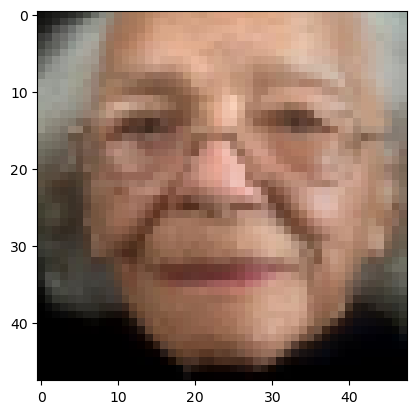

In [9]:
plt.imshow(images[5])

In [10]:
print(ages[5])

100


In [11]:
print(genders[5])

1


In [12]:
##creating the array of images , age and gender
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [13]:
images_f

array([[[[210, 201, 196],
         [192, 183, 176],
         [146, 137, 127],
         ...,
         [ 99, 100, 103],
         [ 91,  96,  97],
         [ 91,  95, 103]],

        [[211, 202, 197],
         [156, 147, 140],
         [142, 134, 123],
         ...,
         [107, 109, 108],
         [ 99, 100, 103],
         [ 95,  95, 105]],

        [[202, 193, 188],
         [171, 162, 155],
         [160, 152, 141],
         ...,
         [141, 143, 140],
         [113, 113, 116],
         [102, 101, 111]],

        ...,

        [[247, 246, 252],
         [241, 240, 246],
         [239, 238, 244],
         ...,
         [102, 101, 107],
         [100,  99, 105],
         [ 99,  98, 104]],

        [[239, 238, 244],
         [235, 234, 240],
         [231, 230, 236],
         ...,
         [ 98,  97, 103],
         [ 97,  96, 102],
         [ 95,  94, 100]],

        [[236, 235, 241],
         [231, 230, 236],
         [230, 229, 235],
         ...,
         [ 99,  98, 104],
        

In [14]:
ages_f

array([100, 100, 100, ...,   9,   9,   9])

In [15]:
genders_f

array([0, 0, 1, ..., 1, 1, 1])

In [16]:
#now saving the array
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [17]:
values , counts = np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# Plotting the no. of Male and Female Samples

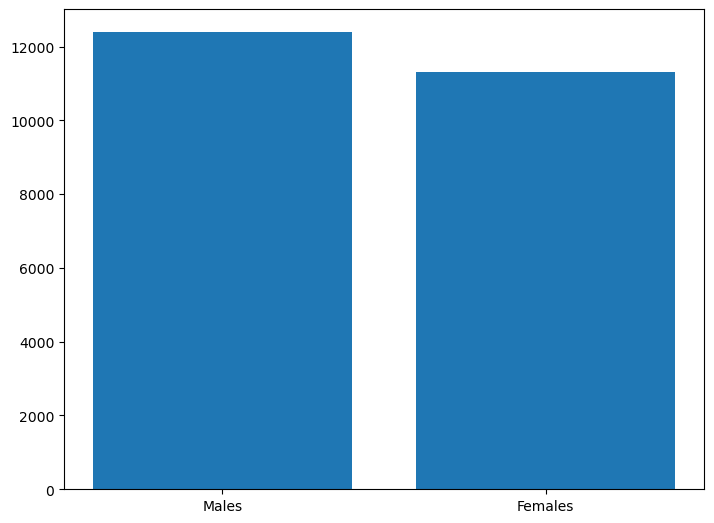

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Males','Females']
values = [12391 ,11317]
ax.bar(gender,values)
plt.show()

In [19]:
values , counts = np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [20]:
#plotting the ages
#converting to list
val = values.tolist()
cnt = counts.tolist()

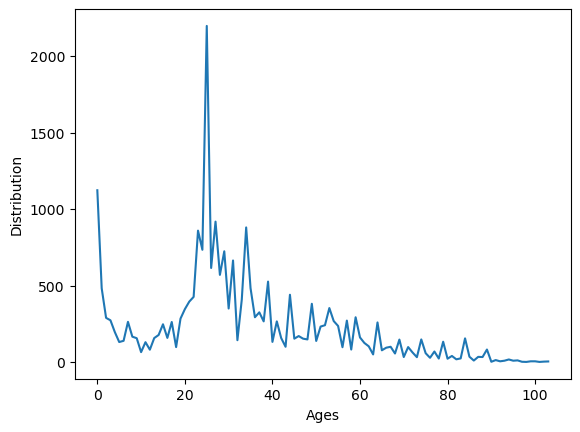

In [21]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [22]:
len(genders)

23708

# Defining Labels for Outputs

In [23]:
labels = []
i =0 
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

In [24]:
#creating another list of images from exsting one

In [25]:
images_f_2 = images_f/255

In [26]:
images_f_2.shape

(23708, 48, 48, 3)

In [27]:
labels_f = np.array(labels)

In [28]:
#spliting the dataset into test and train

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [31]:
# Splitting y_test and y_train for better ubderstanding
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [32]:
y_train_2[0][0:5]

array([0, 1, 0, 0, 1])

In [33]:
y_train_2[1][0:5]

array([25, 21, 34, 30, 39])

# Define Model

In [34]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters = filters,kernel_size=(3,3),padding="same",strides=(1,1,),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [35]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPool2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2 = Dense(1,activation='relu',name='age_out')(drop_2)
    model = Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer="adam",metrics=["accuracy"])
    return model

In [36]:
Model=model((48,48,3))

In [61]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 48, 48, 32)           896       ['input_6[0][0]']             
                                                                                                  
 dropout_10 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_10[0][0]']           
                                                                                                  
 activation_8 (Activation)   (None, 48, 48, 32)           0         ['dropout_10[0][0]']          
                                                                                            

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [50]:
fle_s ="Age_Sex_Detection1.h5"
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose =1, save_best_only=True ,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience = 75 , monitor = 'val_loss' ,restore_best_weights = 'True')
callable_list = [checkpoint,Early_stop]

In [51]:
History = Model.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),epochs=76,callbacks=callable_list)

Epoch 1/76
278/278 [==============================] - ETA: 0s - loss: 5.6407 - sex_out_loss: 0.1852 - age_out_loss: 4.4560 - sex_out_accuracy: 0.9183 - age_out_accuracy: 0.0463
Epoch 1: val_loss improved from inf to 8.48771, saving model to Age_Sex_Detection1.h5
278/278 [==============================] - 84s 304ms/step - loss: 5.6407 - sex_out_loss: 0.1852 - age_out_loss: 4.4560 - sex_out_accuracy: 0.9183 - age_out_accuracy: 0.0463 - val_loss: 8.4877 - val_sex_out_loss: 0.2686 - val_age_out_loss: 7.2174 - val_sex_out_accuracy: 0.8912 - val_age_out_accuracy: 0.0456


C:\Users\91952\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/76
278/278 [==============================] - ETA: 0s - loss: 5.6853 - sex_out_loss: 0.1848 - age_out_loss: 4.4976 - sex_out_accuracy: 0.9186 - age_out_accuracy: 0.0465
Epoch 2: val_loss improved from 8.48771 to 8.06520, saving model to Age_Sex_Detection1.h5
278/278 [==============================] - 82s 294ms/step - loss: 5.6853 - sex_out_loss: 0.1848 - age_out_loss: 4.4976 - sex_out_accuracy: 0.9186 - age_out_accuracy: 0.0465 - val_loss: 8.0652 - val_sex_out_loss: 0.2542 - val_age_out_loss: 6.8076 - val_sex_out_accuracy: 0.8913 - val_age_out_accuracy: 0.0456
Epoch 3/76
278/278 [==============================] - ETA: 0s - loss: 5.6693 - sex_out_loss: 0.1877 - age_out_loss: 4.4759 - sex_out_accuracy: 0.9152 - age_out_accuracy: 0.0463
Epoch 3: val_loss did not improve from 8.06520
278/278 [==============================] - 83s 299ms/step - loss: 5.6693 - sex_out_loss: 0.1877 - age_out_loss: 4.4759 - sex_out_accuracy: 0.9152 - age_out_accuracy: 0.0463 - val_loss: 8.1824 - val_sex

278/278 [==============================] - ETA: 0s - loss: 5.4725 - sex_out_loss: 0.1760 - age_out_loss: 4.2387 - sex_out_accuracy: 0.9223 - age_out_accuracy: 0.0450
Epoch 32: val_loss did not improve from 7.61007
278/278 [==============================] - 85s 306ms/step - loss: 5.4725 - sex_out_loss: 0.1760 - age_out_loss: 4.2387 - sex_out_accuracy: 0.9223 - age_out_accuracy: 0.0450 - val_loss: 7.8165 - val_sex_out_loss: 0.2685 - val_age_out_loss: 6.4892 - val_sex_out_accuracy: 0.8912 - val_age_out_accuracy: 0.0456
Epoch 33/76
278/278 [==============================] - ETA: 0s - loss: 5.5258 - sex_out_loss: 0.1682 - age_out_loss: 4.2977 - sex_out_accuracy: 0.9250 - age_out_accuracy: 0.0448
Epoch 33: val_loss did not improve from 7.61007
278/278 [==============================] - 84s 303ms/step - loss: 5.5258 - sex_out_loss: 0.1682 - age_out_loss: 4.2977 - sex_out_accuracy: 0.9250 - age_out_accuracy: 0.0448 - val_loss: 8.1468 - val_sex_out_loss: 0.2614 - val_age_out_loss: 6.8252 - val_

278/278 [==============================] - 84s 303ms/step - loss: 5.4479 - sex_out_loss: 0.1665 - age_out_loss: 4.2051 - sex_out_accuracy: 0.9273 - age_out_accuracy: 0.0425 - val_loss: 7.7448 - val_sex_out_loss: 0.3110 - val_age_out_loss: 6.3565 - val_sex_out_accuracy: 0.8731 - val_age_out_accuracy: 0.0456
Epoch 48/76
278/278 [==============================] - ETA: 0s - loss: 5.4903 - sex_out_loss: 0.1653 - age_out_loss: 4.2477 - sex_out_accuracy: 0.9268 - age_out_accuracy: 0.0438
Epoch 48: val_loss did not improve from 7.61007
278/278 [==============================] - 96s 345ms/step - loss: 5.4903 - sex_out_loss: 0.1653 - age_out_loss: 4.2477 - sex_out_accuracy: 0.9268 - age_out_accuracy: 0.0438 - val_loss: 8.0263 - val_sex_out_loss: 0.2592 - val_age_out_loss: 6.6901 - val_sex_out_accuracy: 0.8942 - val_age_out_accuracy: 0.0456
Epoch 49/76
278/278 [==============================] - ETA: 0s - loss: 5.3956 - sex_out_loss: 0.1606 - age_out_loss: 4.1580 - sex_out_accuracy: 0.9294 - age_o

Epoch 63/76
278/278 [==============================] - ETA: 0s - loss: 5.4246 - sex_out_loss: 0.1627 - age_out_loss: 4.1684 - sex_out_accuracy: 0.9313 - age_out_accuracy: 0.0429
Epoch 63: val_loss did not improve from 7.61007
278/278 [==============================] - 109s 393ms/step - loss: 5.4246 - sex_out_loss: 0.1627 - age_out_loss: 4.1684 - sex_out_accuracy: 0.9313 - age_out_accuracy: 0.0429 - val_loss: 8.1016 - val_sex_out_loss: 0.2724 - val_age_out_loss: 6.7348 - val_sex_out_accuracy: 0.8974 - val_age_out_accuracy: 0.0456
Epoch 64/76
278/278 [==============================] - ETA: 0s - loss: 5.4694 - sex_out_loss: 0.1605 - age_out_loss: 4.2143 - sex_out_accuracy: 0.9299 - age_out_accuracy: 0.0426
Epoch 64: val_loss did not improve from 7.61007
278/278 [==============================] - 130s 466ms/step - loss: 5.4694 - sex_out_loss: 0.1605 - age_out_loss: 4.2143 - sex_out_accuracy: 0.9299 - age_out_accuracy: 0.0426 - val_loss: 7.8080 - val_sex_out_loss: 0.2719 - val_age_out_loss:

In [ ]:
##model evaluation

In [52]:
Model.evaluate(X_test,y_test_2)

186/186 [==============================] - 5s 28ms/step - loss: 7.7477 - sex_out_loss: 0.2697 - age_out_loss: 6.3798 - sex_out_accuracy: 0.8988 - age_out_accuracy: 0.0456


[7.747743606567383,
 0.2697349786758423,
 6.379840850830078,
 0.8987683653831482,
 0.04555424302816391]

In [53]:
pred = Model.predict(X_test)

186/186 [==============================] - 5s 27ms/step


In [54]:
pred[1]

array([[77.41122 ],
       [24.919275],
       [ 5.891043],
       ...,
       [33.968487],
       [28.673946],
       [18.550976]], dtype=float32)

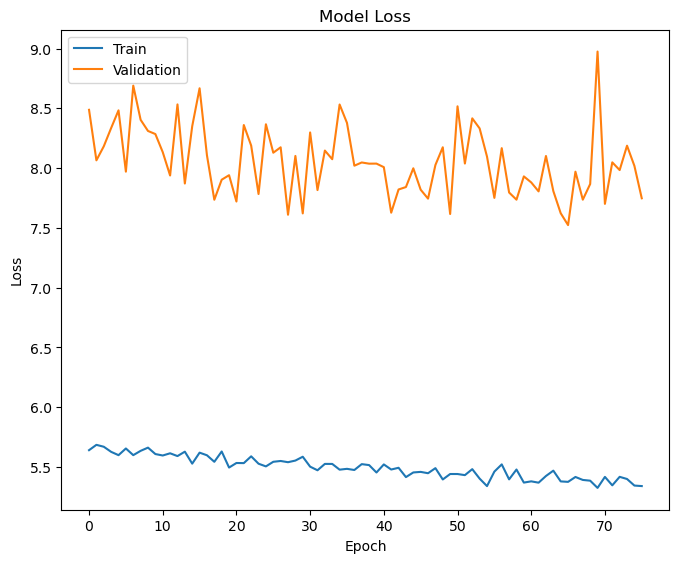

In [55]:
#plotting the Train and validation
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
            

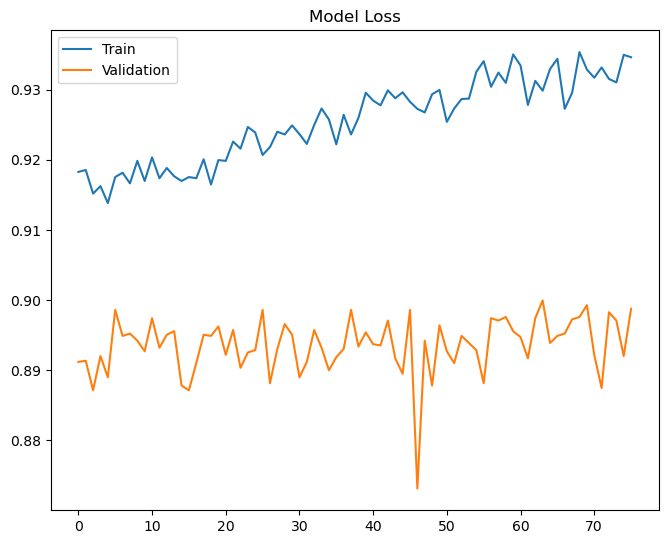

In [57]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

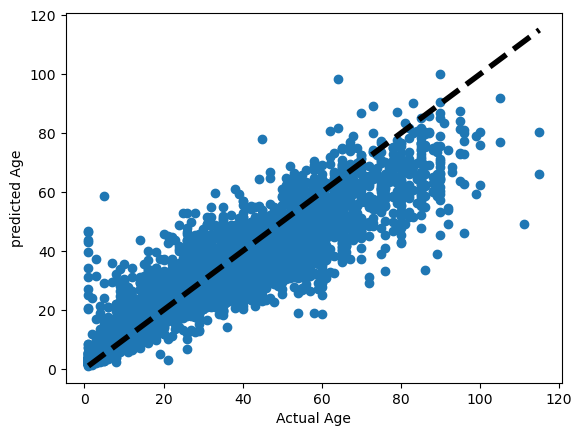

In [60]:
fig,ax = plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('predicted Age')
plt.show()

In [61]:
#making report of the model

In [62]:
i = 0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i = i+1

In [63]:
#import metrics
from sklearn.metrics import confusion_matrix , classification_report

In [64]:
report = classification_report(y_test_2[0],Pred_l)

In [66]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3144
           1       0.90      0.89      0.89      2783

    accuracy                           0.90      5927
   macro avg       0.90      0.90      0.90      5927
weighted avg       0.90      0.90      0.90      5927



In [69]:
result = confusion_matrix(y_test_2[0],Pred_l)
print(result)

[[2863  281]
 [ 319 2464]]


In [68]:
import seaborn as sns

<Axes: >

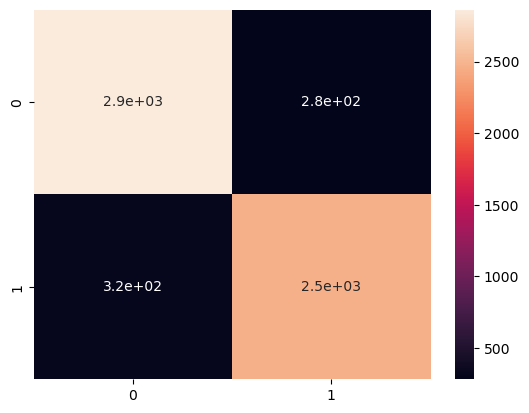

In [80]:
#heatmap of the model
sns.heatmap(result,annot=True)

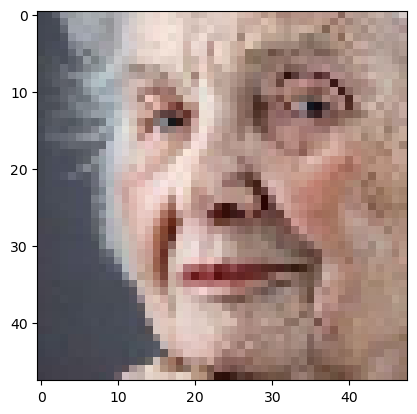

1/1 [==============================] - 0s 45ms/step
Predicted Age is 80
Predicted Gender is Female


In [74]:
#testing the image
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    plt.show()
    
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ["Male", "Female"]
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])


test_image(4, images_f, images_f_2, Model)

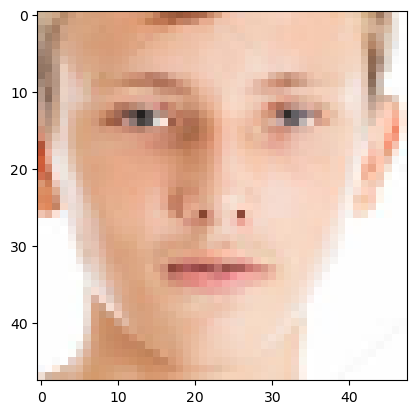

1/1 [==============================] - 0s 22ms/step
Predicted Age is 13
Predicted Gender is Male


In [76]:
test_image(25, images_f, images_f_2, Model)

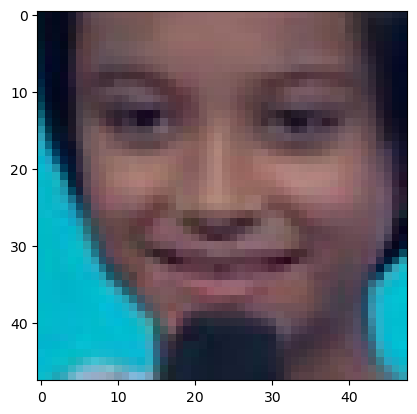

1/1 [==============================] - 0s 19ms/step
Predicted Age is 11
Predicted Gender is Female


In [77]:
test_image(168, images_f, images_f_2, Model)

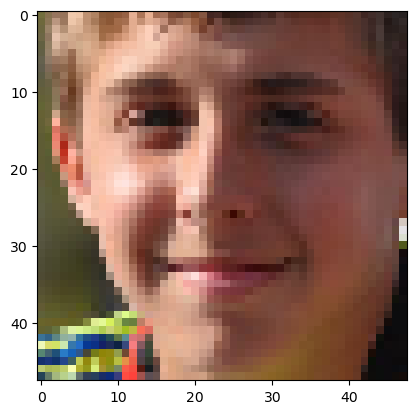

1/1 [==============================] - 0s 24ms/step
Predicted Age is 18
Predicted Gender is Male


In [78]:
test_image(888, images_f, images_f_2, Model)

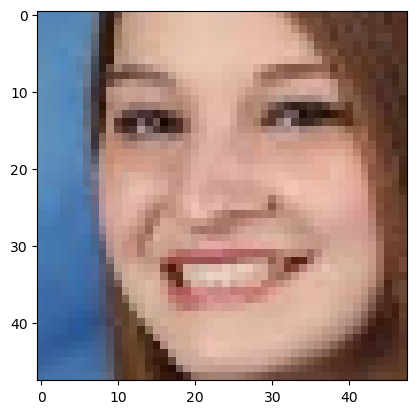

1/1 [==============================] - 0s 25ms/step
Predicted Age is 19
Predicted Gender is Female


In [79]:
test_image(1288, images_f, images_f_2, Model)